In [1]:
import pandas as pd
import ast
import collections

In [2]:
# data = pd.read_csv("states.csv")
data = pd.read_csv("generated_states.csv")

In [3]:
df = [sum(ast.literal_eval(i)) for i in data['state']]

In [9]:
sorted(list(set(df)))[-10:]

[2070, 2072, 2074, 2076, 2078, 2080, 2082, 2084, 2086, 2088]

In [70]:
#Number of possible moves if we increase by 2 everytime
len(set(df))

1044

In [71]:
#Number of absorbing states
df1 = [2048 in ast.literal_eval(i) for i in data['state']]
sum(df1)

26

In [72]:
states = list(set(data['state']))
stateSum = [sum(ast.literal_eval(i)) for i in states]
df2 = pd.DataFrame({'states':states,'sum':stateSum})

In [73]:
df2 = df2.sort_values(by=['sum']).reset_index(drop=True)

In [74]:
#List of all 3486 states with index
df2.head()

,states,sum
0,[0],0
1,"[2, 2]",4
2,"[2, 4]",6
3,"[2, 2, 4]",8
4,"[4, 4]",8


In [75]:
absorbingStates = pd.DataFrame([data for data in df2.values if 2048 in ast.literal_eval(data[0])])
absorbingStates.columns = ['states','sum']

In [76]:
#All 26 Absorbing States
absorbingStates.head()

,states,sum
0,"[2, 4, 4, 8, 2048]",2066
1,"[2, 2, 8, 8, 2048]",2068
2,"[4, 4, 4, 8, 2048]",2068
3,"[2, 2, 16, 2048]",2068
4,"[2, 4, 8, 8, 2048]",2070


In [77]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def initialiseArray():
    return np.random.choice(["[2,2]", "[2,4]","[4,4]"],1,p=[0.81, 0.18, 0.01])

In [79]:
def addTile():
    return np.random.choice([2, 4],1,p=[0.9, 0.1])[0]

In [80]:
def mergeTile(arr):
    if len(arr) == len(set(arr)):
        return arr
    else:
        result = []
        uniqueEle = list(set(arr))
        for ele in uniqueEle:
            if arr.count(ele) == 2:
                result.append(ele*2)
            elif arr.count(ele) == 3:
                result.append(ele*2)
                result.append(ele)
            else:
                result.append(ele)
        result.sort()
        return result

In [81]:
# stateArr = [[]]
# def helperGen(state):
#     sortedState = sorted(state)
#     if 2048 in sortedState:
#         if (sortedState not in stateArr):
#             stateArr.append(sortedState)
#             print("Added", sortedState)
#         return None
#     else:
        
#         if (sortedState not in stateArr):
#             stateArr.append(sortedState)
#             print("Added", sortedState)
#         newSortedState = sorted(mergeTile(sortedState))
#         helperGen(newSortedState+[4])
#         helperGen(newSortedState+[2])
    

In [82]:
# def generateStates():
#     helperGen([2,2])
# generateStates()

In [83]:
# stateArr

In [84]:
def simulateGame():
    bag = ast.literal_eval(initialiseArray()[0])
    steps = 0
#     print(bag)
    while(2048 not in bag):
        bag = mergeTile(bag)
        bag.append(addTile())
        steps += 1
    return steps, bag
        

In [85]:
#Simulate 1 Game
stepsNeeded, finalState = simulateGame()

In [86]:
def simulateXtimes(numSimulation):
    stepsArr = []
    finalStateArr = []
    for i in range(numSimulation):
        step, endState = simulateGame()
        stepsArr.append(step)
        finalStateArr.append(endState)
    return stepsArr, finalStateArr

In [87]:
#Simulate 10000 Games
simuStepsArr, simuStateArr = simulateXtimes(10000)

In [88]:
#Get average moves of 1000 Games
pd.DataFrame({'Moves':simuStepsArr}).describe()

,Moves
count,10000.000000
mean,938.799100
std,8.275058
min,903.000000
25%,933.000000
50%,939.000000
75%,944.000000
max,969.000000


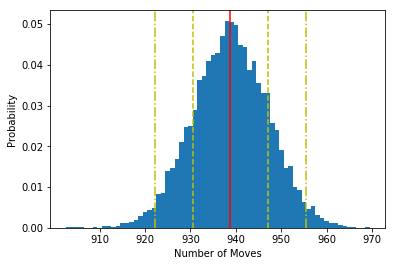

In [89]:
roundStepsArr = [round(step) for step in simuStepsArr]
roundStepsCounter = collections.Counter(roundStepsArr)
labels, values = zip(*roundStepsCounter.items())
indexes = np.array(sorted(labels))
values = [roundStepsCounter.get(key)/10000 for key in indexes]
width = 1
plt.bar(indexes, values, width)
plt.xticks([910,920,930,940,950,960,970], [910,920,930,940,950,960,970])
plt.axvline(x=938.763, color='r')
plt.axvline(x=938.763-8.3, color='y', linestyle='--')
plt.axvline(x=938.763+8.3, color='y', linestyle='--')
plt.axvline(x=938.763-8.3*2, color='y', linestyle='-.')
plt.axvline(x=938.763+8.3*2, color='y', linestyle='-.')
plt.ylabel('Probability')
plt.xlabel('Number of Moves')
plt.show()

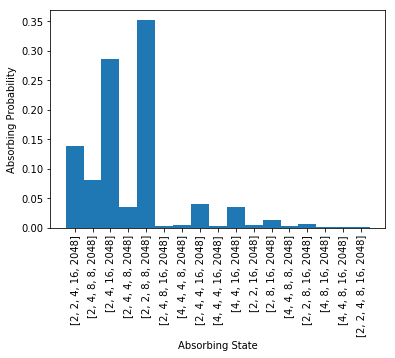

In [92]:
#Get Absorbing Probabilities of Absorbing States
simuStateArr_ = [str(sorted(arr)) for arr in simuStateArr]
simuStateArrCounter = collections.Counter(simuStateArr_)
labels = list(simuStateArrCounter.keys())
values = [simuStateArrCounter.get(key)/10000 for key in labels]
width = 1
plt.bar(labels, values, width)
plt.xticks(labels, rotation=90)
# plt.xticks([910,920,930,940,950,960,970], [910,920,930,940,950,960,970])
plt.ylabel('Absorbing Probability')
plt.xlabel('Absorbing State')
plt.show()

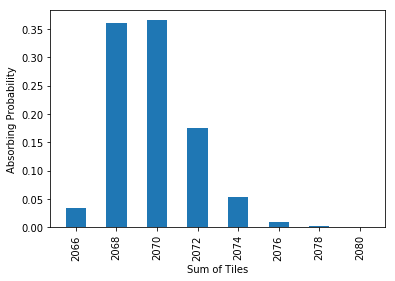

In [93]:
sumTileArr = [sum(row) for row in simuStateArr]
sumTileArrCounter = collections.Counter(sumTileArr)
labels = list(sumTileArrCounter.keys())
values = [sumTileArrCounter.get(key)/10000 for key in labels]
width = 1
plt.bar(labels, values, width)
plt.xticks(labels, rotation=90)
# plt.xticks([910,920,930,940,950,960,970], [910,920,930,940,950,960,970])
plt.ylabel('Absorbing Probability')
plt.xlabel('Sum of Tiles')
plt.show()

In [94]:
print(values,labels)

[0.1754, 0.3652, 0.0345, 0.3598, 0.0018, 0.0528, 0.0103, 0.0002] [2072, 2070, 2066, 2068, 2078, 2074, 2076, 2080]


In [95]:
index = range(3487)
columns = range(3487)
transMat = pd.DataFrame(index=index, columns=columns)
transMat = transMat.fillna(0)

In [96]:
#Initialise Transition Matrix
transMat.iloc[0,1] = 0.81
transMat.iloc[0,2] = 0.18
transMat.iloc[0,3] = 0.01

In [97]:
#Just removing empty state, index 0
remStates = df2.iloc[1:,:]
remStates

,states,sum
1,"[2, 2]",4
2,"[2, 4]",6
3,"[2, 2, 4]",8
4,"[4, 4]",8
5,"[2, 4, 4]",10
6,"[2, 8]",10
7,"[2, 2, 8]",12
8,"[4, 4, 4]",12
9,"[4, 8]",12
10,"[2, 4, 8]",14


In [98]:
def fillTransMat(transMat, remStates):
    toAdd = {2:0.9,4:0.1}
    for index, row in remStates.iterrows():
        state = ast.literal_eval(row['states'])
        if (2048 in state):
            transMat.iloc[index,index] = 1
            continue
        for newTile, prob in toAdd.items():
            print('Merging state ', index, 'with tiles', state)
            newState = mergeTile(state).copy()
            newState.append(newTile)
            newState.sort()
            idxArry = remStates.index[remStates['states'] == str(newState)]
            if(len(idxArry) != 0):
                newStateIndex = remStates.index[remStates['states'] == str(newState)][0]
                print('Transition between i:',index,'and j:',newStateIndex,'whereby j has tiles:',newState)
                transMat.iloc[index,newStateIndex] = prob
    return transMat

In [99]:
#Filled up whole transition matrix
finalTransMat = fillTransMat(transMat, remStates)

Merging state  1 with tiles [2, 2]
Transition between i: 1 and j: 2 whereby j has tiles: [2, 4]
Merging state  1 with tiles [2, 2]
Transition between i: 1 and j: 4 whereby j has tiles: [4, 4]
Merging state  2 with tiles [2, 4]
Transition between i: 2 and j: 3 whereby j has tiles: [2, 2, 4]
Merging state  2 with tiles [2, 4]
Transition between i: 2 and j: 5 whereby j has tiles: [2, 4, 4]
Merging state  3 with tiles [2, 2, 4]
Transition between i: 3 and j: 5 whereby j has tiles: [2, 4, 4]
Merging state  3 with tiles [2, 2, 4]
Transition between i: 3 and j: 8 whereby j has tiles: [4, 4, 4]
Merging state  4 with tiles [4, 4]
Transition between i: 4 and j: 6 whereby j has tiles: [2, 8]
Merging state  4 with tiles [4, 4]
Transition between i: 4 and j: 9 whereby j has tiles: [4, 8]
Merging state  5 with tiles [2, 4, 4]
Transition between i: 5 and j: 7 whereby j has tiles: [2, 2, 8]
Merging state  5 with tiles [2, 4, 4]
Transition between i: 5 and j: 10 whereby j has tiles: [2, 4, 8]
Merging s

Merging state  41 with tiles [2, 2, 4, 16, 16]
Transition between i: 41 and j: 48 whereby j has tiles: [2, 4, 4, 32]
Merging state  41 with tiles [2, 2, 4, 16, 16]
Transition between i: 41 and j: 50 whereby j has tiles: [4, 4, 4, 32]
Merging state  42 with tiles [4, 4, 32]
Transition between i: 42 and j: 47 whereby j has tiles: [2, 8, 32]
Merging state  42 with tiles [4, 4, 32]
Transition between i: 42 and j: 51 whereby j has tiles: [4, 8, 32]
Merging state  43 with tiles [2, 2, 4, 32]
Transition between i: 43 and j: 48 whereby j has tiles: [2, 4, 4, 32]
Merging state  43 with tiles [2, 2, 4, 32]
Transition between i: 43 and j: 50 whereby j has tiles: [4, 4, 4, 32]
Merging state  44 with tiles [4, 4, 8, 8, 16]
Transition between i: 44 and j: 49 whereby j has tiles: [2, 8, 16, 16]
Merging state  44 with tiles [4, 4, 8, 8, 16]
Transition between i: 44 and j: 53 whereby j has tiles: [4, 8, 16, 16]
Merging state  45 with tiles [4, 4, 16, 16]
Transition between i: 45 and j: 47 whereby j has

Transition between i: 76 and j: 80 whereby j has tiles: [2, 2, 8, 8, 16, 32]
Merging state  76 with tiles [2, 4, 4, 8, 16, 32]
Transition between i: 76 and j: 84 whereby j has tiles: [2, 4, 8, 8, 16, 32]
Merging state  77 with tiles [2, 8, 8, 16, 32]
Transition between i: 77 and j: 81 whereby j has tiles: [2, 2, 16, 16, 32]
Merging state  77 with tiles [2, 8, 8, 16, 32]
Transition between i: 77 and j: 83 whereby j has tiles: [2, 4, 16, 16, 32]
Merging state  78 with tiles [4, 8, 8, 16, 32]
Transition between i: 78 and j: 83 whereby j has tiles: [2, 4, 16, 16, 32]
Merging state  78 with tiles [4, 8, 8, 16, 32]
Transition between i: 78 and j: 88 whereby j has tiles: [4, 4, 16, 16, 32]
Merging state  79 with tiles [4, 4, 4, 8, 16, 32]
Transition between i: 79 and j: 84 whereby j has tiles: [2, 4, 8, 8, 16, 32]
Merging state  79 with tiles [4, 4, 4, 8, 16, 32]
Transition between i: 79 and j: 89 whereby j has tiles: [4, 4, 8, 8, 16, 32]
Merging state  80 with tiles [2, 2, 8, 8, 16, 32]
Tran

Merging state  113 with tiles [2, 2, 16, 64]
Transition between i: 113 and j: 116 whereby j has tiles: [2, 4, 16, 64]
Merging state  113 with tiles [2, 2, 16, 64]
Transition between i: 113 and j: 119 whereby j has tiles: [4, 4, 16, 64]
Merging state  114 with tiles [4, 8, 8, 64]
Transition between i: 114 and j: 116 whereby j has tiles: [2, 4, 16, 64]
Merging state  114 with tiles [4, 8, 8, 64]
Transition between i: 114 and j: 119 whereby j has tiles: [4, 4, 16, 64]
Merging state  115 with tiles [2, 4, 8, 8, 64]
Transition between i: 115 and j: 117 whereby j has tiles: [2, 2, 4, 16, 64]
Merging state  115 with tiles [2, 4, 8, 8, 64]
Transition between i: 115 and j: 120 whereby j has tiles: [2, 4, 4, 16, 64]
Merging state  116 with tiles [2, 4, 16, 64]
Transition between i: 116 and j: 117 whereby j has tiles: [2, 2, 4, 16, 64]
Merging state  116 with tiles [2, 4, 16, 64]
Transition between i: 116 and j: 120 whereby j has tiles: [2, 4, 4, 16, 64]
Merging state  117 with tiles [2, 2, 4, 16

Merging state  151 with tiles [4, 4, 8, 32, 64]
Transition between i: 151 and j: 156 whereby j has tiles: [4, 8, 8, 32, 64]
Merging state  152 with tiles [2, 2, 4, 8, 32, 64]
Transition between i: 152 and j: 154 whereby j has tiles: [2, 4, 4, 8, 32, 64]
Merging state  152 with tiles [2, 2, 4, 8, 32, 64]
Transition between i: 152 and j: 157 whereby j has tiles: [4, 4, 4, 8, 32, 64]
Merging state  153 with tiles [2, 8, 8, 32, 64]
Transition between i: 153 and j: 155 whereby j has tiles: [2, 2, 16, 32, 64]
Merging state  153 with tiles [2, 8, 8, 32, 64]
Transition between i: 153 and j: 159 whereby j has tiles: [2, 4, 16, 32, 64]
Merging state  154 with tiles [2, 4, 4, 8, 32, 64]
Transition between i: 154 and j: 158 whereby j has tiles: [2, 2, 8, 8, 32, 64]
Merging state  154 with tiles [2, 4, 4, 8, 32, 64]
Transition between i: 154 and j: 160 whereby j has tiles: [2, 4, 8, 8, 32, 64]
Merging state  155 with tiles [2, 2, 16, 32, 64]
Transition between i: 155 and j: 159 whereby j has tiles:

Merging state  183 with tiles [2, 2, 4, 32, 32, 64]
Transition between i: 183 and j: 189 whereby j has tiles: [2, 4, 4, 64, 64]
Merging state  183 with tiles [2, 2, 4, 32, 32, 64]
Transition between i: 183 and j: 195 whereby j has tiles: [4, 4, 4, 64, 64]
Merging state  184 with tiles [2, 2, 4, 64, 64]
Transition between i: 184 and j: 188 whereby j has tiles: [2, 4, 4, 128]
Merging state  184 with tiles [2, 2, 4, 64, 64]
Transition between i: 184 and j: 200 whereby j has tiles: [4, 4, 4, 128]
Merging state  185 with tiles [2, 2, 4, 16, 16, 32, 64]
Transition between i: 185 and j: 191 whereby j has tiles: [2, 4, 4, 32, 32, 64]
Merging state  185 with tiles [2, 2, 4, 16, 16, 32, 64]
Transition between i: 185 and j: 197 whereby j has tiles: [4, 4, 4, 32, 32, 64]
Merging state  186 with tiles [4, 4, 16, 16, 32, 64]
Transition between i: 186 and j: 187 whereby j has tiles: [2, 8, 32, 32, 64]
Merging state  186 with tiles [4, 4, 16, 16, 32, 64]
Transition between i: 186 and j: 196 whereby j 

Merging state  220 with tiles [2, 4, 16, 128]
Transition between i: 220 and j: 225 whereby j has tiles: [2, 4, 4, 16, 128]
Merging state  221 with tiles [2, 4, 8, 8, 128]
Transition between i: 221 and j: 223 whereby j has tiles: [2, 2, 4, 16, 128]
Merging state  221 with tiles [2, 4, 8, 8, 128]
Transition between i: 221 and j: 225 whereby j has tiles: [2, 4, 4, 16, 128]
Merging state  222 with tiles [4, 4, 8, 8, 128]
Transition between i: 222 and j: 226 whereby j has tiles: [2, 8, 16, 128]
Merging state  222 with tiles [4, 4, 8, 8, 128]
Transition between i: 222 and j: 229 whereby j has tiles: [4, 8, 16, 128]
Merging state  223 with tiles [2, 2, 4, 16, 128]
Transition between i: 223 and j: 225 whereby j has tiles: [2, 4, 4, 16, 128]
Merging state  223 with tiles [2, 2, 4, 16, 128]
Transition between i: 223 and j: 228 whereby j has tiles: [4, 4, 4, 16, 128]
Merging state  224 with tiles [4, 4, 16, 128]
Transition between i: 224 and j: 226 whereby j has tiles: [2, 8, 16, 128]
Merging sta

Merging state  257 with tiles [4, 4, 8, 32, 128]
Transition between i: 257 and j: 258 whereby j has tiles: [2, 8, 8, 32, 128]
Merging state  257 with tiles [4, 4, 8, 32, 128]
Transition between i: 257 and j: 263 whereby j has tiles: [4, 8, 8, 32, 128]
Merging state  258 with tiles [2, 8, 8, 32, 128]
Transition between i: 258 and j: 262 whereby j has tiles: [2, 2, 16, 32, 128]
Merging state  258 with tiles [2, 8, 8, 32, 128]
Transition between i: 258 and j: 264 whereby j has tiles: [2, 4, 16, 32, 128]
Merging state  259 with tiles [2, 4, 4, 8, 32, 128]
Transition between i: 259 and j: 260 whereby j has tiles: [2, 2, 8, 8, 32, 128]
Merging state  259 with tiles [2, 4, 4, 8, 32, 128]
Transition between i: 259 and j: 265 whereby j has tiles: [2, 4, 8, 8, 32, 128]
Merging state  260 with tiles [2, 2, 8, 8, 32, 128]
Transition between i: 260 and j: 264 whereby j has tiles: [2, 4, 16, 32, 128]
Merging state  260 with tiles [2, 2, 8, 8, 32, 128]
Transition between i: 260 and j: 267 whereby j h

Merging state  289 with tiles [4, 4, 32, 32, 128]
Transition between i: 289 and j: 301 whereby j has tiles: [4, 8, 64, 128]
Merging state  290 with tiles [4, 4, 8, 8, 16, 32, 128]
Transition between i: 290 and j: 297 whereby j has tiles: [2, 8, 16, 16, 32, 128]
Merging state  290 with tiles [4, 4, 8, 8, 16, 32, 128]
Transition between i: 290 and j: 299 whereby j has tiles: [4, 8, 16, 16, 32, 128]
Merging state  291 with tiles [2, 2, 4, 16, 16, 32, 128]
Transition between i: 291 and j: 293 whereby j has tiles: [2, 4, 4, 32, 32, 128]
Merging state  291 with tiles [2, 2, 4, 16, 16, 32, 128]
Transition between i: 291 and j: 304 whereby j has tiles: [4, 4, 4, 32, 32, 128]
Merging state  292 with tiles [2, 4, 4, 16, 16, 32, 128]
Transition between i: 292 and j: 300 whereby j has tiles: [2, 2, 8, 32, 32, 128]
Merging state  292 with tiles [2, 4, 4, 16, 16, 32, 128]
Transition between i: 292 and j: 305 whereby j has tiles: [2, 4, 8, 32, 32, 128]
Merging state  293 with tiles [2, 4, 4, 32, 32, 

Transition between i: 326 and j: 328 whereby j has tiles: [2, 2, 4, 8, 16, 64, 128]
Merging state  326 with tiles [2, 4, 8, 16, 64, 128]
Transition between i: 326 and j: 329 whereby j has tiles: [2, 4, 4, 8, 16, 64, 128]
Merging state  327 with tiles [4, 4, 8, 16, 64, 128]
Transition between i: 327 and j: 330 whereby j has tiles: [2, 8, 8, 16, 64, 128]
Merging state  327 with tiles [4, 4, 8, 16, 64, 128]
Transition between i: 327 and j: 331 whereby j has tiles: [4, 8, 8, 16, 64, 128]
Merging state  328 with tiles [2, 2, 4, 8, 16, 64, 128]
Transition between i: 328 and j: 329 whereby j has tiles: [2, 4, 4, 8, 16, 64, 128]
Merging state  328 with tiles [2, 2, 4, 8, 16, 64, 128]
Transition between i: 328 and j: 333 whereby j has tiles: [4, 4, 4, 8, 16, 64, 128]
Merging state  329 with tiles [2, 4, 4, 8, 16, 64, 128]
Transition between i: 329 and j: 332 whereby j has tiles: [2, 2, 8, 8, 16, 64, 128]
Merging state  329 with tiles [2, 4, 4, 8, 16, 64, 128]
Transition between i: 329 and j: 33

Merging state  357 with tiles [4, 4, 4, 8, 32, 64, 128]
Transition between i: 357 and j: 361 whereby j has tiles: [2, 4, 8, 8, 32, 64, 128]
Merging state  357 with tiles [4, 4, 4, 8, 32, 64, 128]
Transition between i: 357 and j: 362 whereby j has tiles: [4, 4, 8, 8, 32, 64, 128]
Merging state  358 with tiles [2, 2, 8, 8, 32, 64, 128]
Transition between i: 358 and j: 360 whereby j has tiles: [2, 4, 16, 32, 64, 128]
Merging state  358 with tiles [2, 2, 8, 8, 32, 64, 128]
Transition between i: 358 and j: 364 whereby j has tiles: [4, 4, 16, 32, 64, 128]
Merging state  359 with tiles [4, 8, 8, 32, 64, 128]
Transition between i: 359 and j: 360 whereby j has tiles: [2, 4, 16, 32, 64, 128]
Merging state  359 with tiles [4, 8, 8, 32, 64, 128]
Transition between i: 359 and j: 364 whereby j has tiles: [4, 4, 16, 32, 64, 128]
Merging state  360 with tiles [2, 4, 16, 32, 64, 128]
Transition between i: 360 and j: 363 whereby j has tiles: [2, 2, 4, 16, 32, 64, 128]
Merging state  360 with tiles [2, 4

Merging state  386 with tiles [4, 4, 8, 8, 16, 32, 64, 128]
Transition between i: 386 and j: 392 whereby j has tiles: [2, 8, 16, 16, 32, 64, 128]
Merging state  386 with tiles [4, 4, 8, 8, 16, 32, 64, 128]
Transition between i: 386 and j: 400 whereby j has tiles: [4, 8, 16, 16, 32, 64, 128]
Merging state  387 with tiles [4, 4, 32, 32, 64, 128]
Transition between i: 387 and j: 390 whereby j has tiles: [2, 8, 64, 64, 128]
Merging state  387 with tiles [4, 4, 32, 32, 64, 128]
Transition between i: 387 and j: 402 whereby j has tiles: [4, 8, 64, 64, 128]
Merging state  388 with tiles [2, 4, 4, 32, 32, 64, 128]
Transition between i: 388 and j: 395 whereby j has tiles: [2, 2, 8, 64, 64, 128]
Merging state  388 with tiles [2, 4, 4, 32, 32, 64, 128]
Transition between i: 388 and j: 408 whereby j has tiles: [2, 4, 8, 64, 64, 128]
Merging state  389 with tiles [2, 8, 32, 32, 64, 128]
Transition between i: 389 and j: 395 whereby j has tiles: [2, 2, 8, 64, 64, 128]
Merging state  389 with tiles [2,

Merging state  419 with tiles [2, 4, 4, 8, 64, 64, 128]
Transition between i: 419 and j: 434 whereby j has tiles: [2, 4, 8, 8, 128, 128]
Merging state  420 with tiles [2, 4, 4, 8, 256]
Transition between i: 420 and j: 425 whereby j has tiles: [2, 2, 8, 8, 256]
Merging state  420 with tiles [2, 4, 4, 8, 256]
Transition between i: 420 and j: 433 whereby j has tiles: [2, 4, 8, 8, 256]
Merging state  421 with tiles [2, 4, 4, 8, 128, 128]
Transition between i: 421 and j: 425 whereby j has tiles: [2, 2, 8, 8, 256]
Merging state  421 with tiles [2, 4, 4, 8, 128, 128]
Transition between i: 421 and j: 433 whereby j has tiles: [2, 4, 8, 8, 256]
Merging state  422 with tiles [2, 2, 8, 8, 128, 128]
Transition between i: 422 and j: 431 whereby j has tiles: [2, 4, 16, 256]
Merging state  422 with tiles [2, 2, 8, 8, 128, 128]
Transition between i: 422 and j: 438 whereby j has tiles: [4, 4, 16, 256]
Merging state  423 with tiles [4, 8, 8, 256]
Transition between i: 423 and j: 431 whereby j has tiles: 

Merging state  453 with tiles [2, 4, 8, 8, 16, 256]
Transition between i: 453 and j: 462 whereby j has tiles: [2, 4, 4, 16, 16, 256]
Merging state  454 with tiles [2, 4, 16, 16, 256]
Transition between i: 454 and j: 459 whereby j has tiles: [2, 2, 4, 32, 256]
Merging state  454 with tiles [2, 4, 16, 16, 256]
Transition between i: 454 and j: 464 whereby j has tiles: [2, 4, 4, 32, 256]
Merging state  455 with tiles [2, 4, 32, 256]
Transition between i: 455 and j: 459 whereby j has tiles: [2, 2, 4, 32, 256]
Merging state  455 with tiles [2, 4, 32, 256]
Transition between i: 455 and j: 464 whereby j has tiles: [2, 4, 4, 32, 256]
Merging state  456 with tiles [2, 2, 4, 16, 16, 256]
Transition between i: 456 and j: 464 whereby j has tiles: [2, 4, 4, 32, 256]
Merging state  456 with tiles [2, 2, 4, 16, 16, 256]
Transition between i: 456 and j: 468 whereby j has tiles: [4, 4, 4, 32, 256]
Merging state  457 with tiles [4, 4, 16, 16, 256]
Transition between i: 457 and j: 463 whereby j has tiles:

Merging state  489 with tiles [2, 2, 4, 8, 16, 32, 256]
Transition between i: 489 and j: 496 whereby j has tiles: [4, 4, 4, 8, 16, 32, 256]
Merging state  490 with tiles [4, 4, 8, 16, 32, 256]
Transition between i: 490 and j: 491 whereby j has tiles: [2, 8, 8, 16, 32, 256]
Merging state  490 with tiles [4, 4, 8, 16, 32, 256]
Transition between i: 490 and j: 494 whereby j has tiles: [4, 8, 8, 16, 32, 256]
Merging state  491 with tiles [2, 8, 8, 16, 32, 256]
Transition between i: 491 and j: 493 whereby j has tiles: [2, 2, 16, 16, 32, 256]
Merging state  491 with tiles [2, 8, 8, 16, 32, 256]
Transition between i: 491 and j: 499 whereby j has tiles: [2, 4, 16, 16, 32, 256]
Merging state  492 with tiles [2, 4, 4, 8, 16, 32, 256]
Transition between i: 492 and j: 495 whereby j has tiles: [2, 2, 8, 8, 16, 32, 256]
Merging state  492 with tiles [2, 4, 4, 8, 16, 32, 256]
Transition between i: 492 and j: 498 whereby j has tiles: [2, 4, 8, 8, 16, 32, 256]
Merging state  493 with tiles [2, 2, 16, 1

Merging state  522 with tiles [4, 4, 8, 64, 256]
Transition between i: 522 and j: 528 whereby j has tiles: [4, 8, 8, 64, 256]
Merging state  523 with tiles [4, 4, 8, 32, 32, 256]
Transition between i: 523 and j: 524 whereby j has tiles: [2, 8, 8, 64, 256]
Merging state  523 with tiles [4, 4, 8, 32, 32, 256]
Transition between i: 523 and j: 528 whereby j has tiles: [4, 8, 8, 64, 256]
Merging state  524 with tiles [2, 8, 8, 64, 256]
Transition between i: 524 and j: 529 whereby j has tiles: [2, 2, 16, 64, 256]
Merging state  524 with tiles [2, 8, 8, 64, 256]
Transition between i: 524 and j: 530 whereby j has tiles: [2, 4, 16, 64, 256]
Merging state  525 with tiles [2, 4, 4, 8, 64, 256]
Transition between i: 525 and j: 527 whereby j has tiles: [2, 2, 8, 8, 64, 256]
Merging state  525 with tiles [2, 4, 4, 8, 64, 256]
Transition between i: 525 and j: 531 whereby j has tiles: [2, 4, 8, 8, 64, 256]
Merging state  526 with tiles [4, 4, 4, 8, 64, 256]
Transition between i: 526 and j: 531 whereby

Transition between i: 555 and j: 562 whereby j has tiles: [4, 4, 4, 32, 64, 256]
Merging state  556 with tiles [2, 2, 4, 32, 64, 256]
Transition between i: 556 and j: 558 whereby j has tiles: [2, 4, 4, 32, 64, 256]
Merging state  556 with tiles [2, 2, 4, 32, 64, 256]
Transition between i: 556 and j: 562 whereby j has tiles: [4, 4, 4, 32, 64, 256]
Merging state  557 with tiles [2, 8, 32, 64, 256]
Transition between i: 557 and j: 563 whereby j has tiles: [2, 2, 8, 32, 64, 256]
Merging state  557 with tiles [2, 8, 32, 64, 256]
Transition between i: 557 and j: 565 whereby j has tiles: [2, 4, 8, 32, 64, 256]
Merging state  558 with tiles [2, 4, 4, 32, 64, 256]
Transition between i: 558 and j: 563 whereby j has tiles: [2, 2, 8, 32, 64, 256]
Merging state  558 with tiles [2, 4, 4, 32, 64, 256]
Transition between i: 558 and j: 565 whereby j has tiles: [2, 4, 8, 32, 64, 256]
Merging state  559 with tiles [2, 8, 16, 16, 64, 256]
Transition between i: 559 and j: 563 whereby j has tiles: [2, 2, 8,

Merging state  586 with tiles [4, 4, 8, 16, 32, 64, 256]
Transition between i: 586 and j: 591 whereby j has tiles: [4, 8, 8, 16, 32, 64, 256]
Merging state  587 with tiles [2, 8, 8, 16, 32, 64, 256]
Transition between i: 587 and j: 590 whereby j has tiles: [2, 2, 16, 16, 32, 64, 256]
Merging state  587 with tiles [2, 8, 8, 16, 32, 64, 256]
Transition between i: 587 and j: 594 whereby j has tiles: [2, 4, 16, 16, 32, 64, 256]
Merging state  588 with tiles [2, 4, 4, 8, 16, 32, 64, 256]
Transition between i: 588 and j: 592 whereby j has tiles: [2, 2, 8, 8, 16, 32, 64, 256]
Merging state  588 with tiles [2, 4, 4, 8, 16, 32, 64, 256]
Transition between i: 588 and j: 593 whereby j has tiles: [2, 4, 8, 8, 16, 32, 64, 256]
Merging state  589 with tiles [4, 4, 4, 8, 16, 32, 64, 256]
Transition between i: 589 and j: 593 whereby j has tiles: [2, 4, 8, 8, 16, 32, 64, 256]
Merging state  589 with tiles [4, 4, 4, 8, 16, 32, 64, 256]
Transition between i: 589 and j: 601 whereby j has tiles: [4, 4, 8, 

Merging state  619 with tiles [2, 4, 8, 64, 64, 256]
Transition between i: 619 and j: 624 whereby j has tiles: [2, 2, 4, 8, 128, 256]
Merging state  619 with tiles [2, 4, 8, 64, 64, 256]
Transition between i: 619 and j: 628 whereby j has tiles: [2, 4, 4, 8, 128, 256]
Merging state  620 with tiles [2, 4, 8, 128, 256]
Transition between i: 620 and j: 624 whereby j has tiles: [2, 2, 4, 8, 128, 256]
Merging state  620 with tiles [2, 4, 8, 128, 256]
Transition between i: 620 and j: 628 whereby j has tiles: [2, 4, 4, 8, 128, 256]
Merging state  621 with tiles [4, 4, 8, 64, 64, 256]
Transition between i: 621 and j: 629 whereby j has tiles: [2, 8, 8, 128, 256]
Merging state  621 with tiles [4, 4, 8, 64, 64, 256]
Transition between i: 621 and j: 630 whereby j has tiles: [4, 8, 8, 128, 256]
Merging state  622 with tiles [2, 2, 4, 8, 64, 64, 256]
Transition between i: 622 and j: 628 whereby j has tiles: [2, 4, 4, 8, 128, 256]
Merging state  622 with tiles [2, 2, 4, 8, 64, 64, 256]
Transition betw

Merging state  651 with tiles [4, 4, 4, 8, 16, 128, 256]
Transition between i: 651 and j: 660 whereby j has tiles: [4, 4, 8, 8, 16, 128, 256]
Merging state  652 with tiles [2, 2, 8, 8, 16, 128, 256]
Transition between i: 652 and j: 654 whereby j has tiles: [2, 4, 16, 16, 128, 256]
Merging state  652 with tiles [2, 2, 8, 8, 16, 128, 256]
Transition between i: 652 and j: 661 whereby j has tiles: [4, 4, 16, 16, 128, 256]
Merging state  653 with tiles [4, 8, 8, 16, 128, 256]
Transition between i: 653 and j: 654 whereby j has tiles: [2, 4, 16, 16, 128, 256]
Merging state  653 with tiles [4, 8, 8, 16, 128, 256]
Transition between i: 653 and j: 661 whereby j has tiles: [4, 4, 16, 16, 128, 256]
Merging state  654 with tiles [2, 4, 16, 16, 128, 256]
Transition between i: 654 and j: 658 whereby j has tiles: [2, 2, 4, 32, 128, 256]
Merging state  654 with tiles [2, 4, 16, 16, 128, 256]
Transition between i: 654 and j: 664 whereby j has tiles: [2, 4, 4, 32, 128, 256]
Merging state  655 with tiles 

Merging state  682 with tiles [4, 4, 8, 8, 32, 128, 256]
Transition between i: 682 and j: 684 whereby j has tiles: [2, 8, 16, 32, 128, 256]
Merging state  682 with tiles [4, 4, 8, 8, 32, 128, 256]
Transition between i: 682 and j: 688 whereby j has tiles: [4, 8, 16, 32, 128, 256]
Merging state  683 with tiles [4, 4, 16, 32, 128, 256]
Transition between i: 683 and j: 684 whereby j has tiles: [2, 8, 16, 32, 128, 256]
Merging state  683 with tiles [4, 4, 16, 32, 128, 256]
Transition between i: 683 and j: 688 whereby j has tiles: [4, 8, 16, 32, 128, 256]
Merging state  684 with tiles [2, 8, 16, 32, 128, 256]
Transition between i: 684 and j: 686 whereby j has tiles: [2, 2, 8, 16, 32, 128, 256]
Merging state  684 with tiles [2, 8, 16, 32, 128, 256]
Transition between i: 684 and j: 689 whereby j has tiles: [2, 4, 8, 16, 32, 128, 256]
Merging state  685 with tiles [2, 4, 4, 16, 32, 128, 256]
Transition between i: 685 and j: 686 whereby j has tiles: [2, 2, 8, 16, 32, 128, 256]
Merging state  685

Transition between i: 717 and j: 720 whereby j has tiles: [2, 4, 8, 64, 128, 256]
Merging state  717 with tiles [4, 4, 4, 32, 32, 128, 256]
Transition between i: 717 and j: 724 whereby j has tiles: [4, 4, 8, 64, 128, 256]
Merging state  718 with tiles [2, 2, 8, 32, 32, 128, 256]
Transition between i: 718 and j: 720 whereby j has tiles: [2, 4, 8, 64, 128, 256]
Merging state  718 with tiles [2, 2, 8, 32, 32, 128, 256]
Transition between i: 718 and j: 724 whereby j has tiles: [4, 4, 8, 64, 128, 256]
Merging state  719 with tiles [4, 4, 4, 64, 128, 256]
Transition between i: 719 and j: 720 whereby j has tiles: [2, 4, 8, 64, 128, 256]
Merging state  719 with tiles [4, 4, 4, 64, 128, 256]
Transition between i: 719 and j: 724 whereby j has tiles: [4, 4, 8, 64, 128, 256]
Merging state  720 with tiles [2, 4, 8, 64, 128, 256]
Transition between i: 720 and j: 723 whereby j has tiles: [2, 2, 4, 8, 64, 128, 256]
Merging state  720 with tiles [2, 4, 8, 64, 128, 256]
Transition between i: 720 and j: 

Merging state  746 with tiles [2, 2, 8, 8, 16, 64, 128, 256]
Transition between i: 746 and j: 753 whereby j has tiles: [4, 4, 16, 16, 64, 128, 256]
Merging state  747 with tiles [4, 8, 8, 16, 64, 128, 256]
Transition between i: 747 and j: 751 whereby j has tiles: [2, 4, 16, 16, 64, 128, 256]
Merging state  747 with tiles [4, 8, 8, 16, 64, 128, 256]
Transition between i: 747 and j: 753 whereby j has tiles: [4, 4, 16, 16, 64, 128, 256]
Merging state  748 with tiles [4, 4, 4, 8, 16, 64, 128, 256]
Transition between i: 748 and j: 752 whereby j has tiles: [2, 4, 8, 8, 16, 64, 128, 256]
Merging state  748 with tiles [4, 4, 4, 8, 16, 64, 128, 256]
Transition between i: 748 and j: 757 whereby j has tiles: [4, 4, 8, 8, 16, 64, 128, 256]
Merging state  749 with tiles [2, 2, 16, 16, 64, 128, 256]
Transition between i: 749 and j: 750 whereby j has tiles: [2, 4, 32, 64, 128, 256]
Merging state  749 with tiles [2, 2, 16, 16, 64, 128, 256]
Transition between i: 749 and j: 756 whereby j has tiles: [4,

Merging state  776 with tiles [2, 4, 8, 8, 32, 64, 128, 256]
Transition between i: 776 and j: 780 whereby j has tiles: [2, 4, 4, 16, 32, 64, 128, 256]
Merging state  777 with tiles [4, 4, 8, 8, 32, 64, 128, 256]
Transition between i: 777 and j: 781 whereby j has tiles: [2, 8, 16, 32, 64, 128, 256]
Merging state  777 with tiles [4, 4, 8, 8, 32, 64, 128, 256]
Transition between i: 777 and j: 784 whereby j has tiles: [4, 8, 16, 32, 64, 128, 256]
Merging state  778 with tiles [4, 4, 16, 32, 64, 128, 256]
Transition between i: 778 and j: 781 whereby j has tiles: [2, 8, 16, 32, 64, 128, 256]
Merging state  778 with tiles [4, 4, 16, 32, 64, 128, 256]
Transition between i: 778 and j: 784 whereby j has tiles: [4, 8, 16, 32, 64, 128, 256]
Merging state  779 with tiles [2, 2, 4, 16, 32, 64, 128, 256]
Transition between i: 779 and j: 780 whereby j has tiles: [2, 4, 4, 16, 32, 64, 128, 256]
Merging state  779 with tiles [2, 2, 4, 16, 32, 64, 128, 256]
Transition between i: 779 and j: 782 whereby j 

Merging state  806 with tiles [2, 4, 4, 64, 64, 128, 256]
Transition between i: 806 and j: 820 whereby j has tiles: [2, 4, 8, 128, 128, 256]
Merging state  807 with tiles [2, 4, 4, 128, 128, 256]
Transition between i: 807 and j: 815 whereby j has tiles: [2, 2, 8, 256, 256]
Merging state  807 with tiles [2, 4, 4, 128, 128, 256]
Transition between i: 807 and j: 823 whereby j has tiles: [2, 4, 8, 256, 256]
Merging state  808 with tiles [2, 4, 4, 16, 16, 32, 64, 128, 256]
Transition between i: 808 and j: 819 whereby j has tiles: [2, 2, 8, 32, 32, 64, 128, 256]
Merging state  808 with tiles [2, 4, 4, 16, 16, 32, 64, 128, 256]
Transition between i: 808 and j: 821 whereby j has tiles: [2, 4, 8, 32, 32, 64, 128, 256]
Merging state  809 with tiles [2, 8, 16, 16, 32, 64, 128, 256]
Transition between i: 809 and j: 819 whereby j has tiles: [2, 2, 8, 32, 32, 64, 128, 256]
Merging state  809 with tiles [2, 8, 16, 16, 32, 64, 128, 256]
Transition between i: 809 and j: 821 whereby j has tiles: [2, 4, 

Merging state  837 with tiles [2, 4, 4, 8, 128, 128, 256]
Transition between i: 837 and j: 853 whereby j has tiles: [2, 2, 8, 8, 256, 256]
Merging state  837 with tiles [2, 4, 4, 8, 128, 128, 256]
Transition between i: 837 and j: 856 whereby j has tiles: [2, 4, 8, 8, 256, 256]
Merging state  838 with tiles [2, 8, 8, 256, 256]
Transition between i: 838 and j: 845 whereby j has tiles: [2, 2, 16, 512]
Merging state  838 with tiles [2, 8, 8, 256, 256]
Transition between i: 838 and j: 858 whereby j has tiles: [2, 4, 16, 512]
Merging state  839 with tiles [2, 4, 4, 8, 512]
Transition between i: 839 and j: 848 whereby j has tiles: [2, 2, 8, 8, 512]
Merging state  839 with tiles [2, 4, 4, 8, 512]
Transition between i: 839 and j: 859 whereby j has tiles: [2, 4, 8, 8, 512]
Merging state  840 with tiles [2, 8, 8, 64, 64, 128, 256]
Transition between i: 840 and j: 854 whereby j has tiles: [2, 2, 16, 128, 128, 256]
Merging state  840 with tiles [2, 8, 8, 64, 64, 128, 256]
Transition between i: 840 

Merging state  869 with tiles [2, 4, 4, 16, 256, 256]
Transition between i: 869 and j: 876 whereby j has tiles: [2, 4, 8, 16, 512]
Merging state  870 with tiles [2, 4, 4, 16, 512]
Transition between i: 870 and j: 875 whereby j has tiles: [2, 2, 8, 16, 512]
Merging state  870 with tiles [2, 4, 4, 16, 512]
Transition between i: 870 and j: 876 whereby j has tiles: [2, 4, 8, 16, 512]
Merging state  871 with tiles [2, 8, 16, 512]
Transition between i: 871 and j: 875 whereby j has tiles: [2, 2, 8, 16, 512]
Merging state  871 with tiles [2, 8, 16, 512]
Transition between i: 871 and j: 876 whereby j has tiles: [2, 4, 8, 16, 512]
Merging state  872 with tiles [4, 4, 4, 16, 512]
Transition between i: 872 and j: 876 whereby j has tiles: [2, 4, 8, 16, 512]
Merging state  872 with tiles [4, 4, 4, 16, 512]
Transition between i: 872 and j: 878 whereby j has tiles: [4, 4, 8, 16, 512]
Merging state  873 with tiles [4, 8, 16, 256, 256]
Transition between i: 873 and j: 876 whereby j has tiles: [2, 4, 8, 

Merging state  902 with tiles [4, 4, 8, 32, 512]
Transition between i: 902 and j: 904 whereby j has tiles: [2, 8, 8, 32, 512]
Merging state  902 with tiles [4, 4, 8, 32, 512]
Transition between i: 902 and j: 906 whereby j has tiles: [4, 8, 8, 32, 512]
Merging state  903 with tiles [2, 2, 4, 8, 32, 512]
Transition between i: 903 and j: 905 whereby j has tiles: [2, 4, 4, 8, 32, 512]
Merging state  903 with tiles [2, 2, 4, 8, 32, 512]
Transition between i: 903 and j: 909 whereby j has tiles: [4, 4, 4, 8, 32, 512]
Merging state  904 with tiles [2, 8, 8, 32, 512]
Transition between i: 904 and j: 907 whereby j has tiles: [2, 2, 16, 32, 512]
Merging state  904 with tiles [2, 8, 8, 32, 512]
Transition between i: 904 and j: 911 whereby j has tiles: [2, 4, 16, 32, 512]
Merging state  905 with tiles [2, 4, 4, 8, 32, 512]
Transition between i: 905 and j: 908 whereby j has tiles: [2, 2, 8, 8, 32, 512]
Merging state  905 with tiles [2, 4, 4, 8, 32, 512]
Transition between i: 905 and j: 910 whereby j

Merging state  933 with tiles [4, 4, 16, 16, 32, 512]
Transition between i: 933 and j: 944 whereby j has tiles: [4, 8, 32, 32, 512]
Merging state  934 with tiles [4, 4, 8, 8, 16, 32, 512]
Transition between i: 934 and j: 940 whereby j has tiles: [2, 8, 16, 16, 32, 512]
Merging state  934 with tiles [4, 4, 8, 8, 16, 32, 512]
Transition between i: 934 and j: 950 whereby j has tiles: [4, 8, 16, 16, 32, 512]
Merging state  935 with tiles [2, 2, 4, 32, 32, 512]
Transition between i: 935 and j: 942 whereby j has tiles: [2, 4, 4, 64, 512]
Merging state  935 with tiles [2, 2, 4, 32, 32, 512]
Transition between i: 935 and j: 949 whereby j has tiles: [4, 4, 4, 64, 512]
Merging state  936 with tiles [2, 2, 4, 16, 16, 32, 512]
Transition between i: 936 and j: 938 whereby j has tiles: [2, 4, 4, 32, 32, 512]
Merging state  936 with tiles [2, 2, 4, 16, 16, 32, 512]
Transition between i: 936 and j: 947 whereby j has tiles: [4, 4, 4, 32, 32, 512]
Merging state  937 with tiles [4, 4, 32, 32, 512]
Transi

Merging state  968 with tiles [2, 8, 16, 64, 512]
Transition between i: 968 and j: 970 whereby j has tiles: [2, 2, 8, 16, 64, 512]
Merging state  968 with tiles [2, 8, 16, 64, 512]
Transition between i: 968 and j: 972 whereby j has tiles: [2, 4, 8, 16, 64, 512]
Merging state  969 with tiles [4, 4, 4, 16, 64, 512]
Transition between i: 969 and j: 972 whereby j has tiles: [2, 4, 8, 16, 64, 512]
Merging state  969 with tiles [4, 4, 4, 16, 64, 512]
Transition between i: 969 and j: 974 whereby j has tiles: [4, 4, 8, 16, 64, 512]
Merging state  970 with tiles [2, 2, 8, 16, 64, 512]
Transition between i: 970 and j: 972 whereby j has tiles: [2, 4, 8, 16, 64, 512]
Merging state  970 with tiles [2, 2, 8, 16, 64, 512]
Transition between i: 970 and j: 974 whereby j has tiles: [4, 4, 8, 16, 64, 512]
Merging state  971 with tiles [4, 8, 16, 64, 512]
Transition between i: 971 and j: 972 whereby j has tiles: [2, 4, 8, 16, 64, 512]
Merging state  971 with tiles [4, 8, 16, 64, 512]
Transition between i:

Merging state  998 with tiles [2, 2, 4, 8, 32, 64, 512]
Transition between i: 998 and j: 1004 whereby j has tiles: [4, 4, 4, 8, 32, 64, 512]
Merging state  999 with tiles [4, 4, 8, 32, 64, 512]
Transition between i: 999 and j: 1001 whereby j has tiles: [2, 8, 8, 32, 64, 512]
Merging state  999 with tiles [4, 4, 8, 32, 64, 512]
Transition between i: 999 and j: 1003 whereby j has tiles: [4, 8, 8, 32, 64, 512]
Merging state  1000 with tiles [2, 4, 4, 8, 32, 64, 512]
Transition between i: 1000 and j: 1005 whereby j has tiles: [2, 2, 8, 8, 32, 64, 512]
Merging state  1000 with tiles [2, 4, 4, 8, 32, 64, 512]
Transition between i: 1000 and j: 1007 whereby j has tiles: [2, 4, 8, 8, 32, 64, 512]
Merging state  1001 with tiles [2, 8, 8, 32, 64, 512]
Transition between i: 1001 and j: 1002 whereby j has tiles: [2, 2, 16, 32, 64, 512]
Merging state  1001 with tiles [2, 8, 8, 32, 64, 512]
Transition between i: 1001 and j: 1006 whereby j has tiles: [2, 4, 16, 32, 64, 512]
Merging state  1002 with ti

Merging state  1027 with tiles [2, 4, 8, 8, 16, 32, 64, 512]
Transition between i: 1027 and j: 1038 whereby j has tiles: [2, 4, 4, 16, 16, 32, 64, 512]
Merging state  1028 with tiles [4, 4, 16, 16, 32, 64, 512]
Transition between i: 1028 and j: 1040 whereby j has tiles: [2, 8, 32, 32, 64, 512]
Merging state  1028 with tiles [4, 4, 16, 16, 32, 64, 512]
Transition between i: 1028 and j: 1041 whereby j has tiles: [4, 8, 32, 32, 64, 512]
Merging state  1029 with tiles [4, 4, 8, 8, 16, 32, 64, 512]
Transition between i: 1029 and j: 1039 whereby j has tiles: [2, 8, 16, 16, 32, 64, 512]
Merging state  1029 with tiles [4, 4, 8, 8, 16, 32, 64, 512]
Transition between i: 1029 and j: 1045 whereby j has tiles: [4, 8, 16, 16, 32, 64, 512]
Merging state  1030 with tiles [2, 2, 4, 32, 32, 64, 512]
Transition between i: 1030 and j: 1034 whereby j has tiles: [2, 4, 4, 64, 64, 512]
Merging state  1030 with tiles [2, 2, 4, 32, 32, 64, 512]
Transition between i: 1030 and j: 1048 whereby j has tiles: [4, 4

Merging state  1058 with tiles [2, 4, 4, 8, 64, 64, 512]
Transition between i: 1058 and j: 1068 whereby j has tiles: [2, 4, 8, 8, 128, 512]
Merging state  1059 with tiles [2, 4, 4, 8, 128, 512]
Transition between i: 1059 and j: 1066 whereby j has tiles: [2, 2, 8, 8, 128, 512]
Merging state  1059 with tiles [2, 4, 4, 8, 128, 512]
Transition between i: 1059 and j: 1068 whereby j has tiles: [2, 4, 8, 8, 128, 512]
Merging state  1060 with tiles [2, 8, 8, 64, 64, 512]
Transition between i: 1060 and j: 1065 whereby j has tiles: [2, 2, 16, 128, 512]
Merging state  1060 with tiles [2, 8, 8, 64, 64, 512]
Transition between i: 1060 and j: 1067 whereby j has tiles: [2, 4, 16, 128, 512]
Merging state  1061 with tiles [2, 8, 8, 128, 512]
Transition between i: 1061 and j: 1065 whereby j has tiles: [2, 2, 16, 128, 512]
Merging state  1061 with tiles [2, 8, 8, 128, 512]
Transition between i: 1061 and j: 1067 whereby j has tiles: [2, 4, 16, 128, 512]
Merging state  1062 with tiles [4, 8, 8, 64, 64, 512

Merging state  1089 with tiles [2, 2, 4, 16, 16, 128, 512]
Transition between i: 1089 and j: 1098 whereby j has tiles: [4, 4, 4, 32, 128, 512]
Merging state  1090 with tiles [4, 4, 32, 128, 512]
Transition between i: 1090 and j: 1094 whereby j has tiles: [2, 8, 32, 128, 512]
Merging state  1090 with tiles [4, 4, 32, 128, 512]
Transition between i: 1090 and j: 1099 whereby j has tiles: [4, 8, 32, 128, 512]
Merging state  1091 with tiles [4, 4, 16, 16, 128, 512]
Transition between i: 1091 and j: 1094 whereby j has tiles: [2, 8, 32, 128, 512]
Merging state  1091 with tiles [4, 4, 16, 16, 128, 512]
Transition between i: 1091 and j: 1099 whereby j has tiles: [4, 8, 32, 128, 512]
Merging state  1092 with tiles [4, 4, 8, 8, 16, 128, 512]
Transition between i: 1092 and j: 1097 whereby j has tiles: [2, 8, 16, 16, 128, 512]
Merging state  1092 with tiles [4, 4, 8, 8, 16, 128, 512]
Transition between i: 1092 and j: 1100 whereby j has tiles: [4, 8, 16, 16, 128, 512]
Merging state  1093 with tiles 

Merging state  1121 with tiles [2, 4, 8, 16, 32, 128, 512]
Transition between i: 1121 and j: 1124 whereby j has tiles: [2, 4, 4, 8, 16, 32, 128, 512]
Merging state  1122 with tiles [4, 4, 8, 16, 32, 128, 512]
Transition between i: 1122 and j: 1125 whereby j has tiles: [2, 8, 8, 16, 32, 128, 512]
Merging state  1122 with tiles [4, 4, 8, 16, 32, 128, 512]
Transition between i: 1122 and j: 1126 whereby j has tiles: [4, 8, 8, 16, 32, 128, 512]
Merging state  1123 with tiles [2, 2, 4, 8, 16, 32, 128, 512]
Transition between i: 1123 and j: 1124 whereby j has tiles: [2, 4, 4, 8, 16, 32, 128, 512]
Merging state  1123 with tiles [2, 2, 4, 8, 16, 32, 128, 512]
Transition between i: 1123 and j: 1129 whereby j has tiles: [4, 4, 4, 8, 16, 32, 128, 512]
Merging state  1124 with tiles [2, 4, 4, 8, 16, 32, 128, 512]
Transition between i: 1124 and j: 1127 whereby j has tiles: [2, 2, 8, 8, 16, 32, 128, 512]
Merging state  1124 with tiles [2, 4, 4, 8, 16, 32, 128, 512]
Transition between i: 1124 and j: 1

Merging state  1152 with tiles [2, 4, 8, 64, 128, 512]
Transition between i: 1152 and j: 1154 whereby j has tiles: [2, 2, 4, 8, 64, 128, 512]
Merging state  1152 with tiles [2, 4, 8, 64, 128, 512]
Transition between i: 1152 and j: 1158 whereby j has tiles: [2, 4, 4, 8, 64, 128, 512]
Merging state  1153 with tiles [2, 4, 8, 32, 32, 128, 512]
Transition between i: 1153 and j: 1154 whereby j has tiles: [2, 2, 4, 8, 64, 128, 512]
Merging state  1153 with tiles [2, 4, 8, 32, 32, 128, 512]
Transition between i: 1153 and j: 1158 whereby j has tiles: [2, 4, 4, 8, 64, 128, 512]
Merging state  1154 with tiles [2, 2, 4, 8, 64, 128, 512]
Transition between i: 1154 and j: 1158 whereby j has tiles: [2, 4, 4, 8, 64, 128, 512]
Merging state  1154 with tiles [2, 2, 4, 8, 64, 128, 512]
Transition between i: 1154 and j: 1160 whereby j has tiles: [4, 4, 4, 8, 64, 128, 512]
Merging state  1155 with tiles [4, 4, 8, 64, 128, 512]
Transition between i: 1155 and j: 1157 whereby j has tiles: [2, 8, 8, 64, 128, 

Merging state  1180 with tiles [2, 2, 16, 16, 64, 128, 512]
Transition between i: 1180 and j: 1186 whereby j has tiles: [4, 4, 32, 64, 128, 512]
Merging state  1181 with tiles [2, 2, 8, 8, 16, 64, 128, 512]
Transition between i: 1181 and j: 1183 whereby j has tiles: [2, 4, 16, 16, 64, 128, 512]
Merging state  1181 with tiles [2, 2, 8, 8, 16, 64, 128, 512]
Transition between i: 1181 and j: 1185 whereby j has tiles: [4, 4, 16, 16, 64, 128, 512]
Merging state  1182 with tiles [2, 4, 8, 8, 16, 64, 128, 512]
Transition between i: 1182 and j: 1188 whereby j has tiles: [2, 2, 4, 16, 16, 64, 128, 512]
Merging state  1182 with tiles [2, 4, 8, 8, 16, 64, 128, 512]
Transition between i: 1182 and j: 1193 whereby j has tiles: [2, 4, 4, 16, 16, 64, 128, 512]
Merging state  1183 with tiles [2, 4, 16, 16, 64, 128, 512]
Transition between i: 1183 and j: 1189 whereby j has tiles: [2, 2, 4, 32, 64, 128, 512]
Merging state  1183 with tiles [2, 4, 16, 16, 64, 128, 512]
Transition between i: 1183 and j: 119

Merging state  1209 with tiles [4, 4, 16, 32, 64, 128, 512]
Transition between i: 1209 and j: 1215 whereby j has tiles: [4, 8, 16, 32, 64, 128, 512]
Merging state  1210 with tiles [4, 4, 8, 8, 32, 64, 128, 512]
Transition between i: 1210 and j: 1213 whereby j has tiles: [2, 8, 16, 32, 64, 128, 512]
Merging state  1210 with tiles [4, 4, 8, 8, 32, 64, 128, 512]
Transition between i: 1210 and j: 1215 whereby j has tiles: [4, 8, 16, 32, 64, 128, 512]
Merging state  1211 with tiles [2, 2, 4, 16, 32, 64, 128, 512]
Transition between i: 1211 and j: 1212 whereby j has tiles: [2, 4, 4, 16, 32, 64, 128, 512]
Merging state  1211 with tiles [2, 2, 4, 16, 32, 64, 128, 512]
Transition between i: 1211 and j: 1214 whereby j has tiles: [4, 4, 4, 16, 32, 64, 128, 512]
Merging state  1212 with tiles [2, 4, 4, 16, 32, 64, 128, 512]
Transition between i: 1212 and j: 1216 whereby j has tiles: [2, 2, 8, 16, 32, 64, 128, 512]
Merging state  1212 with tiles [2, 4, 4, 16, 32, 64, 128, 512]
Transition between i:

Transition between i: 1236 and j: 1249 whereby j has tiles: [2, 2, 8, 32, 32, 64, 128, 512]
Merging state  1236 with tiles [2, 8, 16, 16, 32, 64, 128, 512]
Transition between i: 1236 and j: 1254 whereby j has tiles: [2, 4, 8, 32, 32, 64, 128, 512]
Merging state  1237 with tiles [2, 4, 4, 16, 16, 32, 64, 128, 512]
Transition between i: 1237 and j: 1249 whereby j has tiles: [2, 2, 8, 32, 32, 64, 128, 512]
Merging state  1237 with tiles [2, 4, 4, 16, 16, 32, 64, 128, 512]
Transition between i: 1237 and j: 1254 whereby j has tiles: [2, 4, 8, 32, 32, 64, 128, 512]
Merging state  1238 with tiles [2, 4, 4, 64, 64, 128, 512]
Transition between i: 1238 and j: 1244 whereby j has tiles: [2, 2, 8, 128, 128, 512]
Merging state  1238 with tiles [2, 4, 4, 64, 64, 128, 512]
Transition between i: 1238 and j: 1255 whereby j has tiles: [2, 4, 8, 128, 128, 512]
Merging state  1239 with tiles [2, 8, 64, 64, 128, 512]
Transition between i: 1239 and j: 1244 whereby j has tiles: [2, 2, 8, 128, 128, 512]
Mergi

Merging state  1267 with tiles [2, 4, 4, 8, 64, 64, 128, 512]
Transition between i: 1267 and j: 1273 whereby j has tiles: [2, 2, 8, 8, 128, 128, 512]
Merging state  1267 with tiles [2, 4, 4, 8, 64, 64, 128, 512]
Transition between i: 1267 and j: 1278 whereby j has tiles: [2, 4, 8, 8, 128, 128, 512]
Merging state  1268 with tiles [2, 8, 8, 256, 512]
Transition between i: 1268 and j: 1271 whereby j has tiles: [2, 2, 16, 256, 512]
Merging state  1268 with tiles [2, 8, 8, 256, 512]
Transition between i: 1268 and j: 1280 whereby j has tiles: [2, 4, 16, 256, 512]
Merging state  1269 with tiles [2, 2, 16, 128, 128, 512]
Transition between i: 1269 and j: 1280 whereby j has tiles: [2, 4, 16, 256, 512]
Merging state  1269 with tiles [2, 2, 16, 128, 128, 512]
Transition between i: 1269 and j: 1283 whereby j has tiles: [4, 4, 16, 256, 512]
Merging state  1270 with tiles [4, 8, 8, 128, 128, 512]
Transition between i: 1270 and j: 1280 whereby j has tiles: [2, 4, 16, 256, 512]
Merging state  1270 wit

Merging state  1297 with tiles [4, 8, 8, 16, 256, 512]
Transition between i: 1297 and j: 1300 whereby j has tiles: [2, 4, 16, 16, 256, 512]
Merging state  1297 with tiles [4, 8, 8, 16, 256, 512]
Transition between i: 1297 and j: 1303 whereby j has tiles: [4, 4, 16, 16, 256, 512]
Merging state  1298 with tiles [2, 2, 8, 8, 16, 256, 512]
Transition between i: 1298 and j: 1300 whereby j has tiles: [2, 4, 16, 16, 256, 512]
Merging state  1298 with tiles [2, 2, 8, 8, 16, 256, 512]
Transition between i: 1298 and j: 1303 whereby j has tiles: [4, 4, 16, 16, 256, 512]
Merging state  1299 with tiles [2, 2, 16, 16, 256, 512]
Transition between i: 1299 and j: 1302 whereby j has tiles: [2, 4, 32, 256, 512]
Merging state  1299 with tiles [2, 2, 16, 16, 256, 512]
Transition between i: 1299 and j: 1304 whereby j has tiles: [4, 4, 32, 256, 512]
Merging state  1300 with tiles [2, 4, 16, 16, 256, 512]
Transition between i: 1300 and j: 1306 whereby j has tiles: [2, 2, 4, 32, 256, 512]
Merging state  1300 

Merging state  1327 with tiles [4, 4, 16, 32, 256, 512]
Transition between i: 1327 and j: 1333 whereby j has tiles: [4, 8, 16, 32, 256, 512]
Merging state  1328 with tiles [2, 2, 4, 16, 32, 256, 512]
Transition between i: 1328 and j: 1331 whereby j has tiles: [2, 4, 4, 16, 32, 256, 512]
Merging state  1328 with tiles [2, 2, 4, 16, 32, 256, 512]
Transition between i: 1328 and j: 1334 whereby j has tiles: [4, 4, 4, 16, 32, 256, 512]
Merging state  1329 with tiles [4, 4, 8, 8, 32, 256, 512]
Transition between i: 1329 and j: 1330 whereby j has tiles: [2, 8, 16, 32, 256, 512]
Merging state  1329 with tiles [4, 4, 8, 8, 32, 256, 512]
Transition between i: 1329 and j: 1333 whereby j has tiles: [4, 8, 16, 32, 256, 512]
Merging state  1330 with tiles [2, 8, 16, 32, 256, 512]
Transition between i: 1330 and j: 1332 whereby j has tiles: [2, 2, 8, 16, 32, 256, 512]
Merging state  1330 with tiles [2, 8, 16, 32, 256, 512]
Transition between i: 1330 and j: 1335 whereby j has tiles: [2, 4, 8, 16, 32, 2

Merging state  1356 with tiles [2, 4, 4, 32, 32, 256, 512]
Transition between i: 1356 and j: 1361 whereby j has tiles: [2, 2, 8, 64, 256, 512]
Merging state  1356 with tiles [2, 4, 4, 32, 32, 256, 512]
Transition between i: 1356 and j: 1367 whereby j has tiles: [2, 4, 8, 64, 256, 512]
Merging state  1357 with tiles [2, 8, 16, 16, 32, 256, 512]
Transition between i: 1357 and j: 1365 whereby j has tiles: [2, 2, 8, 32, 32, 256, 512]
Merging state  1357 with tiles [2, 8, 16, 16, 32, 256, 512]
Transition between i: 1357 and j: 1366 whereby j has tiles: [2, 4, 8, 32, 32, 256, 512]
Merging state  1358 with tiles [2, 4, 4, 64, 256, 512]
Transition between i: 1358 and j: 1361 whereby j has tiles: [2, 2, 8, 64, 256, 512]
Merging state  1358 with tiles [2, 4, 4, 64, 256, 512]
Transition between i: 1358 and j: 1367 whereby j has tiles: [2, 4, 8, 64, 256, 512]
Merging state  1359 with tiles [4, 4, 4, 64, 256, 512]
Transition between i: 1359 and j: 1367 whereby j has tiles: [2, 4, 8, 64, 256, 512]
M

Merging state  1385 with tiles [4, 4, 4, 16, 64, 256, 512]
Transition between i: 1385 and j: 1387 whereby j has tiles: [2, 4, 8, 16, 64, 256, 512]
Merging state  1385 with tiles [4, 4, 4, 16, 64, 256, 512]
Transition between i: 1385 and j: 1388 whereby j has tiles: [4, 4, 8, 16, 64, 256, 512]
Merging state  1386 with tiles [2, 2, 8, 16, 64, 256, 512]
Transition between i: 1386 and j: 1387 whereby j has tiles: [2, 4, 8, 16, 64, 256, 512]
Merging state  1386 with tiles [2, 2, 8, 16, 64, 256, 512]
Transition between i: 1386 and j: 1388 whereby j has tiles: [4, 4, 8, 16, 64, 256, 512]
Merging state  1387 with tiles [2, 4, 8, 16, 64, 256, 512]
Transition between i: 1387 and j: 1389 whereby j has tiles: [2, 2, 4, 8, 16, 64, 256, 512]
Merging state  1387 with tiles [2, 4, 8, 16, 64, 256, 512]
Transition between i: 1387 and j: 1390 whereby j has tiles: [2, 4, 4, 8, 16, 64, 256, 512]
Merging state  1388 with tiles [4, 4, 8, 16, 64, 256, 512]
Transition between i: 1388 and j: 1391 whereby j has 

Merging state  1413 with tiles [4, 4, 8, 32, 64, 256, 512]
Transition between i: 1413 and j: 1415 whereby j has tiles: [2, 8, 8, 32, 64, 256, 512]
Merging state  1413 with tiles [4, 4, 8, 32, 64, 256, 512]
Transition between i: 1413 and j: 1419 whereby j has tiles: [4, 8, 8, 32, 64, 256, 512]
Merging state  1414 with tiles [2, 2, 4, 8, 32, 64, 256, 512]
Transition between i: 1414 and j: 1416 whereby j has tiles: [2, 4, 4, 8, 32, 64, 256, 512]
Merging state  1414 with tiles [2, 2, 4, 8, 32, 64, 256, 512]
Transition between i: 1414 and j: 1420 whereby j has tiles: [4, 4, 4, 8, 32, 64, 256, 512]
Merging state  1415 with tiles [2, 8, 8, 32, 64, 256, 512]
Transition between i: 1415 and j: 1418 whereby j has tiles: [2, 2, 16, 32, 64, 256, 512]
Merging state  1415 with tiles [2, 8, 8, 32, 64, 256, 512]
Transition between i: 1415 and j: 1422 whereby j has tiles: [2, 4, 16, 32, 64, 256, 512]
Merging state  1416 with tiles [2, 4, 4, 8, 32, 64, 256, 512]
Transition between i: 1416 and j: 1417 whe

Merging state  1441 with tiles [2, 4, 32, 32, 64, 256, 512]
Transition between i: 1441 and j: 1450 whereby j has tiles: [2, 4, 4, 64, 64, 256, 512]
Merging state  1442 with tiles [2, 4, 8, 8, 16, 32, 64, 256, 512]
Transition between i: 1442 and j: 1448 whereby j has tiles: [2, 2, 4, 16, 16, 32, 64, 256, 512]
Merging state  1442 with tiles [2, 4, 8, 8, 16, 32, 64, 256, 512]
Transition between i: 1442 and j: 1455 whereby j has tiles: [2, 4, 4, 16, 16, 32, 64, 256, 512]
Merging state  1443 with tiles [2, 2, 4, 32, 32, 64, 256, 512]
Transition between i: 1443 and j: 1450 whereby j has tiles: [2, 4, 4, 64, 64, 256, 512]
Merging state  1443 with tiles [2, 2, 4, 32, 32, 64, 256, 512]
Transition between i: 1443 and j: 1461 whereby j has tiles: [4, 4, 4, 64, 64, 256, 512]
Merging state  1444 with tiles [2, 2, 4, 64, 64, 256, 512]
Transition between i: 1444 and j: 1454 whereby j has tiles: [2, 4, 4, 128, 256, 512]
Merging state  1444 with tiles [2, 2, 4, 64, 64, 256, 512]
Transition between i: 1

Merging state  1470 with tiles [4, 4, 8, 128, 256, 512]
Transition between i: 1470 and j: 1475 whereby j has tiles: [2, 8, 8, 128, 256, 512]
Merging state  1470 with tiles [4, 4, 8, 128, 256, 512]
Transition between i: 1470 and j: 1481 whereby j has tiles: [4, 8, 8, 128, 256, 512]
Merging state  1471 with tiles [4, 4, 8, 32, 32, 64, 256, 512]
Transition between i: 1471 and j: 1473 whereby j has tiles: [2, 8, 8, 64, 64, 256, 512]
Merging state  1471 with tiles [4, 4, 8, 32, 32, 64, 256, 512]
Transition between i: 1471 and j: 1479 whereby j has tiles: [4, 8, 8, 64, 64, 256, 512]
Merging state  1472 with tiles [2, 2, 4, 8, 64, 64, 256, 512]
Transition between i: 1472 and j: 1474 whereby j has tiles: [2, 4, 4, 8, 128, 256, 512]
Merging state  1472 with tiles [2, 2, 4, 8, 64, 64, 256, 512]
Transition between i: 1472 and j: 1477 whereby j has tiles: [4, 4, 4, 8, 128, 256, 512]
Merging state  1473 with tiles [2, 8, 8, 64, 64, 256, 512]
Transition between i: 1473 and j: 1480 whereby j has tile

Merging state  1499 with tiles [4, 8, 8, 16, 128, 256, 512]
Transition between i: 1499 and j: 1508 whereby j has tiles: [4, 4, 16, 16, 128, 256, 512]
Merging state  1500 with tiles [2, 2, 8, 8, 16, 128, 256, 512]
Transition between i: 1500 and j: 1501 whereby j has tiles: [2, 4, 16, 16, 128, 256, 512]
Merging state  1500 with tiles [2, 2, 8, 8, 16, 128, 256, 512]
Transition between i: 1500 and j: 1508 whereby j has tiles: [4, 4, 16, 16, 128, 256, 512]
Merging state  1501 with tiles [2, 4, 16, 16, 128, 256, 512]
Transition between i: 1501 and j: 1506 whereby j has tiles: [2, 2, 4, 32, 128, 256, 512]
Merging state  1501 with tiles [2, 4, 16, 16, 128, 256, 512]
Transition between i: 1501 and j: 1512 whereby j has tiles: [2, 4, 4, 32, 128, 256, 512]
Merging state  1502 with tiles [2, 4, 32, 128, 256, 512]
Transition between i: 1502 and j: 1506 whereby j has tiles: [2, 2, 4, 32, 128, 256, 512]
Merging state  1502 with tiles [2, 4, 32, 128, 256, 512]
Transition between i: 1502 and j: 1512 wh

Merging state  1529 with tiles [2, 2, 4, 16, 32, 128, 256, 512]
Transition between i: 1529 and j: 1532 whereby j has tiles: [2, 4, 4, 16, 32, 128, 256, 512]
Merging state  1529 with tiles [2, 2, 4, 16, 32, 128, 256, 512]
Transition between i: 1529 and j: 1533 whereby j has tiles: [4, 4, 4, 16, 32, 128, 256, 512]
Merging state  1530 with tiles [4, 4, 8, 8, 32, 128, 256, 512]
Transition between i: 1530 and j: 1531 whereby j has tiles: [2, 8, 16, 32, 128, 256, 512]
Merging state  1530 with tiles [4, 4, 8, 8, 32, 128, 256, 512]
Transition between i: 1530 and j: 1534 whereby j has tiles: [4, 8, 16, 32, 128, 256, 512]
Merging state  1531 with tiles [2, 8, 16, 32, 128, 256, 512]
Transition between i: 1531 and j: 1535 whereby j has tiles: [2, 2, 8, 16, 32, 128, 256, 512]
Merging state  1531 with tiles [2, 8, 16, 32, 128, 256, 512]
Transition between i: 1531 and j: 1536 whereby j has tiles: [2, 4, 8, 16, 32, 128, 256, 512]
Merging state  1532 with tiles [2, 4, 4, 16, 32, 128, 256, 512]
Transiti

Merging state  1556 with tiles [2, 4, 4, 64, 128, 256, 512]
Transition between i: 1556 and j: 1568 whereby j has tiles: [2, 4, 8, 64, 128, 256, 512]
Merging state  1557 with tiles [2, 8, 16, 16, 32, 128, 256, 512]
Transition between i: 1557 and j: 1561 whereby j has tiles: [2, 2, 8, 32, 32, 128, 256, 512]
Merging state  1557 with tiles [2, 8, 16, 16, 32, 128, 256, 512]
Transition between i: 1557 and j: 1567 whereby j has tiles: [2, 4, 8, 32, 32, 128, 256, 512]
Merging state  1558 with tiles [2, 8, 32, 32, 128, 256, 512]
Transition between i: 1558 and j: 1562 whereby j has tiles: [2, 2, 8, 64, 128, 256, 512]
Merging state  1558 with tiles [2, 8, 32, 32, 128, 256, 512]
Transition between i: 1558 and j: 1568 whereby j has tiles: [2, 4, 8, 64, 128, 256, 512]
Merging state  1559 with tiles [2, 4, 4, 32, 32, 128, 256, 512]
Transition between i: 1559 and j: 1562 whereby j has tiles: [2, 2, 8, 64, 128, 256, 512]
Merging state  1559 with tiles [2, 4, 4, 32, 32, 128, 256, 512]
Transition between

Merging state  1584 with tiles [2, 4, 4, 16, 64, 128, 256, 512]
Transition between i: 1584 and j: 1588 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512]
Merging state  1585 with tiles [2, 2, 8, 16, 64, 128, 256, 512]
Transition between i: 1585 and j: 1588 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512]
Merging state  1585 with tiles [2, 2, 8, 16, 64, 128, 256, 512]
Transition between i: 1585 and j: 1590 whereby j has tiles: [4, 4, 8, 16, 64, 128, 256, 512]
Merging state  1586 with tiles [4, 4, 4, 16, 64, 128, 256, 512]
Transition between i: 1586 and j: 1588 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512]
Merging state  1586 with tiles [4, 4, 4, 16, 64, 128, 256, 512]
Transition between i: 1586 and j: 1590 whereby j has tiles: [4, 4, 8, 16, 64, 128, 256, 512]
Merging state  1587 with tiles [4, 8, 16, 64, 128, 256, 512]
Transition between i: 1587 and j: 1588 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512]
Merging state  1587 with tiles [4, 8, 16, 64, 128, 256, 512]


Merging state  1610 with tiles [4, 4, 4, 32, 64, 128, 256, 512]
Transition between i: 1610 and j: 1615 whereby j has tiles: [4, 4, 8, 32, 64, 128, 256, 512]
Merging state  1611 with tiles [2, 2, 8, 32, 64, 128, 256, 512]
Transition between i: 1611 and j: 1613 whereby j has tiles: [2, 4, 8, 32, 64, 128, 256, 512]
Merging state  1611 with tiles [2, 2, 8, 32, 64, 128, 256, 512]
Transition between i: 1611 and j: 1615 whereby j has tiles: [4, 4, 8, 32, 64, 128, 256, 512]
Merging state  1612 with tiles [4, 8, 16, 16, 64, 128, 256, 512]
Transition between i: 1612 and j: 1613 whereby j has tiles: [2, 4, 8, 32, 64, 128, 256, 512]
Merging state  1612 with tiles [4, 8, 16, 16, 64, 128, 256, 512]
Transition between i: 1612 and j: 1615 whereby j has tiles: [4, 4, 8, 32, 64, 128, 256, 512]
Merging state  1613 with tiles [2, 4, 8, 32, 64, 128, 256, 512]
Transition between i: 1613 and j: 1614 whereby j has tiles: [2, 2, 4, 8, 32, 64, 128, 256, 512]
Merging state  1613 with tiles [2, 4, 8, 32, 64, 128,

Merging state  1636 with tiles [2, 4, 4, 8, 16, 32, 64, 128, 256, 512]
Transition between i: 1636 and j: 1642 whereby j has tiles: [2, 4, 8, 8, 16, 32, 64, 128, 256, 512]
Merging state  1637 with tiles [2, 2, 8, 8, 16, 32, 64, 128, 256, 512]
Transition between i: 1637 and j: 1641 whereby j has tiles: [2, 4, 16, 16, 32, 64, 128, 256, 512]
Merging state  1637 with tiles [2, 2, 8, 8, 16, 32, 64, 128, 256, 512]
Transition between i: 1637 and j: 1649 whereby j has tiles: [4, 4, 16, 16, 32, 64, 128, 256, 512]
Merging state  1638 with tiles [2, 2, 16, 16, 32, 64, 128, 256, 512]
Transition between i: 1638 and j: 1643 whereby j has tiles: [2, 4, 32, 32, 64, 128, 256, 512]
Merging state  1638 with tiles [2, 2, 16, 16, 32, 64, 128, 256, 512]
Transition between i: 1638 and j: 1648 whereby j has tiles: [4, 4, 32, 32, 64, 128, 256, 512]
Merging state  1639 with tiles [4, 8, 8, 16, 32, 64, 128, 256, 512]
Transition between i: 1639 and j: 1641 whereby j has tiles: [2, 4, 16, 16, 32, 64, 128, 256, 512]

Merging state  1664 with tiles [2, 2, 8, 32, 32, 64, 128, 256, 512]
Transition between i: 1664 and j: 1679 whereby j has tiles: [4, 4, 8, 64, 64, 128, 256, 512]
Merging state  1665 with tiles [4, 8, 16, 16, 32, 64, 128, 256, 512]
Transition between i: 1665 and j: 1667 whereby j has tiles: [2, 4, 8, 32, 32, 64, 128, 256, 512]
Merging state  1665 with tiles [4, 8, 16, 16, 32, 64, 128, 256, 512]
Transition between i: 1665 and j: 1677 whereby j has tiles: [4, 4, 8, 32, 32, 64, 128, 256, 512]
Merging state  1666 with tiles [4, 4, 4, 32, 32, 64, 128, 256, 512]
Transition between i: 1666 and j: 1670 whereby j has tiles: [2, 4, 8, 64, 64, 128, 256, 512]
Merging state  1666 with tiles [4, 4, 4, 32, 32, 64, 128, 256, 512]
Transition between i: 1666 and j: 1679 whereby j has tiles: [4, 4, 8, 64, 64, 128, 256, 512]
Merging state  1667 with tiles [2, 4, 8, 32, 32, 64, 128, 256, 512]
Transition between i: 1667 and j: 1673 whereby j has tiles: [2, 2, 4, 8, 64, 64, 128, 256, 512]
Merging state  1667 w

Merging state  1695 with tiles [4, 8, 8, 1024]
Transition between i: 1695 and j: 1722 whereby j has tiles: [4, 4, 16, 1024]
Merging state  1696 with tiles [2, 2, 8, 8, 1024]
Transition between i: 1696 and j: 1713 whereby j has tiles: [2, 4, 16, 1024]
Merging state  1696 with tiles [2, 2, 8, 8, 1024]
Transition between i: 1696 and j: 1722 whereby j has tiles: [4, 4, 16, 1024]
Merging state  1697 with tiles [4, 8, 8, 512, 512]
Transition between i: 1697 and j: 1713 whereby j has tiles: [2, 4, 16, 1024]
Merging state  1697 with tiles [4, 8, 8, 512, 512]
Transition between i: 1697 and j: 1722 whereby j has tiles: [4, 4, 16, 1024]
Merging state  1698 with tiles [4, 8, 8, 128, 128, 256, 512]
Transition between i: 1698 and j: 1714 whereby j has tiles: [2, 4, 16, 256, 256, 512]
Merging state  1698 with tiles [4, 8, 8, 128, 128, 256, 512]
Transition between i: 1698 and j: 1719 whereby j has tiles: [4, 4, 16, 256, 256, 512]
Merging state  1699 with tiles [4, 4, 4, 8, 1024]
Transition between i: 

Merging state  1728 with tiles [2, 4, 4, 16, 1024]
Transition between i: 1728 and j: 1737 whereby j has tiles: [2, 2, 8, 16, 1024]
Merging state  1728 with tiles [2, 4, 4, 16, 1024]
Transition between i: 1728 and j: 1741 whereby j has tiles: [2, 4, 8, 16, 1024]
Merging state  1729 with tiles [2, 4, 4, 16, 256, 256, 512]
Transition between i: 1729 and j: 1739 whereby j has tiles: [2, 2, 8, 16, 512, 512]
Merging state  1729 with tiles [2, 4, 4, 16, 256, 256, 512]
Transition between i: 1729 and j: 1740 whereby j has tiles: [2, 4, 8, 16, 512, 512]
Merging state  1730 with tiles [2, 8, 16, 512, 512]
Transition between i: 1730 and j: 1737 whereby j has tiles: [2, 2, 8, 16, 1024]
Merging state  1730 with tiles [2, 8, 16, 512, 512]
Transition between i: 1730 and j: 1741 whereby j has tiles: [2, 4, 8, 16, 1024]
Merging state  1731 with tiles [2, 8, 16, 256, 256, 512]
Transition between i: 1731 and j: 1739 whereby j has tiles: [2, 2, 8, 16, 512, 512]
Merging state  1731 with tiles [2, 8, 16, 256

Merging state  1760 with tiles [2, 4, 4, 16, 16, 1024]
Transition between i: 1760 and j: 1767 whereby j has tiles: [2, 4, 8, 32, 1024]
Merging state  1761 with tiles [2, 8, 32, 1024]
Transition between i: 1761 and j: 1765 whereby j has tiles: [2, 2, 8, 32, 1024]
Merging state  1761 with tiles [2, 8, 32, 1024]
Transition between i: 1761 and j: 1767 whereby j has tiles: [2, 4, 8, 32, 1024]
Merging state  1762 with tiles [2, 8, 16, 16, 1024]
Transition between i: 1762 and j: 1765 whereby j has tiles: [2, 2, 8, 32, 1024]
Merging state  1762 with tiles [2, 8, 16, 16, 1024]
Transition between i: 1762 and j: 1767 whereby j has tiles: [2, 4, 8, 32, 1024]
Merging state  1763 with tiles [4, 4, 4, 32, 1024]
Transition between i: 1763 and j: 1767 whereby j has tiles: [2, 4, 8, 32, 1024]
Merging state  1763 with tiles [4, 4, 4, 32, 1024]
Transition between i: 1763 and j: 1769 whereby j has tiles: [4, 4, 8, 32, 1024]
Merging state  1764 with tiles [4, 8, 32, 1024]
Transition between i: 1764 and j: 1

Merging state  1791 with tiles [4, 8, 8, 16, 32, 1024]
Transition between i: 1791 and j: 1795 whereby j has tiles: [2, 4, 16, 16, 32, 1024]
Merging state  1791 with tiles [4, 8, 8, 16, 32, 1024]
Transition between i: 1791 and j: 1803 whereby j has tiles: [4, 4, 16, 16, 32, 1024]
Merging state  1792 with tiles [2, 2, 8, 8, 16, 32, 1024]
Transition between i: 1792 and j: 1795 whereby j has tiles: [2, 4, 16, 16, 32, 1024]
Merging state  1792 with tiles [2, 2, 8, 8, 16, 32, 1024]
Transition between i: 1792 and j: 1803 whereby j has tiles: [4, 4, 16, 16, 32, 1024]
Merging state  1793 with tiles [2, 2, 16, 16, 32, 1024]
Transition between i: 1793 and j: 1797 whereby j has tiles: [2, 4, 32, 32, 1024]
Merging state  1793 with tiles [2, 2, 16, 16, 32, 1024]
Transition between i: 1793 and j: 1802 whereby j has tiles: [4, 4, 32, 32, 1024]
Merging state  1794 with tiles [4, 4, 4, 8, 16, 32, 1024]
Transition between i: 1794 and j: 1796 whereby j has tiles: [2, 4, 8, 8, 16, 32, 1024]
Merging state  

Merging state  1823 with tiles [2, 8, 8, 64, 1024]
Transition between i: 1823 and j: 1829 whereby j has tiles: [2, 4, 16, 64, 1024]
Merging state  1824 with tiles [2, 2, 8, 8, 64, 1024]
Transition between i: 1824 and j: 1829 whereby j has tiles: [2, 4, 16, 64, 1024]
Merging state  1824 with tiles [2, 2, 8, 8, 64, 1024]
Transition between i: 1824 and j: 1830 whereby j has tiles: [4, 4, 16, 64, 1024]
Merging state  1825 with tiles [4, 8, 8, 64, 1024]
Transition between i: 1825 and j: 1829 whereby j has tiles: [2, 4, 16, 64, 1024]
Merging state  1825 with tiles [4, 8, 8, 64, 1024]
Transition between i: 1825 and j: 1830 whereby j has tiles: [4, 4, 16, 64, 1024]
Merging state  1826 with tiles [4, 4, 4, 8, 64, 1024]
Transition between i: 1826 and j: 1828 whereby j has tiles: [2, 4, 8, 8, 64, 1024]
Merging state  1826 with tiles [4, 4, 4, 8, 64, 1024]
Transition between i: 1826 and j: 1831 whereby j has tiles: [4, 4, 8, 8, 64, 1024]
Merging state  1827 with tiles [2, 2, 16, 64, 1024]
Transiti

Merging state  1856 with tiles [2, 8, 16, 16, 64, 1024]
Transition between i: 1856 and j: 1859 whereby j has tiles: [2, 2, 8, 32, 64, 1024]
Merging state  1856 with tiles [2, 8, 16, 16, 64, 1024]
Transition between i: 1856 and j: 1863 whereby j has tiles: [2, 4, 8, 32, 64, 1024]
Merging state  1857 with tiles [2, 4, 4, 32, 64, 1024]
Transition between i: 1857 and j: 1859 whereby j has tiles: [2, 2, 8, 32, 64, 1024]
Merging state  1857 with tiles [2, 4, 4, 32, 64, 1024]
Transition between i: 1857 and j: 1863 whereby j has tiles: [2, 4, 8, 32, 64, 1024]
Merging state  1858 with tiles [2, 8, 32, 64, 1024]
Transition between i: 1858 and j: 1859 whereby j has tiles: [2, 2, 8, 32, 64, 1024]
Merging state  1858 with tiles [2, 8, 32, 64, 1024]
Transition between i: 1858 and j: 1863 whereby j has tiles: [2, 4, 8, 32, 64, 1024]
Merging state  1859 with tiles [2, 2, 8, 32, 64, 1024]
Transition between i: 1859 and j: 1863 whereby j has tiles: [2, 4, 8, 32, 64, 1024]
Merging state  1859 with tiles 

Merging state  1886 with tiles [2, 8, 8, 16, 32, 64, 1024]
Transition between i: 1886 and j: 1887 whereby j has tiles: [2, 2, 16, 16, 32, 64, 1024]
Merging state  1886 with tiles [2, 8, 8, 16, 32, 64, 1024]
Transition between i: 1886 and j: 1891 whereby j has tiles: [2, 4, 16, 16, 32, 64, 1024]
Merging state  1887 with tiles [2, 2, 16, 16, 32, 64, 1024]
Transition between i: 1887 and j: 1893 whereby j has tiles: [2, 4, 32, 32, 64, 1024]
Merging state  1887 with tiles [2, 2, 16, 16, 32, 64, 1024]
Transition between i: 1887 and j: 1896 whereby j has tiles: [4, 4, 32, 32, 64, 1024]
Merging state  1888 with tiles [4, 8, 8, 16, 32, 64, 1024]
Transition between i: 1888 and j: 1891 whereby j has tiles: [2, 4, 16, 16, 32, 64, 1024]
Merging state  1888 with tiles [4, 8, 8, 16, 32, 64, 1024]
Transition between i: 1888 and j: 1897 whereby j has tiles: [4, 4, 16, 16, 32, 64, 1024]
Merging state  1889 with tiles [2, 2, 8, 8, 16, 32, 64, 1024]
Transition between i: 1889 and j: 1891 whereby j has til

Merging state  1917 with tiles [2, 4, 8, 128, 1024]
Transition between i: 1917 and j: 1926 whereby j has tiles: [2, 4, 4, 8, 128, 1024]
Merging state  1918 with tiles [2, 4, 8, 64, 64, 1024]
Transition between i: 1918 and j: 1920 whereby j has tiles: [2, 2, 4, 8, 128, 1024]
Merging state  1918 with tiles [2, 4, 8, 64, 64, 1024]
Transition between i: 1918 and j: 1926 whereby j has tiles: [2, 4, 4, 8, 128, 1024]
Merging state  1919 with tiles [2, 2, 4, 8, 64, 64, 1024]
Transition between i: 1919 and j: 1926 whereby j has tiles: [2, 4, 4, 8, 128, 1024]
Merging state  1919 with tiles [2, 2, 4, 8, 64, 64, 1024]
Transition between i: 1919 and j: 1929 whereby j has tiles: [4, 4, 4, 8, 128, 1024]
Merging state  1920 with tiles [2, 2, 4, 8, 128, 1024]
Transition between i: 1920 and j: 1926 whereby j has tiles: [2, 4, 4, 8, 128, 1024]
Merging state  1920 with tiles [2, 2, 4, 8, 128, 1024]
Transition between i: 1920 and j: 1929 whereby j has tiles: [4, 4, 4, 8, 128, 1024]
Merging state  1921 with

Merging state  1947 with tiles [2, 4, 4, 8, 16, 128, 1024]
Transition between i: 1947 and j: 1952 whereby j has tiles: [2, 4, 8, 8, 16, 128, 1024]
Merging state  1948 with tiles [2, 2, 16, 16, 128, 1024]
Transition between i: 1948 and j: 1954 whereby j has tiles: [2, 4, 32, 128, 1024]
Merging state  1948 with tiles [2, 2, 16, 16, 128, 1024]
Transition between i: 1948 and j: 1957 whereby j has tiles: [4, 4, 32, 128, 1024]
Merging state  1949 with tiles [4, 4, 4, 8, 16, 128, 1024]
Transition between i: 1949 and j: 1952 whereby j has tiles: [2, 4, 8, 8, 16, 128, 1024]
Merging state  1949 with tiles [4, 4, 4, 8, 16, 128, 1024]
Transition between i: 1949 and j: 1959 whereby j has tiles: [4, 4, 8, 8, 16, 128, 1024]
Merging state  1950 with tiles [2, 2, 8, 8, 16, 128, 1024]
Transition between i: 1950 and j: 1953 whereby j has tiles: [2, 4, 16, 16, 128, 1024]
Merging state  1950 with tiles [2, 2, 8, 8, 16, 128, 1024]
Transition between i: 1950 and j: 1956 whereby j has tiles: [4, 4, 16, 16, 12

Merging state  1976 with tiles [2, 2, 8, 8, 32, 128, 1024]
Transition between i: 1976 and j: 1980 whereby j has tiles: [4, 4, 16, 32, 128, 1024]
Merging state  1977 with tiles [2, 4, 8, 8, 32, 128, 1024]
Transition between i: 1977 and j: 1979 whereby j has tiles: [2, 2, 4, 16, 32, 128, 1024]
Merging state  1977 with tiles [2, 4, 8, 8, 32, 128, 1024]
Transition between i: 1977 and j: 1982 whereby j has tiles: [2, 4, 4, 16, 32, 128, 1024]
Merging state  1978 with tiles [2, 4, 16, 32, 128, 1024]
Transition between i: 1978 and j: 1979 whereby j has tiles: [2, 2, 4, 16, 32, 128, 1024]
Merging state  1978 with tiles [2, 4, 16, 32, 128, 1024]
Transition between i: 1978 and j: 1982 whereby j has tiles: [2, 4, 4, 16, 32, 128, 1024]
Merging state  1979 with tiles [2, 2, 4, 16, 32, 128, 1024]
Transition between i: 1979 and j: 1982 whereby j has tiles: [2, 4, 4, 16, 32, 128, 1024]
Merging state  1979 with tiles [2, 2, 4, 16, 32, 128, 1024]
Transition between i: 1979 and j: 1986 whereby j has tiles

Merging state  2006 with tiles [2, 4, 4, 64, 128, 1024]
Transition between i: 2006 and j: 2016 whereby j has tiles: [2, 2, 8, 64, 128, 1024]
Merging state  2006 with tiles [2, 4, 4, 64, 128, 1024]
Transition between i: 2006 and j: 2019 whereby j has tiles: [2, 4, 8, 64, 128, 1024]
Merging state  2007 with tiles [2, 4, 4, 16, 16, 32, 128, 1024]
Transition between i: 2007 and j: 2012 whereby j has tiles: [2, 2, 8, 32, 32, 128, 1024]
Merging state  2007 with tiles [2, 4, 4, 16, 16, 32, 128, 1024]
Transition between i: 2007 and j: 2018 whereby j has tiles: [2, 4, 8, 32, 32, 128, 1024]
Merging state  2008 with tiles [2, 8, 32, 32, 128, 1024]
Transition between i: 2008 and j: 2016 whereby j has tiles: [2, 2, 8, 64, 128, 1024]
Merging state  2008 with tiles [2, 8, 32, 32, 128, 1024]
Transition between i: 2008 and j: 2019 whereby j has tiles: [2, 4, 8, 64, 128, 1024]
Merging state  2009 with tiles [2, 8, 16, 16, 32, 128, 1024]
Transition between i: 2009 and j: 2012 whereby j has tiles: [2, 2, 

Merging state  2035 with tiles [2, 8, 16, 64, 128, 1024]
Transition between i: 2035 and j: 2036 whereby j has tiles: [2, 2, 8, 16, 64, 128, 1024]
Merging state  2035 with tiles [2, 8, 16, 64, 128, 1024]
Transition between i: 2035 and j: 2039 whereby j has tiles: [2, 4, 8, 16, 64, 128, 1024]
Merging state  2036 with tiles [2, 2, 8, 16, 64, 128, 1024]
Transition between i: 2036 and j: 2039 whereby j has tiles: [2, 4, 8, 16, 64, 128, 1024]
Merging state  2036 with tiles [2, 2, 8, 16, 64, 128, 1024]
Transition between i: 2036 and j: 2041 whereby j has tiles: [4, 4, 8, 16, 64, 128, 1024]
Merging state  2037 with tiles [4, 8, 16, 64, 128, 1024]
Transition between i: 2037 and j: 2039 whereby j has tiles: [2, 4, 8, 16, 64, 128, 1024]
Merging state  2037 with tiles [4, 8, 16, 64, 128, 1024]
Transition between i: 2037 and j: 2041 whereby j has tiles: [4, 4, 8, 16, 64, 128, 1024]
Merging state  2038 with tiles [4, 4, 4, 16, 64, 128, 1024]
Transition between i: 2038 and j: 2039 whereby j has tiles

Merging state  2065 with tiles [4, 4, 8, 32, 64, 128, 1024]
Transition between i: 2065 and j: 2068 whereby j has tiles: [2, 8, 8, 32, 64, 128, 1024]
Merging state  2065 with tiles [4, 4, 8, 32, 64, 128, 1024]
Transition between i: 2065 and j: 2071 whereby j has tiles: [4, 8, 8, 32, 64, 128, 1024]
Merging state  2066 with tiles [2, 2, 4, 8, 32, 64, 128, 1024]
Transition between i: 2066 and j: 2067 whereby j has tiles: [2, 4, 4, 8, 32, 64, 128, 1024]
Merging state  2066 with tiles [2, 2, 4, 8, 32, 64, 128, 1024]
Transition between i: 2066 and j: 2072 whereby j has tiles: [4, 4, 4, 8, 32, 64, 128, 1024]
Merging state  2067 with tiles [2, 4, 4, 8, 32, 64, 128, 1024]
Transition between i: 2067 and j: 2069 whereby j has tiles: [2, 2, 8, 8, 32, 64, 128, 1024]
Merging state  2067 with tiles [2, 4, 4, 8, 32, 64, 128, 1024]
Transition between i: 2067 and j: 2073 whereby j has tiles: [2, 4, 8, 8, 32, 64, 128, 1024]
Merging state  2068 with tiles [2, 8, 8, 32, 64, 128, 1024]
Transition between i: 

Merging state  2093 with tiles [2, 4, 16, 16, 32, 64, 128, 1024]
Transition between i: 2093 and j: 2107 whereby j has tiles: [2, 4, 4, 32, 32, 64, 128, 1024]
Merging state  2094 with tiles [2, 4, 32, 32, 64, 128, 1024]
Transition between i: 2094 and j: 2100 whereby j has tiles: [2, 2, 4, 64, 64, 128, 1024]
Merging state  2094 with tiles [2, 4, 32, 32, 64, 128, 1024]
Transition between i: 2094 and j: 2103 whereby j has tiles: [2, 4, 4, 64, 64, 128, 1024]
Merging state  2095 with tiles [4, 4, 16, 16, 32, 64, 128, 1024]
Transition between i: 2095 and j: 2105 whereby j has tiles: [2, 8, 32, 32, 64, 128, 1024]
Merging state  2095 with tiles [4, 4, 16, 16, 32, 64, 128, 1024]
Transition between i: 2095 and j: 2114 whereby j has tiles: [4, 8, 32, 32, 64, 128, 1024]
Merging state  2096 with tiles [2, 2, 4, 16, 16, 32, 64, 128, 1024]
Transition between i: 2096 and j: 2107 whereby j has tiles: [2, 4, 4, 32, 32, 64, 128, 1024]
Merging state  2096 with tiles [2, 2, 4, 16, 16, 32, 64, 128, 1024]
Tra

Merging state  2122 with tiles [4, 4, 8, 256, 1024]
Transition between i: 2122 and j: 2137 whereby j has tiles: [4, 8, 8, 256, 1024]
Merging state  2123 with tiles [2, 2, 4, 8, 64, 64, 128, 1024]
Transition between i: 2123 and j: 2129 whereby j has tiles: [2, 4, 4, 8, 128, 128, 1024]
Merging state  2123 with tiles [2, 2, 4, 8, 64, 64, 128, 1024]
Transition between i: 2123 and j: 2142 whereby j has tiles: [4, 4, 4, 8, 128, 128, 1024]
Merging state  2124 with tiles [4, 4, 8, 64, 64, 128, 1024]
Transition between i: 2124 and j: 2131 whereby j has tiles: [2, 8, 8, 128, 128, 1024]
Merging state  2124 with tiles [4, 4, 8, 64, 64, 128, 1024]
Transition between i: 2124 and j: 2138 whereby j has tiles: [4, 8, 8, 128, 128, 1024]
Merging state  2125 with tiles [2, 2, 4, 8, 256, 1024]
Transition between i: 2125 and j: 2130 whereby j has tiles: [2, 4, 4, 8, 256, 1024]
Merging state  2125 with tiles [2, 2, 4, 8, 256, 1024]
Transition between i: 2125 and j: 2139 whereby j has tiles: [4, 4, 4, 8, 256,

Merging state  2153 with tiles [2, 8, 16, 256, 1024]
Transition between i: 2153 and j: 2154 whereby j has tiles: [2, 2, 8, 16, 256, 1024]
Merging state  2153 with tiles [2, 8, 16, 256, 1024]
Transition between i: 2153 and j: 2157 whereby j has tiles: [2, 4, 8, 16, 256, 1024]
Merging state  2154 with tiles [2, 2, 8, 16, 256, 1024]
Transition between i: 2154 and j: 2157 whereby j has tiles: [2, 4, 8, 16, 256, 1024]
Merging state  2154 with tiles [2, 2, 8, 16, 256, 1024]
Transition between i: 2154 and j: 2158 whereby j has tiles: [4, 4, 8, 16, 256, 1024]
Merging state  2155 with tiles [4, 4, 4, 16, 256, 1024]
Transition between i: 2155 and j: 2157 whereby j has tiles: [2, 4, 8, 16, 256, 1024]
Merging state  2155 with tiles [4, 4, 4, 16, 256, 1024]
Transition between i: 2155 and j: 2158 whereby j has tiles: [4, 4, 8, 16, 256, 1024]
Merging state  2156 with tiles [4, 8, 16, 256, 1024]
Transition between i: 2156 and j: 2157 whereby j has tiles: [2, 4, 8, 16, 256, 1024]
Merging state  2156 wi

Merging state  2183 with tiles [4, 4, 8, 32, 256, 1024]
Transition between i: 2183 and j: 2185 whereby j has tiles: [2, 8, 8, 32, 256, 1024]
Merging state  2183 with tiles [4, 4, 8, 32, 256, 1024]
Transition between i: 2183 and j: 2189 whereby j has tiles: [4, 8, 8, 32, 256, 1024]
Merging state  2184 with tiles [2, 2, 4, 8, 32, 256, 1024]
Transition between i: 2184 and j: 2186 whereby j has tiles: [2, 4, 4, 8, 32, 256, 1024]
Merging state  2184 with tiles [2, 2, 4, 8, 32, 256, 1024]
Transition between i: 2184 and j: 2187 whereby j has tiles: [4, 4, 4, 8, 32, 256, 1024]
Merging state  2185 with tiles [2, 8, 8, 32, 256, 1024]
Transition between i: 2185 and j: 2188 whereby j has tiles: [2, 2, 16, 32, 256, 1024]
Merging state  2185 with tiles [2, 8, 8, 32, 256, 1024]
Transition between i: 2185 and j: 2192 whereby j has tiles: [2, 4, 16, 32, 256, 1024]
Merging state  2186 with tiles [2, 4, 4, 8, 32, 256, 1024]
Transition between i: 2186 and j: 2190 whereby j has tiles: [2, 2, 8, 8, 32, 256,

Merging state  2212 with tiles [2, 4, 32, 32, 256, 1024]
Transition between i: 2212 and j: 2218 whereby j has tiles: [2, 2, 4, 64, 256, 1024]
Merging state  2212 with tiles [2, 4, 32, 32, 256, 1024]
Transition between i: 2212 and j: 2221 whereby j has tiles: [2, 4, 4, 64, 256, 1024]
Merging state  2213 with tiles [4, 4, 32, 32, 256, 1024]
Transition between i: 2213 and j: 2222 whereby j has tiles: [2, 8, 64, 256, 1024]
Merging state  2213 with tiles [4, 4, 32, 32, 256, 1024]
Transition between i: 2213 and j: 2225 whereby j has tiles: [4, 8, 64, 256, 1024]
Merging state  2214 with tiles [2, 2, 4, 16, 16, 32, 256, 1024]
Transition between i: 2214 and j: 2224 whereby j has tiles: [2, 4, 4, 32, 32, 256, 1024]
Merging state  2214 with tiles [2, 2, 4, 16, 16, 32, 256, 1024]
Transition between i: 2214 and j: 2229 whereby j has tiles: [4, 4, 4, 32, 32, 256, 1024]
Merging state  2215 with tiles [2, 2, 4, 32, 32, 256, 1024]
Transition between i: 2215 and j: 2221 whereby j has tiles: [2, 4, 4, 64

Merging state  2244 with tiles [2, 4, 16, 64, 256, 1024]
Transition between i: 2244 and j: 2247 whereby j has tiles: [2, 2, 4, 16, 64, 256, 1024]
Merging state  2244 with tiles [2, 4, 16, 64, 256, 1024]
Transition between i: 2244 and j: 2249 whereby j has tiles: [2, 4, 4, 16, 64, 256, 1024]
Merging state  2245 with tiles [4, 4, 8, 8, 64, 256, 1024]
Transition between i: 2245 and j: 2248 whereby j has tiles: [2, 8, 16, 64, 256, 1024]
Merging state  2245 with tiles [4, 4, 8, 8, 64, 256, 1024]
Transition between i: 2245 and j: 2250 whereby j has tiles: [4, 8, 16, 64, 256, 1024]
Merging state  2246 with tiles [4, 4, 16, 64, 256, 1024]
Transition between i: 2246 and j: 2248 whereby j has tiles: [2, 8, 16, 64, 256, 1024]
Merging state  2246 with tiles [4, 4, 16, 64, 256, 1024]
Transition between i: 2246 and j: 2250 whereby j has tiles: [4, 8, 16, 64, 256, 1024]
Merging state  2247 with tiles [2, 2, 4, 16, 64, 256, 1024]
Transition between i: 2247 and j: 2249 whereby j has tiles: [2, 4, 4, 16

Merging state  2275 with tiles [4, 8, 32, 64, 256, 1024]
Transition between i: 2275 and j: 2278 whereby j has tiles: [2, 4, 8, 32, 64, 256, 1024]
Merging state  2275 with tiles [4, 8, 32, 64, 256, 1024]
Transition between i: 2275 and j: 2280 whereby j has tiles: [4, 4, 8, 32, 64, 256, 1024]
Merging state  2276 with tiles [4, 8, 16, 16, 64, 256, 1024]
Transition between i: 2276 and j: 2278 whereby j has tiles: [2, 4, 8, 32, 64, 256, 1024]
Merging state  2276 with tiles [4, 8, 16, 16, 64, 256, 1024]
Transition between i: 2276 and j: 2280 whereby j has tiles: [4, 4, 8, 32, 64, 256, 1024]
Merging state  2277 with tiles [4, 4, 4, 32, 64, 256, 1024]
Transition between i: 2277 and j: 2278 whereby j has tiles: [2, 4, 8, 32, 64, 256, 1024]
Merging state  2277 with tiles [4, 4, 4, 32, 64, 256, 1024]
Transition between i: 2277 and j: 2280 whereby j has tiles: [4, 4, 8, 32, 64, 256, 1024]
Merging state  2278 with tiles [2, 4, 8, 32, 64, 256, 1024]
Transition between i: 2278 and j: 2279 whereby j h

Merging state  2303 with tiles [2, 2, 16, 16, 32, 64, 256, 1024]
Transition between i: 2303 and j: 2313 whereby j has tiles: [4, 4, 32, 32, 64, 256, 1024]
Merging state  2304 with tiles [4, 8, 8, 16, 32, 64, 256, 1024]
Transition between i: 2304 and j: 2308 whereby j has tiles: [2, 4, 16, 16, 32, 64, 256, 1024]
Merging state  2304 with tiles [4, 8, 8, 16, 32, 64, 256, 1024]
Transition between i: 2304 and j: 2312 whereby j has tiles: [4, 4, 16, 16, 32, 64, 256, 1024]
Merging state  2305 with tiles [4, 4, 4, 8, 16, 32, 64, 256, 1024]
Transition between i: 2305 and j: 2307 whereby j has tiles: [2, 4, 8, 8, 16, 32, 64, 256, 1024]
Merging state  2305 with tiles [4, 4, 4, 8, 16, 32, 64, 256, 1024]
Transition between i: 2305 and j: 2314 whereby j has tiles: [4, 4, 8, 8, 16, 32, 64, 256, 1024]
Merging state  2306 with tiles [2, 4, 32, 32, 64, 256, 1024]
Transition between i: 2306 and j: 2309 whereby j has tiles: [2, 2, 4, 64, 64, 256, 1024]
Merging state  2306 with tiles [2, 4, 32, 32, 64, 256

Merging state  2332 with tiles [2, 4, 8, 64, 64, 256, 1024]
Transition between i: 2332 and j: 2342 whereby j has tiles: [2, 4, 4, 8, 128, 256, 1024]
Merging state  2333 with tiles [2, 4, 8, 128, 256, 1024]
Transition between i: 2333 and j: 2338 whereby j has tiles: [2, 2, 4, 8, 128, 256, 1024]
Merging state  2333 with tiles [2, 4, 8, 128, 256, 1024]
Transition between i: 2333 and j: 2342 whereby j has tiles: [2, 4, 4, 8, 128, 256, 1024]
Merging state  2334 with tiles [4, 4, 8, 64, 64, 256, 1024]
Transition between i: 2334 and j: 2339 whereby j has tiles: [2, 8, 8, 128, 256, 1024]
Merging state  2334 with tiles [4, 4, 8, 64, 64, 256, 1024]
Transition between i: 2334 and j: 2345 whereby j has tiles: [4, 8, 8, 128, 256, 1024]
Merging state  2335 with tiles [2, 2, 4, 8, 64, 64, 256, 1024]
Transition between i: 2335 and j: 2342 whereby j has tiles: [2, 4, 4, 8, 128, 256, 1024]
Merging state  2335 with tiles [2, 2, 4, 8, 64, 64, 256, 1024]
Transition between i: 2335 and j: 2343 whereby j has

Merging state  2360 with tiles [2, 2, 4, 8, 16, 128, 256, 1024]
Transition between i: 2360 and j: 2363 whereby j has tiles: [4, 4, 4, 8, 16, 128, 256, 1024]
Merging state  2361 with tiles [2, 8, 8, 16, 128, 256, 1024]
Transition between i: 2361 and j: 2366 whereby j has tiles: [2, 2, 16, 16, 128, 256, 1024]
Merging state  2361 with tiles [2, 8, 8, 16, 128, 256, 1024]
Transition between i: 2361 and j: 2367 whereby j has tiles: [2, 4, 16, 16, 128, 256, 1024]
Merging state  2362 with tiles [2, 4, 4, 8, 16, 128, 256, 1024]
Transition between i: 2362 and j: 2365 whereby j has tiles: [2, 2, 8, 8, 16, 128, 256, 1024]
Merging state  2362 with tiles [2, 4, 4, 8, 16, 128, 256, 1024]
Transition between i: 2362 and j: 2368 whereby j has tiles: [2, 4, 8, 8, 16, 128, 256, 1024]
Merging state  2363 with tiles [4, 4, 4, 8, 16, 128, 256, 1024]
Transition between i: 2363 and j: 2368 whereby j has tiles: [2, 4, 8, 8, 16, 128, 256, 1024]
Merging state  2363 with tiles [4, 4, 4, 8, 16, 128, 256, 1024]
Tran

Merging state  2388 with tiles [2, 2, 8, 8, 32, 128, 256, 1024]
Transition between i: 2388 and j: 2393 whereby j has tiles: [2, 4, 16, 32, 128, 256, 1024]
Merging state  2388 with tiles [2, 2, 8, 8, 32, 128, 256, 1024]
Transition between i: 2388 and j: 2394 whereby j has tiles: [4, 4, 16, 32, 128, 256, 1024]
Merging state  2389 with tiles [4, 8, 8, 32, 128, 256, 1024]
Transition between i: 2389 and j: 2393 whereby j has tiles: [2, 4, 16, 32, 128, 256, 1024]
Merging state  2389 with tiles [4, 8, 8, 32, 128, 256, 1024]
Transition between i: 2389 and j: 2394 whereby j has tiles: [4, 4, 16, 32, 128, 256, 1024]
Merging state  2390 with tiles [4, 4, 4, 8, 32, 128, 256, 1024]
Transition between i: 2390 and j: 2392 whereby j has tiles: [2, 4, 8, 8, 32, 128, 256, 1024]
Merging state  2390 with tiles [4, 4, 4, 8, 32, 128, 256, 1024]
Transition between i: 2390 and j: 2395 whereby j has tiles: [4, 4, 8, 8, 32, 128, 256, 1024]
Merging state  2391 with tiles [2, 2, 16, 32, 128, 256, 1024]
Transition

Merging state  2414 with tiles [2, 2, 4, 64, 128, 256, 1024]
Transition between i: 2414 and j: 2425 whereby j has tiles: [2, 4, 4, 64, 128, 256, 1024]
Merging state  2414 with tiles [2, 2, 4, 64, 128, 256, 1024]
Transition between i: 2414 and j: 2429 whereby j has tiles: [4, 4, 4, 64, 128, 256, 1024]
Merging state  2415 with tiles [2, 2, 4, 16, 16, 32, 128, 256, 1024]
Transition between i: 2415 and j: 2423 whereby j has tiles: [2, 4, 4, 32, 32, 128, 256, 1024]
Merging state  2415 with tiles [2, 2, 4, 16, 16, 32, 128, 256, 1024]
Transition between i: 2415 and j: 2427 whereby j has tiles: [4, 4, 4, 32, 32, 128, 256, 1024]
Merging state  2416 with tiles [4, 4, 32, 32, 128, 256, 1024]
Transition between i: 2416 and j: 2422 whereby j has tiles: [2, 8, 64, 128, 256, 1024]
Merging state  2416 with tiles [4, 4, 32, 32, 128, 256, 1024]
Transition between i: 2416 and j: 2431 whereby j has tiles: [4, 8, 64, 128, 256, 1024]
Merging state  2417 with tiles [2, 2, 4, 32, 32, 128, 256, 1024]
Transitio

Merging state  2441 with tiles [4, 4, 4, 8, 64, 128, 256, 1024]
Transition between i: 2441 and j: 2446 whereby j has tiles: [4, 4, 8, 8, 64, 128, 256, 1024]
Merging state  2442 with tiles [2, 2, 16, 64, 128, 256, 1024]
Transition between i: 2442 and j: 2444 whereby j has tiles: [2, 4, 16, 64, 128, 256, 1024]
Merging state  2442 with tiles [2, 2, 16, 64, 128, 256, 1024]
Transition between i: 2442 and j: 2447 whereby j has tiles: [4, 4, 16, 64, 128, 256, 1024]
Merging state  2443 with tiles [2, 2, 8, 8, 64, 128, 256, 1024]
Transition between i: 2443 and j: 2444 whereby j has tiles: [2, 4, 16, 64, 128, 256, 1024]
Merging state  2443 with tiles [2, 2, 8, 8, 64, 128, 256, 1024]
Transition between i: 2443 and j: 2447 whereby j has tiles: [4, 4, 16, 64, 128, 256, 1024]
Merging state  2444 with tiles [2, 4, 16, 64, 128, 256, 1024]
Transition between i: 2444 and j: 2448 whereby j has tiles: [2, 2, 4, 16, 64, 128, 256, 1024]
Merging state  2444 with tiles [2, 4, 16, 64, 128, 256, 1024]
Transitio

Transition between i: 2468 and j: 2473 whereby j has tiles: [2, 8, 32, 64, 128, 256, 1024]
Merging state  2468 with tiles [4, 4, 16, 16, 64, 128, 256, 1024]
Transition between i: 2468 and j: 2477 whereby j has tiles: [4, 8, 32, 64, 128, 256, 1024]
Merging state  2469 with tiles [2, 2, 4, 32, 64, 128, 256, 1024]
Transition between i: 2469 and j: 2471 whereby j has tiles: [2, 4, 4, 32, 64, 128, 256, 1024]
Merging state  2469 with tiles [2, 2, 4, 32, 64, 128, 256, 1024]
Transition between i: 2469 and j: 2475 whereby j has tiles: [4, 4, 4, 32, 64, 128, 256, 1024]
Merging state  2470 with tiles [4, 4, 8, 8, 16, 64, 128, 256, 1024]
Transition between i: 2470 and j: 2474 whereby j has tiles: [2, 8, 16, 16, 64, 128, 256, 1024]
Merging state  2470 with tiles [4, 4, 8, 8, 16, 64, 128, 256, 1024]
Transition between i: 2470 and j: 2476 whereby j has tiles: [4, 8, 16, 16, 64, 128, 256, 1024]
Merging state  2471 with tiles [2, 4, 4, 32, 64, 128, 256, 1024]
Transition between i: 2471 and j: 2478 wher

Merging state  2494 with tiles [2, 4, 4, 16, 32, 64, 128, 256, 1024]
Transition between i: 2494 and j: 2496 whereby j has tiles: [2, 2, 8, 16, 32, 64, 128, 256, 1024]
Merging state  2494 with tiles [2, 4, 4, 16, 32, 64, 128, 256, 1024]
Transition between i: 2494 and j: 2498 whereby j has tiles: [2, 4, 8, 16, 32, 64, 128, 256, 1024]
Merging state  2495 with tiles [4, 4, 4, 16, 32, 64, 128, 256, 1024]
Transition between i: 2495 and j: 2498 whereby j has tiles: [2, 4, 8, 16, 32, 64, 128, 256, 1024]
Merging state  2495 with tiles [4, 4, 4, 16, 32, 64, 128, 256, 1024]
Transition between i: 2495 and j: 2500 whereby j has tiles: [4, 4, 8, 16, 32, 64, 128, 256, 1024]
Merging state  2496 with tiles [2, 2, 8, 16, 32, 64, 128, 256, 1024]
Transition between i: 2496 and j: 2498 whereby j has tiles: [2, 4, 8, 16, 32, 64, 128, 256, 1024]
Merging state  2496 with tiles [2, 2, 8, 16, 32, 64, 128, 256, 1024]
Transition between i: 2496 and j: 2500 whereby j has tiles: [4, 4, 8, 16, 32, 64, 128, 256, 1024

Merging state  2520 with tiles [2, 8, 16, 16, 32, 64, 128, 256, 1024]
Transition between i: 2520 and j: 2532 whereby j has tiles: [2, 2, 8, 32, 32, 64, 128, 256, 1024]
Merging state  2520 with tiles [2, 8, 16, 16, 32, 64, 128, 256, 1024]
Transition between i: 2520 and j: 2537 whereby j has tiles: [2, 4, 8, 32, 32, 64, 128, 256, 1024]
Merging state  2521 with tiles [2, 4, 4, 128, 128, 256, 1024]
Transition between i: 2521 and j: 2526 whereby j has tiles: [2, 2, 8, 256, 256, 1024]
Merging state  2521 with tiles [2, 4, 4, 128, 128, 256, 1024]
Transition between i: 2521 and j: 2534 whereby j has tiles: [2, 4, 8, 256, 256, 1024]
Merging state  2522 with tiles [2, 8, 64, 64, 128, 256, 1024]
Transition between i: 2522 and j: 2530 whereby j has tiles: [2, 2, 8, 128, 128, 256, 1024]
Merging state  2522 with tiles [2, 8, 64, 64, 128, 256, 1024]
Transition between i: 2522 and j: 2533 whereby j has tiles: [2, 4, 8, 128, 128, 256, 1024]
Merging state  2523 with tiles [4, 8, 64, 64, 128, 256, 1024]


Merging state  2548 with tiles [2, 8, 8, 64, 64, 128, 256, 1024]
Transition between i: 2548 and j: 2556 whereby j has tiles: [2, 2, 16, 128, 128, 256, 1024]
Merging state  2548 with tiles [2, 8, 8, 64, 64, 128, 256, 1024]
Transition between i: 2548 and j: 2571 whereby j has tiles: [2, 4, 16, 128, 128, 256, 1024]
Merging state  2549 with tiles [2, 8, 8, 512, 1024]
Transition between i: 2549 and j: 2562 whereby j has tiles: [2, 2, 16, 512, 1024]
Merging state  2549 with tiles [2, 8, 8, 512, 1024]
Transition between i: 2549 and j: 2572 whereby j has tiles: [2, 4, 16, 512, 1024]
Merging state  2550 with tiles [2, 4, 4, 8, 128, 128, 256, 1024]
Transition between i: 2550 and j: 2560 whereby j has tiles: [2, 2, 8, 8, 256, 256, 1024]
Merging state  2550 with tiles [2, 4, 4, 8, 128, 128, 256, 1024]
Transition between i: 2550 and j: 2570 whereby j has tiles: [2, 4, 8, 8, 256, 256, 1024]
Merging state  2551 with tiles [2, 4, 4, 8, 64, 64, 128, 256, 1024]
Transition between i: 2551 and j: 2559 whe

Merging state  2580 with tiles [4, 4, 8, 8, 256, 256, 1024]
Transition between i: 2580 and j: 2581 whereby j has tiles: [2, 8, 16, 512, 1024]
Merging state  2580 with tiles [4, 4, 8, 8, 256, 256, 1024]
Transition between i: 2580 and j: 2587 whereby j has tiles: [4, 8, 16, 512, 1024]
Merging state  2581 with tiles [2, 8, 16, 512, 1024]
Transition between i: 2581 and j: 2588 whereby j has tiles: [2, 2, 8, 16, 512, 1024]
Merging state  2581 with tiles [2, 8, 16, 512, 1024]
Transition between i: 2581 and j: 2589 whereby j has tiles: [2, 4, 8, 16, 512, 1024]
Merging state  2582 with tiles [2, 8, 16, 256, 256, 1024]
Transition between i: 2582 and j: 2588 whereby j has tiles: [2, 2, 8, 16, 512, 1024]
Merging state  2582 with tiles [2, 8, 16, 256, 256, 1024]
Transition between i: 2582 and j: 2589 whereby j has tiles: [2, 4, 8, 16, 512, 1024]
Merging state  2583 with tiles [2, 4, 4, 16, 256, 256, 1024]
Transition between i: 2583 and j: 2588 whereby j has tiles: [2, 2, 8, 16, 512, 1024]
Merging 

Merging state  2615 with tiles [4, 4, 8, 32, 512, 1024]
Transition between i: 2615 and j: 2617 whereby j has tiles: [2, 8, 8, 32, 512, 1024]
Merging state  2615 with tiles [4, 4, 8, 32, 512, 1024]
Transition between i: 2615 and j: 2620 whereby j has tiles: [4, 8, 8, 32, 512, 1024]
Merging state  2616 with tiles [2, 2, 4, 8, 32, 512, 1024]
Transition between i: 2616 and j: 2618 whereby j has tiles: [2, 4, 4, 8, 32, 512, 1024]
Merging state  2616 with tiles [2, 2, 4, 8, 32, 512, 1024]
Transition between i: 2616 and j: 2619 whereby j has tiles: [4, 4, 4, 8, 32, 512, 1024]
Merging state  2617 with tiles [2, 8, 8, 32, 512, 1024]
Transition between i: 2617 and j: 2621 whereby j has tiles: [2, 2, 16, 32, 512, 1024]
Merging state  2617 with tiles [2, 8, 8, 32, 512, 1024]
Transition between i: 2617 and j: 2623 whereby j has tiles: [2, 4, 16, 32, 512, 1024]
Merging state  2618 with tiles [2, 4, 4, 8, 32, 512, 1024]
Transition between i: 2618 and j: 2622 whereby j has tiles: [2, 2, 8, 8, 32, 512,

Merging state  2643 with tiles [2, 4, 32, 32, 512, 1024]
Transition between i: 2643 and j: 2648 whereby j has tiles: [2, 2, 4, 64, 512, 1024]
Merging state  2643 with tiles [2, 4, 32, 32, 512, 1024]
Transition between i: 2643 and j: 2654 whereby j has tiles: [2, 4, 4, 64, 512, 1024]
Merging state  2644 with tiles [2, 4, 8, 8, 16, 32, 512, 1024]
Transition between i: 2644 and j: 2647 whereby j has tiles: [2, 2, 4, 16, 16, 32, 512, 1024]
Merging state  2644 with tiles [2, 4, 8, 8, 16, 32, 512, 1024]
Transition between i: 2644 and j: 2656 whereby j has tiles: [2, 4, 4, 16, 16, 32, 512, 1024]
Merging state  2645 with tiles [4, 4, 8, 8, 16, 32, 512, 1024]
Transition between i: 2645 and j: 2655 whereby j has tiles: [2, 8, 16, 16, 32, 512, 1024]
Merging state  2645 with tiles [4, 4, 8, 8, 16, 32, 512, 1024]
Transition between i: 2645 and j: 2658 whereby j has tiles: [4, 8, 16, 16, 32, 512, 1024]
Merging state  2646 with tiles [2, 2, 4, 32, 32, 512, 1024]
Transition between i: 2646 and j: 2654

Merging state  2672 with tiles [4, 8, 8, 64, 512, 1024]
Transition between i: 2672 and j: 2679 whereby j has tiles: [4, 4, 16, 64, 512, 1024]
Merging state  2673 with tiles [2, 2, 8, 8, 64, 512, 1024]
Transition between i: 2673 and j: 2675 whereby j has tiles: [2, 4, 16, 64, 512, 1024]
Merging state  2673 with tiles [2, 2, 8, 8, 64, 512, 1024]
Transition between i: 2673 and j: 2679 whereby j has tiles: [4, 4, 16, 64, 512, 1024]
Merging state  2674 with tiles [4, 4, 4, 8, 64, 512, 1024]
Transition between i: 2674 and j: 2676 whereby j has tiles: [2, 4, 8, 8, 64, 512, 1024]
Merging state  2674 with tiles [4, 4, 4, 8, 64, 512, 1024]
Transition between i: 2674 and j: 2677 whereby j has tiles: [4, 4, 8, 8, 64, 512, 1024]
Merging state  2675 with tiles [2, 4, 16, 64, 512, 1024]
Transition between i: 2675 and j: 2678 whereby j has tiles: [2, 2, 4, 16, 64, 512, 1024]
Merging state  2675 with tiles [2, 4, 16, 64, 512, 1024]
Transition between i: 2675 and j: 2680 whereby j has tiles: [2, 4, 4, 1

Transition between i: 2700 and j: 2704 whereby j has tiles: [2, 8, 32, 64, 512, 1024]
Merging state  2700 with tiles [4, 4, 16, 16, 64, 512, 1024]
Transition between i: 2700 and j: 2706 whereby j has tiles: [4, 8, 32, 64, 512, 1024]
Merging state  2701 with tiles [2, 2, 4, 32, 64, 512, 1024]
Transition between i: 2701 and j: 2705 whereby j has tiles: [2, 4, 4, 32, 64, 512, 1024]
Merging state  2701 with tiles [2, 2, 4, 32, 64, 512, 1024]
Transition between i: 2701 and j: 2709 whereby j has tiles: [4, 4, 4, 32, 64, 512, 1024]
Merging state  2702 with tiles [2, 4, 4, 16, 16, 64, 512, 1024]
Transition between i: 2702 and j: 2708 whereby j has tiles: [2, 2, 8, 32, 64, 512, 1024]
Merging state  2702 with tiles [2, 4, 4, 16, 16, 64, 512, 1024]
Transition between i: 2702 and j: 2710 whereby j has tiles: [2, 4, 8, 32, 64, 512, 1024]
Merging state  2703 with tiles [2, 8, 16, 16, 64, 512, 1024]
Transition between i: 2703 and j: 2708 whereby j has tiles: [2, 2, 8, 32, 64, 512, 1024]
Merging state

Merging state  2730 with tiles [2, 2, 4, 8, 16, 32, 64, 512, 1024]
Transition between i: 2730 and j: 2732 whereby j has tiles: [2, 4, 4, 8, 16, 32, 64, 512, 1024]
Merging state  2730 with tiles [2, 2, 4, 8, 16, 32, 64, 512, 1024]
Transition between i: 2730 and j: 2734 whereby j has tiles: [4, 4, 4, 8, 16, 32, 64, 512, 1024]
Merging state  2731 with tiles [4, 4, 8, 16, 32, 64, 512, 1024]
Transition between i: 2731 and j: 2733 whereby j has tiles: [2, 8, 8, 16, 32, 64, 512, 1024]
Merging state  2731 with tiles [4, 4, 8, 16, 32, 64, 512, 1024]
Transition between i: 2731 and j: 2735 whereby j has tiles: [4, 8, 8, 16, 32, 64, 512, 1024]
Merging state  2732 with tiles [2, 4, 4, 8, 16, 32, 64, 512, 1024]
Transition between i: 2732 and j: 2737 whereby j has tiles: [2, 2, 8, 8, 16, 32, 64, 512, 1024]
Merging state  2732 with tiles [2, 4, 4, 8, 16, 32, 64, 512, 1024]
Transition between i: 2732 and j: 2739 whereby j has tiles: [2, 4, 8, 8, 16, 32, 64, 512, 1024]
Merging state  2733 with tiles [2,

Merging state  2758 with tiles [4, 4, 4, 32, 32, 64, 512, 1024]
Transition between i: 2758 and j: 2770 whereby j has tiles: [4, 4, 8, 64, 64, 512, 1024]
Merging state  2759 with tiles [4, 8, 16, 16, 32, 64, 512, 1024]
Transition between i: 2759 and j: 2763 whereby j has tiles: [2, 4, 8, 32, 32, 64, 512, 1024]
Merging state  2759 with tiles [4, 8, 16, 16, 32, 64, 512, 1024]
Transition between i: 2759 and j: 2767 whereby j has tiles: [4, 4, 8, 32, 32, 64, 512, 1024]
Merging state  2760 with tiles [4, 8, 64, 64, 512, 1024]
Transition between i: 2760 and j: 2765 whereby j has tiles: [2, 4, 8, 128, 512, 1024]
Merging state  2760 with tiles [4, 8, 64, 64, 512, 1024]
Transition between i: 2760 and j: 2766 whereby j has tiles: [4, 4, 8, 128, 512, 1024]
Merging state  2761 with tiles [4, 8, 32, 32, 64, 512, 1024]
Transition between i: 2761 and j: 2764 whereby j has tiles: [2, 4, 8, 64, 64, 512, 1024]
Merging state  2761 with tiles [4, 8, 32, 32, 64, 512, 1024]
Transition between i: 2761 and j: 

Merging state  2791 with tiles [4, 4, 8, 16, 128, 512, 1024]
Transition between i: 2791 and j: 2793 whereby j has tiles: [2, 8, 8, 16, 128, 512, 1024]
Merging state  2791 with tiles [4, 4, 8, 16, 128, 512, 1024]
Transition between i: 2791 and j: 2798 whereby j has tiles: [4, 8, 8, 16, 128, 512, 1024]
Merging state  2792 with tiles [2, 2, 4, 8, 16, 128, 512, 1024]
Transition between i: 2792 and j: 2794 whereby j has tiles: [2, 4, 4, 8, 16, 128, 512, 1024]
Merging state  2792 with tiles [2, 2, 4, 8, 16, 128, 512, 1024]
Transition between i: 2792 and j: 2796 whereby j has tiles: [4, 4, 4, 8, 16, 128, 512, 1024]
Merging state  2793 with tiles [2, 8, 8, 16, 128, 512, 1024]
Transition between i: 2793 and j: 2797 whereby j has tiles: [2, 2, 16, 16, 128, 512, 1024]
Merging state  2793 with tiles [2, 8, 8, 16, 128, 512, 1024]
Transition between i: 2793 and j: 2801 whereby j has tiles: [2, 4, 16, 16, 128, 512, 1024]
Merging state  2794 with tiles [2, 4, 4, 8, 16, 128, 512, 1024]
Transition betwe

Merging state  2818 with tiles [2, 4, 4, 8, 32, 128, 512, 1024]
Transition between i: 2818 and j: 2823 whereby j has tiles: [2, 2, 8, 8, 32, 128, 512, 1024]
Merging state  2818 with tiles [2, 4, 4, 8, 32, 128, 512, 1024]
Transition between i: 2818 and j: 2824 whereby j has tiles: [2, 4, 8, 8, 32, 128, 512, 1024]
Merging state  2819 with tiles [2, 8, 8, 32, 128, 512, 1024]
Transition between i: 2819 and j: 2820 whereby j has tiles: [2, 2, 16, 32, 128, 512, 1024]
Merging state  2819 with tiles [2, 8, 8, 32, 128, 512, 1024]
Transition between i: 2819 and j: 2825 whereby j has tiles: [2, 4, 16, 32, 128, 512, 1024]
Merging state  2820 with tiles [2, 2, 16, 32, 128, 512, 1024]
Transition between i: 2820 and j: 2825 whereby j has tiles: [2, 4, 16, 32, 128, 512, 1024]
Merging state  2820 with tiles [2, 2, 16, 32, 128, 512, 1024]
Transition between i: 2820 and j: 2827 whereby j has tiles: [4, 4, 16, 32, 128, 512, 1024]
Merging state  2821 with tiles [4, 4, 4, 8, 32, 128, 512, 1024]
Transition b

Merging state  2844 with tiles [2, 4, 32, 32, 128, 512, 1024]
Transition between i: 2844 and j: 2848 whereby j has tiles: [2, 2, 4, 64, 128, 512, 1024]
Merging state  2844 with tiles [2, 4, 32, 32, 128, 512, 1024]
Transition between i: 2844 and j: 2854 whereby j has tiles: [2, 4, 4, 64, 128, 512, 1024]
Merging state  2845 with tiles [2, 4, 16, 16, 32, 128, 512, 1024]
Transition between i: 2845 and j: 2847 whereby j has tiles: [2, 2, 4, 32, 32, 128, 512, 1024]
Merging state  2845 with tiles [2, 4, 16, 16, 32, 128, 512, 1024]
Transition between i: 2845 and j: 2857 whereby j has tiles: [2, 4, 4, 32, 32, 128, 512, 1024]
Merging state  2846 with tiles [4, 4, 16, 16, 32, 128, 512, 1024]
Transition between i: 2846 and j: 2853 whereby j has tiles: [2, 8, 32, 32, 128, 512, 1024]
Merging state  2846 with tiles [4, 4, 16, 16, 32, 128, 512, 1024]
Transition between i: 2846 and j: 2862 whereby j has tiles: [4, 8, 32, 32, 128, 512, 1024]
Merging state  2847 with tiles [2, 2, 4, 32, 32, 128, 512, 102

Merging state  2871 with tiles [2, 4, 4, 8, 64, 128, 512, 1024]
Transition between i: 2871 and j: 2872 whereby j has tiles: [2, 2, 8, 8, 64, 128, 512, 1024]
Merging state  2871 with tiles [2, 4, 4, 8, 64, 128, 512, 1024]
Transition between i: 2871 and j: 2876 whereby j has tiles: [2, 4, 8, 8, 64, 128, 512, 1024]
Merging state  2872 with tiles [2, 2, 8, 8, 64, 128, 512, 1024]
Transition between i: 2872 and j: 2877 whereby j has tiles: [2, 4, 16, 64, 128, 512, 1024]
Merging state  2872 with tiles [2, 2, 8, 8, 64, 128, 512, 1024]
Transition between i: 2872 and j: 2878 whereby j has tiles: [4, 4, 16, 64, 128, 512, 1024]
Merging state  2873 with tiles [4, 4, 4, 8, 64, 128, 512, 1024]
Transition between i: 2873 and j: 2876 whereby j has tiles: [2, 4, 8, 8, 64, 128, 512, 1024]
Merging state  2873 with tiles [4, 4, 4, 8, 64, 128, 512, 1024]
Transition between i: 2873 and j: 2879 whereby j has tiles: [4, 4, 8, 8, 64, 128, 512, 1024]
Merging state  2874 with tiles [2, 2, 16, 64, 128, 512, 1024]


Merging state  2897 with tiles [2, 4, 16, 16, 64, 128, 512, 1024]
Transition between i: 2897 and j: 2902 whereby j has tiles: [2, 2, 4, 32, 64, 128, 512, 1024]
Merging state  2897 with tiles [2, 4, 16, 16, 64, 128, 512, 1024]
Transition between i: 2897 and j: 2904 whereby j has tiles: [2, 4, 4, 32, 64, 128, 512, 1024]
Merging state  2898 with tiles [4, 4, 32, 64, 128, 512, 1024]
Transition between i: 2898 and j: 2903 whereby j has tiles: [2, 8, 32, 64, 128, 512, 1024]
Merging state  2898 with tiles [4, 4, 32, 64, 128, 512, 1024]
Transition between i: 2898 and j: 2909 whereby j has tiles: [4, 8, 32, 64, 128, 512, 1024]
Merging state  2899 with tiles [4, 4, 8, 8, 16, 64, 128, 512, 1024]
Transition between i: 2899 and j: 2906 whereby j has tiles: [2, 8, 16, 16, 64, 128, 512, 1024]
Merging state  2899 with tiles [4, 4, 8, 8, 16, 64, 128, 512, 1024]
Transition between i: 2899 and j: 2908 whereby j has tiles: [4, 8, 16, 16, 64, 128, 512, 1024]
Merging state  2900 with tiles [2, 2, 4, 16, 16,

Merging state  2924 with tiles [4, 4, 16, 32, 64, 128, 512, 1024]
Transition between i: 2924 and j: 2925 whereby j has tiles: [2, 8, 16, 32, 64, 128, 512, 1024]
Merging state  2924 with tiles [4, 4, 16, 32, 64, 128, 512, 1024]
Transition between i: 2924 and j: 2927 whereby j has tiles: [4, 8, 16, 32, 64, 128, 512, 1024]
Merging state  2925 with tiles [2, 8, 16, 32, 64, 128, 512, 1024]
Transition between i: 2925 and j: 2929 whereby j has tiles: [2, 2, 8, 16, 32, 64, 128, 512, 1024]
Merging state  2925 with tiles [2, 8, 16, 32, 64, 128, 512, 1024]
Transition between i: 2925 and j: 2930 whereby j has tiles: [2, 4, 8, 16, 32, 64, 128, 512, 1024]
Merging state  2926 with tiles [2, 4, 4, 16, 32, 64, 128, 512, 1024]
Transition between i: 2926 and j: 2929 whereby j has tiles: [2, 2, 8, 16, 32, 64, 128, 512, 1024]
Merging state  2926 with tiles [2, 4, 4, 16, 32, 64, 128, 512, 1024]
Transition between i: 2926 and j: 2930 whereby j has tiles: [2, 4, 8, 16, 32, 64, 128, 512, 1024]
Merging state  2

Merging state  2950 with tiles [2, 8, 32, 32, 64, 128, 512, 1024]
Transition between i: 2950 and j: 2959 whereby j has tiles: [2, 2, 8, 64, 64, 128, 512, 1024]
Merging state  2950 with tiles [2, 8, 32, 32, 64, 128, 512, 1024]
Transition between i: 2950 and j: 2968 whereby j has tiles: [2, 4, 8, 64, 64, 128, 512, 1024]
Merging state  2951 with tiles [2, 4, 4, 128, 128, 512, 1024]
Transition between i: 2951 and j: 2955 whereby j has tiles: [2, 2, 8, 256, 512, 1024]
Merging state  2951 with tiles [2, 4, 4, 128, 128, 512, 1024]
Transition between i: 2951 and j: 2966 whereby j has tiles: [2, 4, 8, 256, 512, 1024]
Merging state  2952 with tiles [2, 8, 16, 16, 32, 64, 128, 512, 1024]
Transition between i: 2952 and j: 2958 whereby j has tiles: [2, 2, 8, 32, 32, 64, 128, 512, 1024]
Merging state  2952 with tiles [2, 8, 16, 16, 32, 64, 128, 512, 1024]
Transition between i: 2952 and j: 2965 whereby j has tiles: [2, 4, 8, 32, 32, 64, 128, 512, 1024]
Merging state  2953 with tiles [2, 4, 4, 16, 16,

Merging state  2976 with tiles [2, 4, 4, 8, 128, 128, 512, 1024]
Transition between i: 2976 and j: 2991 whereby j has tiles: [2, 4, 8, 8, 256, 512, 1024]
Merging state  2977 with tiles [2, 8, 8, 128, 128, 512, 1024]
Transition between i: 2977 and j: 2983 whereby j has tiles: [2, 2, 16, 256, 512, 1024]
Merging state  2977 with tiles [2, 8, 8, 128, 128, 512, 1024]
Transition between i: 2977 and j: 2993 whereby j has tiles: [2, 4, 16, 256, 512, 1024]
Merging state  2978 with tiles [2, 8, 8, 64, 64, 128, 512, 1024]
Transition between i: 2978 and j: 2988 whereby j has tiles: [2, 2, 16, 128, 128, 512, 1024]
Merging state  2978 with tiles [2, 8, 8, 64, 64, 128, 512, 1024]
Transition between i: 2978 and j: 2992 whereby j has tiles: [2, 4, 16, 128, 128, 512, 1024]
Merging state  2979 with tiles [2, 8, 8, 256, 512, 1024]
Transition between i: 2979 and j: 2983 whereby j has tiles: [2, 2, 16, 256, 512, 1024]
Merging state  2979 with tiles [2, 8, 8, 256, 512, 1024]
Transition between i: 2979 and j:

Merging state  3005 with tiles [4, 4, 8, 16, 256, 512, 1024]
Transition between i: 3005 and j: 3007 whereby j has tiles: [2, 8, 8, 16, 256, 512, 1024]
Merging state  3005 with tiles [4, 4, 8, 16, 256, 512, 1024]
Transition between i: 3005 and j: 3011 whereby j has tiles: [4, 8, 8, 16, 256, 512, 1024]
Merging state  3006 with tiles [2, 2, 4, 8, 16, 256, 512, 1024]
Transition between i: 3006 and j: 3008 whereby j has tiles: [2, 4, 4, 8, 16, 256, 512, 1024]
Merging state  3006 with tiles [2, 2, 4, 8, 16, 256, 512, 1024]
Transition between i: 3006 and j: 3012 whereby j has tiles: [4, 4, 4, 8, 16, 256, 512, 1024]
Merging state  3007 with tiles [2, 8, 8, 16, 256, 512, 1024]
Transition between i: 3007 and j: 3009 whereby j has tiles: [2, 2, 16, 16, 256, 512, 1024]
Merging state  3007 with tiles [2, 8, 8, 16, 256, 512, 1024]
Transition between i: 3007 and j: 3014 whereby j has tiles: [2, 4, 16, 16, 256, 512, 1024]
Merging state  3008 with tiles [2, 4, 4, 8, 16, 256, 512, 1024]
Transition betwe

Merging state  3033 with tiles [2, 8, 8, 32, 256, 512, 1024]
Transition between i: 3033 and j: 3039 whereby j has tiles: [2, 4, 16, 32, 256, 512, 1024]
Merging state  3034 with tiles [2, 2, 16, 32, 256, 512, 1024]
Transition between i: 3034 and j: 3039 whereby j has tiles: [2, 4, 16, 32, 256, 512, 1024]
Merging state  3034 with tiles [2, 2, 16, 32, 256, 512, 1024]
Transition between i: 3034 and j: 3042 whereby j has tiles: [4, 4, 16, 32, 256, 512, 1024]
Merging state  3035 with tiles [4, 8, 8, 32, 256, 512, 1024]
Transition between i: 3035 and j: 3039 whereby j has tiles: [2, 4, 16, 32, 256, 512, 1024]
Merging state  3035 with tiles [4, 8, 8, 32, 256, 512, 1024]
Transition between i: 3035 and j: 3042 whereby j has tiles: [4, 4, 16, 32, 256, 512, 1024]
Merging state  3036 with tiles [2, 2, 8, 8, 32, 256, 512, 1024]
Transition between i: 3036 and j: 3039 whereby j has tiles: [2, 4, 16, 32, 256, 512, 1024]
Merging state  3036 with tiles [2, 2, 8, 8, 32, 256, 512, 1024]
Transition between 

Merging state  3059 with tiles [2, 4, 8, 8, 16, 32, 256, 512, 1024]
Transition between i: 3059 and j: 3066 whereby j has tiles: [2, 4, 4, 16, 16, 32, 256, 512, 1024]
Merging state  3060 with tiles [4, 4, 8, 8, 16, 32, 256, 512, 1024]
Transition between i: 3060 and j: 3068 whereby j has tiles: [2, 8, 16, 16, 32, 256, 512, 1024]
Merging state  3060 with tiles [4, 4, 8, 8, 16, 32, 256, 512, 1024]
Transition between i: 3060 and j: 3074 whereby j has tiles: [4, 8, 16, 16, 32, 256, 512, 1024]
Merging state  3061 with tiles [2, 2, 4, 32, 32, 256, 512, 1024]
Transition between i: 3061 and j: 3070 whereby j has tiles: [2, 4, 4, 64, 256, 512, 1024]
Merging state  3061 with tiles [2, 2, 4, 32, 32, 256, 512, 1024]
Transition between i: 3061 and j: 3072 whereby j has tiles: [4, 4, 4, 64, 256, 512, 1024]
Merging state  3062 with tiles [2, 2, 4, 64, 256, 512, 1024]
Transition between i: 3062 and j: 3070 whereby j has tiles: [2, 4, 4, 64, 256, 512, 1024]
Merging state  3062 with tiles [2, 2, 4, 64, 25

Merging state  3086 with tiles [4, 8, 8, 64, 256, 512, 1024]
Transition between i: 3086 and j: 3093 whereby j has tiles: [4, 4, 16, 64, 256, 512, 1024]
Merging state  3087 with tiles [2, 2, 16, 64, 256, 512, 1024]
Transition between i: 3087 and j: 3091 whereby j has tiles: [2, 4, 16, 64, 256, 512, 1024]
Merging state  3087 with tiles [2, 2, 16, 64, 256, 512, 1024]
Transition between i: 3087 and j: 3093 whereby j has tiles: [4, 4, 16, 64, 256, 512, 1024]
Merging state  3088 with tiles [4, 4, 4, 8, 64, 256, 512, 1024]
Transition between i: 3088 and j: 3090 whereby j has tiles: [2, 4, 8, 8, 64, 256, 512, 1024]
Merging state  3088 with tiles [4, 4, 4, 8, 64, 256, 512, 1024]
Transition between i: 3088 and j: 3094 whereby j has tiles: [4, 4, 8, 8, 64, 256, 512, 1024]
Merging state  3089 with tiles [2, 2, 8, 8, 64, 256, 512, 1024]
Transition between i: 3089 and j: 3091 whereby j has tiles: [2, 4, 16, 64, 256, 512, 1024]
Merging state  3089 with tiles [2, 2, 8, 8, 64, 256, 512, 1024]
Transitio

Merging state  3113 with tiles [2, 2, 4, 32, 64, 256, 512, 1024]
Transition between i: 3113 and j: 3121 whereby j has tiles: [4, 4, 4, 32, 64, 256, 512, 1024]
Merging state  3114 with tiles [4, 4, 8, 8, 16, 64, 256, 512, 1024]
Transition between i: 3114 and j: 3120 whereby j has tiles: [2, 8, 16, 16, 64, 256, 512, 1024]
Merging state  3114 with tiles [4, 4, 8, 8, 16, 64, 256, 512, 1024]
Transition between i: 3114 and j: 3123 whereby j has tiles: [4, 8, 16, 16, 64, 256, 512, 1024]
Merging state  3115 with tiles [4, 4, 16, 16, 64, 256, 512, 1024]
Transition between i: 3115 and j: 3117 whereby j has tiles: [2, 8, 32, 64, 256, 512, 1024]
Merging state  3115 with tiles [4, 4, 16, 16, 64, 256, 512, 1024]
Transition between i: 3115 and j: 3122 whereby j has tiles: [4, 8, 32, 64, 256, 512, 1024]
Merging state  3116 with tiles [4, 4, 32, 64, 256, 512, 1024]
Transition between i: 3116 and j: 3117 whereby j has tiles: [2, 8, 32, 64, 256, 512, 1024]
Merging state  3116 with tiles [4, 4, 32, 64, 25

Merging state  3140 with tiles [2, 4, 4, 16, 32, 64, 256, 512, 1024]
Transition between i: 3140 and j: 3143 whereby j has tiles: [2, 2, 8, 16, 32, 64, 256, 512, 1024]
Merging state  3140 with tiles [2, 4, 4, 16, 32, 64, 256, 512, 1024]
Transition between i: 3140 and j: 3144 whereby j has tiles: [2, 4, 8, 16, 32, 64, 256, 512, 1024]
Merging state  3141 with tiles [4, 4, 4, 16, 32, 64, 256, 512, 1024]
Transition between i: 3141 and j: 3144 whereby j has tiles: [2, 4, 8, 16, 32, 64, 256, 512, 1024]
Merging state  3141 with tiles [4, 4, 4, 16, 32, 64, 256, 512, 1024]
Transition between i: 3141 and j: 3145 whereby j has tiles: [4, 4, 8, 16, 32, 64, 256, 512, 1024]
Merging state  3142 with tiles [4, 8, 16, 32, 64, 256, 512, 1024]
Transition between i: 3142 and j: 3144 whereby j has tiles: [2, 4, 8, 16, 32, 64, 256, 512, 1024]
Merging state  3142 with tiles [4, 8, 16, 32, 64, 256, 512, 1024]
Transition between i: 3142 and j: 3145 whereby j has tiles: [4, 4, 8, 16, 32, 64, 256, 512, 1024]
Merg

Merging state  3166 with tiles [2, 8, 16, 16, 32, 64, 256, 512, 1024]
Transition between i: 3166 and j: 3180 whereby j has tiles: [2, 4, 8, 32, 32, 64, 256, 512, 1024]
Merging state  3167 with tiles [2, 4, 4, 32, 32, 64, 256, 512, 1024]
Transition between i: 3167 and j: 3170 whereby j has tiles: [2, 2, 8, 64, 64, 256, 512, 1024]
Merging state  3167 with tiles [2, 4, 4, 32, 32, 64, 256, 512, 1024]
Transition between i: 3167 and j: 3179 whereby j has tiles: [2, 4, 8, 64, 64, 256, 512, 1024]
Merging state  3168 with tiles [2, 4, 4, 128, 256, 512, 1024]
Transition between i: 3168 and j: 3173 whereby j has tiles: [2, 2, 8, 128, 256, 512, 1024]
Merging state  3168 with tiles [2, 4, 4, 128, 256, 512, 1024]
Transition between i: 3168 and j: 3178 whereby j has tiles: [2, 4, 8, 128, 256, 512, 1024]
Merging state  3169 with tiles [4, 8, 32, 32, 64, 256, 512, 1024]
Transition between i: 3169 and j: 3179 whereby j has tiles: [2, 4, 8, 64, 64, 256, 512, 1024]
Merging state  3169 with tiles [4, 8, 32

Merging state  3192 with tiles [4, 8, 8, 128, 256, 512, 1024]
Transition between i: 3192 and j: 3198 whereby j has tiles: [4, 4, 16, 128, 256, 512, 1024]
Merging state  3193 with tiles [2, 2, 16, 128, 256, 512, 1024]
Transition between i: 3193 and j: 3195 whereby j has tiles: [2, 4, 16, 128, 256, 512, 1024]
Merging state  3193 with tiles [2, 2, 16, 128, 256, 512, 1024]
Transition between i: 3193 and j: 3198 whereby j has tiles: [4, 4, 16, 128, 256, 512, 1024]
Merging state  3194 with tiles [2, 2, 8, 8, 128, 256, 512, 1024]
Transition between i: 3194 and j: 3195 whereby j has tiles: [2, 4, 16, 128, 256, 512, 1024]
Merging state  3194 with tiles [2, 2, 8, 8, 128, 256, 512, 1024]
Transition between i: 3194 and j: 3198 whereby j has tiles: [4, 4, 16, 128, 256, 512, 1024]
Merging state  3195 with tiles [2, 4, 16, 128, 256, 512, 1024]
Transition between i: 3195 and j: 3199 whereby j has tiles: [2, 2, 4, 16, 128, 256, 512, 1024]
Merging state  3195 with tiles [2, 4, 16, 128, 256, 512, 1024]
T

Transition between i: 3218 and j: 3222 whereby j has tiles: [2, 8, 32, 128, 256, 512, 1024]
Merging state  3218 with tiles [4, 4, 16, 16, 128, 256, 512, 1024]
Transition between i: 3218 and j: 3226 whereby j has tiles: [4, 8, 32, 128, 256, 512, 1024]
Merging state  3219 with tiles [4, 4, 8, 8, 16, 128, 256, 512, 1024]
Transition between i: 3219 and j: 3224 whereby j has tiles: [2, 8, 16, 16, 128, 256, 512, 1024]
Merging state  3219 with tiles [4, 4, 8, 8, 16, 128, 256, 512, 1024]
Transition between i: 3219 and j: 3227 whereby j has tiles: [4, 8, 16, 16, 128, 256, 512, 1024]
Merging state  3220 with tiles [2, 2, 4, 32, 128, 256, 512, 1024]
Transition between i: 3220 and j: 3223 whereby j has tiles: [2, 4, 4, 32, 128, 256, 512, 1024]
Merging state  3220 with tiles [2, 2, 4, 32, 128, 256, 512, 1024]
Transition between i: 3220 and j: 3229 whereby j has tiles: [4, 4, 4, 32, 128, 256, 512, 1024]
Merging state  3221 with tiles [4, 4, 32, 128, 256, 512, 1024]
Transition between i: 3221 and j: 

Transition between i: 3244 and j: 3249 whereby j has tiles: [2, 4, 8, 16, 32, 128, 256, 512, 1024]
Merging state  3245 with tiles [2, 4, 4, 16, 32, 128, 256, 512, 1024]
Transition between i: 3245 and j: 3247 whereby j has tiles: [2, 2, 8, 16, 32, 128, 256, 512, 1024]
Merging state  3245 with tiles [2, 4, 4, 16, 32, 128, 256, 512, 1024]
Transition between i: 3245 and j: 3249 whereby j has tiles: [2, 4, 8, 16, 32, 128, 256, 512, 1024]
Merging state  3246 with tiles [4, 4, 4, 16, 32, 128, 256, 512, 1024]
Transition between i: 3246 and j: 3249 whereby j has tiles: [2, 4, 8, 16, 32, 128, 256, 512, 1024]
Merging state  3246 with tiles [4, 4, 4, 16, 32, 128, 256, 512, 1024]
Transition between i: 3246 and j: 3250 whereby j has tiles: [4, 4, 8, 16, 32, 128, 256, 512, 1024]
Merging state  3247 with tiles [2, 2, 8, 16, 32, 128, 256, 512, 1024]
Transition between i: 3247 and j: 3249 whereby j has tiles: [2, 4, 8, 16, 32, 128, 256, 512, 1024]
Merging state  3247 with tiles [2, 2, 8, 16, 32, 128, 25

Transition between i: 3272 and j: 3279 whereby j has tiles: [2, 2, 8, 64, 128, 256, 512, 1024]
Merging state  3272 with tiles [2, 8, 64, 128, 256, 512, 1024]
Transition between i: 3272 and j: 3280 whereby j has tiles: [2, 4, 8, 64, 128, 256, 512, 1024]
Merging state  3273 with tiles [4, 8, 32, 32, 128, 256, 512, 1024]
Transition between i: 3273 and j: 3280 whereby j has tiles: [2, 4, 8, 64, 128, 256, 512, 1024]
Merging state  3273 with tiles [4, 8, 32, 32, 128, 256, 512, 1024]
Transition between i: 3273 and j: 3282 whereby j has tiles: [4, 4, 8, 64, 128, 256, 512, 1024]
Merging state  3274 with tiles [2, 2, 8, 32, 32, 128, 256, 512, 1024]
Transition between i: 3274 and j: 3280 whereby j has tiles: [2, 4, 8, 64, 128, 256, 512, 1024]
Merging state  3274 with tiles [2, 2, 8, 32, 32, 128, 256, 512, 1024]
Transition between i: 3274 and j: 3282 whereby j has tiles: [4, 4, 8, 64, 128, 256, 512, 1024]
Merging state  3275 with tiles [4, 8, 16, 16, 32, 128, 256, 512, 1024]
Transition between i: 

Merging state  3297 with tiles [2, 8, 16, 64, 128, 256, 512, 1024]
Transition between i: 3297 and j: 3301 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512, 1024]
Merging state  3298 with tiles [4, 4, 4, 16, 64, 128, 256, 512, 1024]
Transition between i: 3298 and j: 3301 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512, 1024]
Merging state  3298 with tiles [4, 4, 4, 16, 64, 128, 256, 512, 1024]
Transition between i: 3298 and j: 3303 whereby j has tiles: [4, 4, 8, 16, 64, 128, 256, 512, 1024]
Merging state  3299 with tiles [2, 2, 8, 16, 64, 128, 256, 512, 1024]
Transition between i: 3299 and j: 3301 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512, 1024]
Merging state  3299 with tiles [2, 2, 8, 16, 64, 128, 256, 512, 1024]
Transition between i: 3299 and j: 3303 whereby j has tiles: [4, 4, 8, 16, 64, 128, 256, 512, 1024]
Merging state  3300 with tiles [4, 8, 16, 64, 128, 256, 512, 1024]
Transition between i: 3300 and j: 3301 whereby j has tiles: [2, 4, 8, 16, 64, 128, 256, 512

Merging state  3323 with tiles [4, 8, 32, 64, 128, 256, 512, 1024]
Transition between i: 3323 and j: 3328 whereby j has tiles: [4, 4, 8, 32, 64, 128, 256, 512, 1024]
Merging state  3324 with tiles [4, 8, 16, 16, 64, 128, 256, 512, 1024]
Transition between i: 3324 and j: 3326 whereby j has tiles: [2, 4, 8, 32, 64, 128, 256, 512, 1024]
Merging state  3324 with tiles [4, 8, 16, 16, 64, 128, 256, 512, 1024]
Transition between i: 3324 and j: 3328 whereby j has tiles: [4, 4, 8, 32, 64, 128, 256, 512, 1024]
Merging state  3325 with tiles [4, 4, 4, 32, 64, 128, 256, 512, 1024]
Transition between i: 3325 and j: 3326 whereby j has tiles: [2, 4, 8, 32, 64, 128, 256, 512, 1024]
Merging state  3325 with tiles [4, 4, 4, 32, 64, 128, 256, 512, 1024]
Transition between i: 3325 and j: 3328 whereby j has tiles: [4, 4, 8, 32, 64, 128, 256, 512, 1024]
Merging state  3326 with tiles [2, 4, 8, 32, 64, 128, 256, 512, 1024]
Transition between i: 3326 and j: 3327 whereby j has tiles: [2, 2, 4, 8, 32, 64, 128, 

Merging state  3347 with tiles [2, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Transition between i: 3347 and j: 3352 whereby j has tiles: [4, 4, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Merging state  3348 with tiles [2, 8, 8, 16, 32, 64, 128, 256, 512, 1024]
Transition between i: 3348 and j: 3353 whereby j has tiles: [2, 2, 16, 16, 32, 64, 128, 256, 512, 1024]
Merging state  3348 with tiles [2, 8, 8, 16, 32, 64, 128, 256, 512, 1024]
Transition between i: 3348 and j: 3355 whereby j has tiles: [2, 4, 16, 16, 32, 64, 128, 256, 512, 1024]
Merging state  3349 with tiles [2, 4, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Transition between i: 3349 and j: 3351 whereby j has tiles: [2, 2, 8, 8, 16, 32, 64, 128, 256, 512, 1024]
Merging state  3349 with tiles [2, 4, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Transition between i: 3349 and j: 3354 whereby j has tiles: [2, 4, 8, 8, 16, 32, 64, 128, 256, 512, 1024]
Merging state  3350 with tiles [4, 8, 8, 16, 32, 64, 128, 256, 512, 1024]
Transition between i:

Merging state  3372 with tiles [2, 2, 8, 128, 128, 256, 512, 1024]
Transition between i: 3372 and j: 3391 whereby j has tiles: [4, 4, 8, 256, 256, 512, 1024]
Merging state  3373 with tiles [4, 8, 64, 64, 128, 256, 512, 1024]
Transition between i: 3373 and j: 3382 whereby j has tiles: [2, 4, 8, 128, 128, 256, 512, 1024]
Merging state  3373 with tiles [4, 8, 64, 64, 128, 256, 512, 1024]
Transition between i: 3373 and j: 3390 whereby j has tiles: [4, 4, 8, 128, 128, 256, 512, 1024]
Merging state  3374 with tiles [2, 2, 8, 32, 32, 64, 128, 256, 512, 1024]
Transition between i: 3374 and j: 3383 whereby j has tiles: [2, 4, 8, 64, 64, 128, 256, 512, 1024]
Merging state  3374 with tiles [2, 2, 8, 32, 32, 64, 128, 256, 512, 1024]
Transition between i: 3374 and j: 3385 whereby j has tiles: [4, 4, 8, 64, 64, 128, 256, 512, 1024]
Merging state  3375 with tiles [2, 2, 8, 64, 64, 128, 256, 512, 1024]
Transition between i: 3375 and j: 3382 whereby j has tiles: [2, 4, 8, 128, 128, 256, 512, 1024]
Merg

Merging state  3399 with tiles [2, 4, 4, 8, 1024, 1024]
Transition between i: 3399 and j: 3428 whereby j has tiles: [2, 4, 8, 8, 2048]
Merging state  3400 with tiles [2, 8, 8, 64, 64, 128, 256, 512, 1024]
Transition between i: 3400 and j: 3407 whereby j has tiles: [2, 2, 16, 128, 128, 256, 512, 1024]
Merging state  3400 with tiles [2, 8, 8, 64, 64, 128, 256, 512, 1024]
Transition between i: 3400 and j: 3429 whereby j has tiles: [2, 4, 16, 128, 128, 256, 512, 1024]
Merging state  3401 with tiles [2, 8, 8, 1024, 1024]
Transition between i: 3401 and j: 3423 whereby j has tiles: [2, 2, 16, 2048]
Merging state  3401 with tiles [2, 8, 8, 1024, 1024]
Transition between i: 3401 and j: 3434 whereby j has tiles: [2, 4, 16, 2048]
Merging state  3402 with tiles [2, 4, 4, 8, 256, 256, 512, 1024]
Transition between i: 3402 and j: 3406 whereby j has tiles: [2, 2, 8, 8, 512, 512, 1024]
Merging state  3402 with tiles [2, 4, 4, 8, 256, 256, 512, 1024]
Transition between i: 3402 and j: 3430 whereby j has

Merging state  3431 with tiles [2, 4, 16, 512, 512, 1024]
Transition between i: 3431 and j: 3454 whereby j has tiles: [2, 4, 4, 16, 1024, 1024]
Merging state  3432 with tiles [2, 4, 8, 8, 128, 128, 256, 512, 1024]
Transition between i: 3432 and j: 3437 whereby j has tiles: [2, 2, 4, 16, 256, 256, 512, 1024]
Merging state  3432 with tiles [2, 4, 8, 8, 128, 128, 256, 512, 1024]
Transition between i: 3432 and j: 3455 whereby j has tiles: [2, 4, 4, 16, 256, 256, 512, 1024]
Merging state  3433 with tiles [2, 4, 16, 1024, 1024]
Transition between i: 3433 and j: 3442 whereby j has tiles: [2, 2, 4, 16, 2048]
Merging state  3433 with tiles [2, 4, 16, 1024, 1024]
Transition between i: 3433 and j: 3449 whereby j has tiles: [2, 4, 4, 16, 2048]
Merging state  3435 with tiles [2, 4, 8, 8, 1024, 1024]
Transition between i: 3435 and j: 3442 whereby j has tiles: [2, 2, 4, 16, 2048]
Merging state  3435 with tiles [2, 4, 8, 8, 1024, 1024]
Transition between i: 3435 and j: 3449 whereby j has tiles: [2, 4,

Merging state  3471 with tiles [4, 4, 8, 16, 1024, 1024]
Transition between i: 3471 and j: 3477 whereby j has tiles: [2, 8, 8, 16, 2048]
Merging state  3471 with tiles [4, 4, 8, 16, 1024, 1024]
Transition between i: 3471 and j: 3482 whereby j has tiles: [4, 8, 8, 16, 2048]
Merging state  3473 with tiles [2, 2, 4, 8, 16, 1024, 1024]
Transition between i: 3473 and j: 3476 whereby j has tiles: [2, 4, 4, 8, 16, 2048]
Merging state  3473 with tiles [2, 2, 4, 8, 16, 1024, 1024]
Transition between i: 3473 and j: 3483 whereby j has tiles: [4, 4, 4, 8, 16, 2048]
Merging state  3474 with tiles [4, 4, 8, 16, 512, 512, 1024]
Transition between i: 3474 and j: 3478 whereby j has tiles: [2, 8, 8, 16, 1024, 1024]
Merging state  3474 with tiles [4, 4, 8, 16, 512, 512, 1024]
Transition between i: 3474 and j: 3481 whereby j has tiles: [4, 8, 8, 16, 1024, 1024]
Merging state  3475 with tiles [2, 4, 4, 8, 16, 1024, 1024]
Transition between i: 3475 and j: 3479 whereby j has tiles: [2, 2, 8, 8, 16, 2048]
Mer

In [100]:
#Slide 23 of Lect 6, constructing the matrix on slide 25
#Get Non Zero Probabilities Index
nonAbsorbState = [index for index, row in df2.iterrows() if 2048 not in ast.literal_eval(row['states'])]
cols = finalTransMat.columns
bt = finalTransMat.apply(lambda x: x > 0)
df_ = bt.apply(lambda x: list(cols[x.values]), axis=1)

In [101]:
#Minus Absorbing states
index_1 = nonAbsorbState
columns_1 = nonAbsorbState
gMat = pd.DataFrame(index=index_1, columns=columns_1)
gMat = gMat.fillna(0)

In [102]:
def findNonZero(mat, nonZeroIdx, transMat):
    for index, row in mat.iterrows():
        mat.loc[index,index] = 1
        indexes = nonZeroIdx[index]
        for idx in indexes:
            prob = transMat.iloc[index, idx] * -1
            print('Looking at transition from index', index, 'to index', idx)
            if (idx not in mat.columns):
                print('Skipped')
                continue
            mat.loc[index,idx] = prob
    return mat
        
        

In [103]:
#Outcome of matrix of slide 25
gKmat = findNonZero(gMat, df_, finalTransMat)

Looking at transition from index 0 to index 1
Looking at transition from index 0 to index 2
Looking at transition from index 0 to index 3
Looking at transition from index 1 to index 2
Looking at transition from index 1 to index 4
Looking at transition from index 2 to index 3
Looking at transition from index 2 to index 5
Looking at transition from index 3 to index 5
Looking at transition from index 3 to index 8
Looking at transition from index 4 to index 6
Looking at transition from index 4 to index 9
Looking at transition from index 5 to index 7
Looking at transition from index 5 to index 10
Looking at transition from index 6 to index 7
Looking at transition from index 6 to index 10
Looking at transition from index 7 to index 10
Looking at transition from index 7 to index 12
Looking at transition from index 8 to index 10
Looking at transition from index 8 to index 12
Looking at transition from index 9 to index 10
Looking at transition from index 9 to index 12
Looking at transition from

Looking at transition from index 86 to index 92
Looking at transition from index 86 to index 100
Looking at transition from index 87 to index 95
Looking at transition from index 87 to index 98
Looking at transition from index 88 to index 91
Looking at transition from index 88 to index 102
Looking at transition from index 89 to index 93
Looking at transition from index 89 to index 103
Looking at transition from index 90 to index 92
Looking at transition from index 90 to index 100
Looking at transition from index 91 to index 97
Looking at transition from index 91 to index 105
Looking at transition from index 92 to index 97
Looking at transition from index 92 to index 105
Looking at transition from index 93 to index 101
Looking at transition from index 93 to index 104
Looking at transition from index 94 to index 97
Looking at transition from index 94 to index 105
Looking at transition from index 95 to index 97
Looking at transition from index 95 to index 105
Looking at transition from ind

Looking at transition from index 170 to index 173
Looking at transition from index 170 to index 177
Looking at transition from index 171 to index 172
Looking at transition from index 171 to index 176
Looking at transition from index 172 to index 175
Looking at transition from index 172 to index 180
Looking at transition from index 173 to index 174
Looking at transition from index 173 to index 179
Looking at transition from index 174 to index 180
Looking at transition from index 174 to index 186
Looking at transition from index 175 to index 178
Looking at transition from index 175 to index 181
Looking at transition from index 176 to index 180
Looking at transition from index 176 to index 186
Looking at transition from index 177 to index 179
Looking at transition from index 177 to index 182
Looking at transition from index 178 to index 184
Looking at transition from index 178 to index 189
Looking at transition from index 179 to index 185
Looking at transition from index 179 to index 192


Looking at transition from index 252 to index 255
Looking at transition from index 252 to index 257
Looking at transition from index 253 to index 255
Looking at transition from index 253 to index 257
Looking at transition from index 254 to index 255
Looking at transition from index 254 to index 257
Looking at transition from index 255 to index 256
Looking at transition from index 255 to index 259
Looking at transition from index 256 to index 259
Looking at transition from index 256 to index 261
Looking at transition from index 257 to index 258
Looking at transition from index 257 to index 263
Looking at transition from index 258 to index 262
Looking at transition from index 258 to index 264
Looking at transition from index 259 to index 260
Looking at transition from index 259 to index 265
Looking at transition from index 260 to index 264
Looking at transition from index 260 to index 267
Looking at transition from index 261 to index 265
Looking at transition from index 261 to index 266


Looking at transition from index 334 to index 336
Looking at transition from index 334 to index 342
Looking at transition from index 335 to index 338
Looking at transition from index 335 to index 345
Looking at transition from index 336 to index 341
Looking at transition from index 336 to index 344
Looking at transition from index 337 to index 341
Looking at transition from index 337 to index 344
Looking at transition from index 338 to index 344
Looking at transition from index 338 to index 347
Looking at transition from index 339 to index 343
Looking at transition from index 339 to index 349
Looking at transition from index 340 to index 346
Looking at transition from index 340 to index 350
Looking at transition from index 341 to index 344
Looking at transition from index 341 to index 347
Looking at transition from index 342 to index 343
Looking at transition from index 342 to index 349
Looking at transition from index 343 to index 348
Looking at transition from index 343 to index 351


Looking at transition from index 417 to index 424
Looking at transition from index 417 to index 431
Looking at transition from index 418 to index 429
Looking at transition from index 418 to index 432
Looking at transition from index 419 to index 422
Looking at transition from index 419 to index 434
Looking at transition from index 420 to index 425
Looking at transition from index 420 to index 433
Looking at transition from index 421 to index 425
Looking at transition from index 421 to index 433
Looking at transition from index 422 to index 431
Looking at transition from index 422 to index 438
Looking at transition from index 423 to index 431
Looking at transition from index 423 to index 438
Looking at transition from index 424 to index 431
Looking at transition from index 424 to index 438
Looking at transition from index 425 to index 431
Looking at transition from index 425 to index 438
Looking at transition from index 426 to index 433
Looking at transition from index 426 to index 435


Looking at transition from index 500 to index 511
Looking at transition from index 500 to index 518
Looking at transition from index 501 to index 508
Looking at transition from index 501 to index 512
Looking at transition from index 502 to index 510
Looking at transition from index 502 to index 517
Looking at transition from index 503 to index 507
Looking at transition from index 503 to index 516
Looking at transition from index 504 to index 506
Looking at transition from index 504 to index 514
Looking at transition from index 505 to index 510
Looking at transition from index 505 to index 517
Looking at transition from index 506 to index 513
Looking at transition from index 506 to index 519
Looking at transition from index 507 to index 515
Looking at transition from index 507 to index 520
Looking at transition from index 508 to index 513
Looking at transition from index 508 to index 519
Looking at transition from index 509 to index 515
Looking at transition from index 509 to index 520


Looking at transition from index 582 to index 584
Looking at transition from index 582 to index 586
Looking at transition from index 583 to index 584
Looking at transition from index 583 to index 586
Looking at transition from index 584 to index 585
Looking at transition from index 584 to index 588
Looking at transition from index 585 to index 588
Looking at transition from index 585 to index 589
Looking at transition from index 586 to index 587
Looking at transition from index 586 to index 591
Looking at transition from index 587 to index 590
Looking at transition from index 587 to index 594
Looking at transition from index 588 to index 592
Looking at transition from index 588 to index 593
Looking at transition from index 589 to index 593
Looking at transition from index 589 to index 601
Looking at transition from index 590 to index 595
Looking at transition from index 590 to index 599
Looking at transition from index 591 to index 594
Looking at transition from index 591 to index 600


Looking at transition from index 670 to index 673
Looking at transition from index 671 to index 673
Looking at transition from index 671 to index 675
Looking at transition from index 672 to index 674
Looking at transition from index 672 to index 677
Looking at transition from index 673 to index 676
Looking at transition from index 673 to index 680
Looking at transition from index 674 to index 678
Looking at transition from index 674 to index 679
Looking at transition from index 675 to index 680
Looking at transition from index 675 to index 682
Looking at transition from index 676 to index 679
Looking at transition from index 676 to index 683
Looking at transition from index 677 to index 679
Looking at transition from index 677 to index 683
Looking at transition from index 678 to index 679
Looking at transition from index 678 to index 683
Looking at transition from index 679 to index 681
Looking at transition from index 679 to index 685
Looking at transition from index 680 to index 681


Looking at transition from index 754 to index 761
Looking at transition from index 754 to index 764
Looking at transition from index 755 to index 761
Looking at transition from index 755 to index 764
Looking at transition from index 756 to index 759
Looking at transition from index 756 to index 765
Looking at transition from index 757 to index 760
Looking at transition from index 757 to index 763
Looking at transition from index 758 to index 762
Looking at transition from index 758 to index 766
Looking at transition from index 759 to index 762
Looking at transition from index 759 to index 766
Looking at transition from index 760 to index 762
Looking at transition from index 760 to index 766
Looking at transition from index 761 to index 762
Looking at transition from index 761 to index 766
Looking at transition from index 762 to index 766
Looking at transition from index 762 to index 767
Looking at transition from index 763 to index 766
Looking at transition from index 763 to index 767


Looking at transition from index 836 to index 848
Looking at transition from index 836 to index 859
Looking at transition from index 837 to index 853
Looking at transition from index 837 to index 856
Looking at transition from index 838 to index 845
Looking at transition from index 838 to index 858
Looking at transition from index 839 to index 848
Looking at transition from index 839 to index 859
Looking at transition from index 840 to index 854
Looking at transition from index 840 to index 860
Looking at transition from index 841 to index 843
Looking at transition from index 841 to index 855
Looking at transition from index 842 to index 860
Looking at transition from index 842 to index 867
Looking at transition from index 843 to index 857
Looking at transition from index 843 to index 863
Looking at transition from index 844 to index 859
Looking at transition from index 844 to index 862
Looking at transition from index 845 to index 858
Looking at transition from index 845 to index 861


Looking at transition from index 922 to index 924
Looking at transition from index 922 to index 927
Looking at transition from index 923 to index 928
Looking at transition from index 923 to index 930
Looking at transition from index 924 to index 926
Looking at transition from index 924 to index 931
Looking at transition from index 925 to index 930
Looking at transition from index 925 to index 934
Looking at transition from index 926 to index 929
Looking at transition from index 926 to index 937
Looking at transition from index 927 to index 931
Looking at transition from index 927 to index 933
Looking at transition from index 928 to index 931
Looking at transition from index 928 to index 933
Looking at transition from index 929 to index 932
Looking at transition from index 929 to index 942
Looking at transition from index 930 to index 936
Looking at transition from index 930 to index 943
Looking at transition from index 931 to index 935
Looking at transition from index 931 to index 938


Looking at transition from index 1007 to index 1010
Looking at transition from index 1007 to index 1011
Looking at transition from index 1008 to index 1012
Looking at transition from index 1008 to index 1013
Looking at transition from index 1009 to index 1012
Looking at transition from index 1009 to index 1013
Looking at transition from index 1010 to index 1011
Looking at transition from index 1010 to index 1015
Looking at transition from index 1011 to index 1014
Looking at transition from index 1011 to index 1016
Looking at transition from index 1012 to index 1014
Looking at transition from index 1012 to index 1016
Looking at transition from index 1013 to index 1016
Looking at transition from index 1013 to index 1017
Looking at transition from index 1014 to index 1016
Looking at transition from index 1014 to index 1017
Looking at transition from index 1015 to index 1016
Looking at transition from index 1015 to index 1017
Looking at transition from index 1016 to index 1018
Looking at t

Looking at transition from index 1088 to index 1096
Looking at transition from index 1089 to index 1095
Looking at transition from index 1089 to index 1098
Looking at transition from index 1090 to index 1094
Looking at transition from index 1090 to index 1099
Looking at transition from index 1091 to index 1094
Looking at transition from index 1091 to index 1099
Looking at transition from index 1092 to index 1097
Looking at transition from index 1092 to index 1100
Looking at transition from index 1093 to index 1095
Looking at transition from index 1093 to index 1098
Looking at transition from index 1094 to index 1101
Looking at transition from index 1094 to index 1102
Looking at transition from index 1095 to index 1101
Looking at transition from index 1095 to index 1102
Looking at transition from index 1096 to index 1101
Looking at transition from index 1096 to index 1102
Looking at transition from index 1097 to index 1101
Looking at transition from index 1097 to index 1102
Looking at t

Looking at transition from index 1168 to index 1170
Looking at transition from index 1168 to index 1173
Looking at transition from index 1169 to index 1170
Looking at transition from index 1169 to index 1173
Looking at transition from index 1170 to index 1173
Looking at transition from index 1170 to index 1175
Looking at transition from index 1171 to index 1173
Looking at transition from index 1171 to index 1175
Looking at transition from index 1172 to index 1173
Looking at transition from index 1172 to index 1175
Looking at transition from index 1173 to index 1174
Looking at transition from index 1173 to index 1176
Looking at transition from index 1174 to index 1176
Looking at transition from index 1174 to index 1179
Looking at transition from index 1175 to index 1177
Looking at transition from index 1175 to index 1178
Looking at transition from index 1176 to index 1181
Looking at transition from index 1176 to index 1182
Looking at transition from index 1177 to index 1180
Looking at t

Looking at transition from index 1253 to index 1260
Looking at transition from index 1253 to index 1264
Looking at transition from index 1254 to index 1257
Looking at transition from index 1254 to index 1267
Looking at transition from index 1255 to index 1260
Looking at transition from index 1255 to index 1264
Looking at transition from index 1256 to index 1263
Looking at transition from index 1256 to index 1270
Looking at transition from index 1257 to index 1265
Looking at transition from index 1257 to index 1277
Looking at transition from index 1258 to index 1268
Looking at transition from index 1258 to index 1272
Looking at transition from index 1259 to index 1268
Looking at transition from index 1259 to index 1272
Looking at transition from index 1260 to index 1264
Looking at transition from index 1260 to index 1276
Looking at transition from index 1261 to index 1264
Looking at transition from index 1261 to index 1276
Looking at transition from index 1262 to index 1266
Looking at t

Looking at transition from index 1333 to index 1335
Looking at transition from index 1333 to index 1337
Looking at transition from index 1334 to index 1335
Looking at transition from index 1334 to index 1337
Looking at transition from index 1335 to index 1336
Looking at transition from index 1335 to index 1339
Looking at transition from index 1336 to index 1339
Looking at transition from index 1336 to index 1340
Looking at transition from index 1337 to index 1338
Looking at transition from index 1337 to index 1342
Looking at transition from index 1338 to index 1343
Looking at transition from index 1338 to index 1345
Looking at transition from index 1339 to index 1341
Looking at transition from index 1339 to index 1346
Looking at transition from index 1340 to index 1346
Looking at transition from index 1340 to index 1352
Looking at transition from index 1341 to index 1345
Looking at transition from index 1341 to index 1348
Looking at transition from index 1342 to index 1345
Looking at t

Looking at transition from index 1414 to index 1416
Looking at transition from index 1414 to index 1420
Looking at transition from index 1415 to index 1418
Looking at transition from index 1415 to index 1422
Looking at transition from index 1416 to index 1417
Looking at transition from index 1416 to index 1421
Looking at transition from index 1417 to index 1422
Looking at transition from index 1417 to index 1425
Looking at transition from index 1418 to index 1422
Looking at transition from index 1418 to index 1425
Looking at transition from index 1419 to index 1422
Looking at transition from index 1419 to index 1425
Looking at transition from index 1420 to index 1421
Looking at transition from index 1420 to index 1423
Looking at transition from index 1421 to index 1424
Looking at transition from index 1421 to index 1426
Looking at transition from index 1422 to index 1424
Looking at transition from index 1422 to index 1426
Looking at transition from index 1423 to index 1427
Looking at t

Looking at transition from index 1494 to index 1495
Looking at transition from index 1494 to index 1497
Looking at transition from index 1495 to index 1500
Looking at transition from index 1495 to index 1503
Looking at transition from index 1496 to index 1498
Looking at transition from index 1496 to index 1501
Looking at transition from index 1497 to index 1503
Looking at transition from index 1497 to index 1505
Looking at transition from index 1498 to index 1502
Looking at transition from index 1498 to index 1507
Looking at transition from index 1499 to index 1501
Looking at transition from index 1499 to index 1508
Looking at transition from index 1500 to index 1501
Looking at transition from index 1500 to index 1508
Looking at transition from index 1501 to index 1506
Looking at transition from index 1501 to index 1512
Looking at transition from index 1502 to index 1506
Looking at transition from index 1502 to index 1512
Looking at transition from index 1503 to index 1504
Looking at t

Looking at transition from index 1574 to index 1579
Looking at transition from index 1574 to index 1582
Looking at transition from index 1575 to index 1578
Looking at transition from index 1575 to index 1580
Looking at transition from index 1576 to index 1579
Looking at transition from index 1576 to index 1582
Looking at transition from index 1577 to index 1579
Looking at transition from index 1577 to index 1582
Looking at transition from index 1578 to index 1581
Looking at transition from index 1578 to index 1584
Looking at transition from index 1579 to index 1581
Looking at transition from index 1579 to index 1584
Looking at transition from index 1580 to index 1583
Looking at transition from index 1580 to index 1587
Looking at transition from index 1581 to index 1584
Looking at transition from index 1581 to index 1586
Looking at transition from index 1582 to index 1583
Looking at transition from index 1582 to index 1587
Looking at transition from index 1583 to index 1585
Looking at t

Looking at transition from index 1653 to index 1658
Looking at transition from index 1653 to index 1669
Looking at transition from index 1654 to index 1659
Looking at transition from index 1654 to index 1670
Looking at transition from index 1655 to index 1664
Looking at transition from index 1655 to index 1667
Looking at transition from index 1656 to index 1658
Looking at transition from index 1656 to index 1669
Looking at transition from index 1657 to index 1668
Looking at transition from index 1657 to index 1676
Looking at transition from index 1658 to index 1668
Looking at transition from index 1658 to index 1676
Looking at transition from index 1659 to index 1669
Looking at transition from index 1659 to index 1672
Looking at transition from index 1660 to index 1670
Looking at transition from index 1660 to index 1679
Looking at transition from index 1661 to index 1669
Looking at transition from index 1661 to index 1672
Looking at transition from index 1662 to index 1669
Looking at t

Looking at transition from index 1734 to index 1741
Looking at transition from index 1734 to index 1742
Looking at transition from index 1735 to index 1740
Looking at transition from index 1735 to index 1744
Looking at transition from index 1736 to index 1741
Looking at transition from index 1736 to index 1742
Looking at transition from index 1737 to index 1741
Looking at transition from index 1737 to index 1742
Looking at transition from index 1738 to index 1741
Looking at transition from index 1738 to index 1742
Looking at transition from index 1739 to index 1741
Looking at transition from index 1739 to index 1742
Looking at transition from index 1740 to index 1743
Looking at transition from index 1740 to index 1745
Looking at transition from index 1741 to index 1743
Looking at transition from index 1741 to index 1745
Looking at transition from index 1742 to index 1746
Looking at transition from index 1742 to index 1750
Looking at transition from index 1743 to index 1745
Looking at t

Looking at transition from index 1818 to index 1821
Looking at transition from index 1818 to index 1822
Looking at transition from index 1819 to index 1823
Looking at transition from index 1819 to index 1825
Looking at transition from index 1820 to index 1823
Looking at transition from index 1820 to index 1825
Looking at transition from index 1821 to index 1822
Looking at transition from index 1821 to index 1826
Looking at transition from index 1822 to index 1824
Looking at transition from index 1822 to index 1828
Looking at transition from index 1823 to index 1827
Looking at transition from index 1823 to index 1829
Looking at transition from index 1824 to index 1829
Looking at transition from index 1824 to index 1830
Looking at transition from index 1825 to index 1829
Looking at transition from index 1825 to index 1830
Looking at transition from index 1826 to index 1828
Looking at transition from index 1826 to index 1831
Looking at transition from index 1827 to index 1829
Looking at t

Looking at transition from index 1897 to index 1905
Looking at transition from index 1897 to index 1911
Looking at transition from index 1898 to index 1904
Looking at transition from index 1898 to index 1915
Looking at transition from index 1899 to index 1900
Looking at transition from index 1899 to index 1914
Looking at transition from index 1900 to index 1907
Looking at transition from index 1900 to index 1917
Looking at transition from index 1901 to index 1907
Looking at transition from index 1901 to index 1917
Looking at transition from index 1902 to index 1912
Looking at transition from index 1902 to index 1916
Looking at transition from index 1903 to index 1912
Looking at transition from index 1903 to index 1916
Looking at transition from index 1904 to index 1910
Looking at transition from index 1904 to index 1918
Looking at transition from index 1905 to index 1910
Looking at transition from index 1905 to index 1918
Looking at transition from index 1906 to index 1907
Looking at t

Looking at transition from index 1978 to index 1979
Looking at transition from index 1978 to index 1982
Looking at transition from index 1979 to index 1982
Looking at transition from index 1979 to index 1986
Looking at transition from index 1980 to index 1983
Looking at transition from index 1980 to index 1984
Looking at transition from index 1981 to index 1983
Looking at transition from index 1981 to index 1984
Looking at transition from index 1982 to index 1985
Looking at transition from index 1982 to index 1987
Looking at transition from index 1983 to index 1985
Looking at transition from index 1983 to index 1987
Looking at transition from index 1984 to index 1987
Looking at transition from index 1984 to index 1989
Looking at transition from index 1985 to index 1987
Looking at transition from index 1985 to index 1989
Looking at transition from index 1986 to index 1987
Looking at transition from index 1986 to index 1989
Looking at transition from index 1987 to index 1988
Looking at t

Looking at transition from index 2061 to index 2064
Looking at transition from index 2061 to index 2065
Looking at transition from index 2062 to index 2064
Looking at transition from index 2062 to index 2065
Looking at transition from index 2063 to index 2064
Looking at transition from index 2063 to index 2065
Looking at transition from index 2064 to index 2066
Looking at transition from index 2064 to index 2067
Looking at transition from index 2065 to index 2068
Looking at transition from index 2065 to index 2071
Looking at transition from index 2066 to index 2067
Looking at transition from index 2066 to index 2072
Looking at transition from index 2067 to index 2069
Looking at transition from index 2067 to index 2073
Looking at transition from index 2068 to index 2070
Looking at transition from index 2068 to index 2074
Looking at transition from index 2069 to index 2074
Looking at transition from index 2069 to index 2075
Looking at transition from index 2070 to index 2074
Looking at t

Looking at transition from index 2144 to index 2152
Looking at transition from index 2145 to index 2148
Looking at transition from index 2145 to index 2152
Looking at transition from index 2146 to index 2148
Looking at transition from index 2146 to index 2152
Looking at transition from index 2147 to index 2148
Looking at transition from index 2147 to index 2152
Looking at transition from index 2148 to index 2152
Looking at transition from index 2148 to index 2155
Looking at transition from index 2149 to index 2153
Looking at transition from index 2149 to index 2156
Looking at transition from index 2150 to index 2153
Looking at transition from index 2150 to index 2156
Looking at transition from index 2151 to index 2153
Looking at transition from index 2151 to index 2156
Looking at transition from index 2152 to index 2154
Looking at transition from index 2152 to index 2157
Looking at transition from index 2153 to index 2154
Looking at transition from index 2153 to index 2157
Looking at t

Looking at transition from index 2226 to index 2232
Looking at transition from index 2226 to index 2234
Looking at transition from index 2227 to index 2232
Looking at transition from index 2227 to index 2234
Looking at transition from index 2228 to index 2233
Looking at transition from index 2228 to index 2235
Looking at transition from index 2229 to index 2232
Looking at transition from index 2229 to index 2234
Looking at transition from index 2230 to index 2232
Looking at transition from index 2230 to index 2234
Looking at transition from index 2231 to index 2232
Looking at transition from index 2231 to index 2234
Looking at transition from index 2232 to index 2236
Looking at transition from index 2232 to index 2237
Looking at transition from index 2233 to index 2236
Looking at transition from index 2233 to index 2237
Looking at transition from index 2234 to index 2238
Looking at transition from index 2234 to index 2242
Looking at transition from index 2235 to index 2238
Looking at t

Looking at transition from index 2306 to index 2309
Looking at transition from index 2306 to index 2315
Looking at transition from index 2307 to index 2311
Looking at transition from index 2307 to index 2320
Looking at transition from index 2308 to index 2310
Looking at transition from index 2308 to index 2316
Looking at transition from index 2309 to index 2318
Looking at transition from index 2309 to index 2325
Looking at transition from index 2310 to index 2315
Looking at transition from index 2310 to index 2322
Looking at transition from index 2311 to index 2316
Looking at transition from index 2311 to index 2328
Looking at transition from index 2312 to index 2317
Looking at transition from index 2312 to index 2329
Looking at transition from index 2313 to index 2319
Looking at transition from index 2313 to index 2330
Looking at transition from index 2314 to index 2321
Looking at transition from index 2314 to index 2327
Looking at transition from index 2315 to index 2323
Looking at t

Looking at transition from index 2386 to index 2388
Looking at transition from index 2386 to index 2392
Looking at transition from index 2387 to index 2391
Looking at transition from index 2387 to index 2393
Looking at transition from index 2388 to index 2393
Looking at transition from index 2388 to index 2394
Looking at transition from index 2389 to index 2393
Looking at transition from index 2389 to index 2394
Looking at transition from index 2390 to index 2392
Looking at transition from index 2390 to index 2395
Looking at transition from index 2391 to index 2393
Looking at transition from index 2391 to index 2394
Looking at transition from index 2392 to index 2396
Looking at transition from index 2392 to index 2397
Looking at transition from index 2393 to index 2396
Looking at transition from index 2393 to index 2397
Looking at transition from index 2394 to index 2398
Looking at transition from index 2394 to index 2399
Looking at transition from index 2395 to index 2398
Looking at t

Looking at transition from index 2465 to index 2469
Looking at transition from index 2465 to index 2471
Looking at transition from index 2466 to index 2471
Looking at transition from index 2466 to index 2475
Looking at transition from index 2467 to index 2473
Looking at transition from index 2467 to index 2477
Looking at transition from index 2468 to index 2473
Looking at transition from index 2468 to index 2477
Looking at transition from index 2469 to index 2471
Looking at transition from index 2469 to index 2475
Looking at transition from index 2470 to index 2474
Looking at transition from index 2470 to index 2476
Looking at transition from index 2471 to index 2478
Looking at transition from index 2471 to index 2479
Looking at transition from index 2472 to index 2478
Looking at transition from index 2472 to index 2479
Looking at transition from index 2473 to index 2478
Looking at transition from index 2473 to index 2479
Looking at transition from index 2474 to index 2478
Looking at t

Looking at transition from index 2544 to index 2547
Looking at transition from index 2544 to index 2564
Looking at transition from index 2545 to index 2547
Looking at transition from index 2545 to index 2564
Looking at transition from index 2546 to index 2554
Looking at transition from index 2546 to index 2558
Looking at transition from index 2547 to index 2565
Looking at transition from index 2547 to index 2573
Looking at transition from index 2548 to index 2556
Looking at transition from index 2548 to index 2571
Looking at transition from index 2549 to index 2562
Looking at transition from index 2549 to index 2572
Looking at transition from index 2550 to index 2560
Looking at transition from index 2550 to index 2570
Looking at transition from index 2551 to index 2559
Looking at transition from index 2551 to index 2568
Looking at transition from index 2552 to index 2555
Looking at transition from index 2552 to index 2569
Looking at transition from index 2553 to index 2562
Looking at t

Looking at transition from index 2624 to index 2627
Looking at transition from index 2624 to index 2629
Looking at transition from index 2625 to index 2628
Looking at transition from index 2625 to index 2631
Looking at transition from index 2626 to index 2628
Looking at transition from index 2626 to index 2631
Looking at transition from index 2627 to index 2629
Looking at transition from index 2627 to index 2630
Looking at transition from index 2628 to index 2632
Looking at transition from index 2628 to index 2633
Looking at transition from index 2629 to index 2632
Looking at transition from index 2629 to index 2633
Looking at transition from index 2630 to index 2633
Looking at transition from index 2630 to index 2634
Looking at transition from index 2631 to index 2633
Looking at transition from index 2631 to index 2634
Looking at transition from index 2632 to index 2633
Looking at transition from index 2632 to index 2634
Looking at transition from index 2633 to index 2635
Looking at t

Looking at transition from index 2703 to index 2708
Looking at transition from index 2703 to index 2710
Looking at transition from index 2704 to index 2708
Looking at transition from index 2704 to index 2710
Looking at transition from index 2705 to index 2708
Looking at transition from index 2705 to index 2710
Looking at transition from index 2706 to index 2710
Looking at transition from index 2706 to index 2712
Looking at transition from index 2707 to index 2710
Looking at transition from index 2707 to index 2712
Looking at transition from index 2708 to index 2710
Looking at transition from index 2708 to index 2712
Looking at transition from index 2709 to index 2710
Looking at transition from index 2709 to index 2712
Looking at transition from index 2710 to index 2711
Looking at transition from index 2710 to index 2713
Looking at transition from index 2711 to index 2713
Looking at transition from index 2711 to index 2716
Looking at transition from index 2712 to index 2714
Looking at t

Looking at transition from index 2785 to index 2789
Looking at transition from index 2785 to index 2790
Looking at transition from index 2786 to index 2789
Looking at transition from index 2786 to index 2790
Looking at transition from index 2787 to index 2790
Looking at transition from index 2787 to index 2791
Looking at transition from index 2788 to index 2790
Looking at transition from index 2788 to index 2791
Looking at transition from index 2789 to index 2790
Looking at transition from index 2789 to index 2791
Looking at transition from index 2790 to index 2792
Looking at transition from index 2790 to index 2794
Looking at transition from index 2791 to index 2793
Looking at transition from index 2791 to index 2798
Looking at transition from index 2792 to index 2794
Looking at transition from index 2792 to index 2796
Looking at transition from index 2793 to index 2797
Looking at transition from index 2793 to index 2801
Looking at transition from index 2794 to index 2795
Looking at t

Looking at transition from index 2865 to index 2868
Looking at transition from index 2865 to index 2871
Looking at transition from index 2866 to index 2868
Looking at transition from index 2866 to index 2871
Looking at transition from index 2867 to index 2870
Looking at transition from index 2867 to index 2875
Looking at transition from index 2868 to index 2871
Looking at transition from index 2868 to index 2873
Looking at transition from index 2869 to index 2870
Looking at transition from index 2869 to index 2875
Looking at transition from index 2870 to index 2874
Looking at transition from index 2870 to index 2877
Looking at transition from index 2871 to index 2872
Looking at transition from index 2871 to index 2876
Looking at transition from index 2872 to index 2877
Looking at transition from index 2872 to index 2878
Looking at transition from index 2873 to index 2876
Looking at transition from index 2873 to index 2879
Looking at transition from index 2874 to index 2877
Looking at t

Looking at transition from index 2945 to index 2952
Looking at transition from index 2945 to index 2964
Looking at transition from index 2946 to index 2950
Looking at transition from index 2946 to index 2961
Looking at transition from index 2947 to index 2954
Looking at transition from index 2947 to index 2962
Looking at transition from index 2948 to index 2959
Looking at transition from index 2948 to index 2968
Looking at transition from index 2949 to index 2960
Looking at transition from index 2949 to index 2967
Looking at transition from index 2950 to index 2959
Looking at transition from index 2950 to index 2968
Looking at transition from index 2951 to index 2955
Looking at transition from index 2951 to index 2966
Looking at transition from index 2952 to index 2958
Looking at transition from index 2952 to index 2965
Looking at transition from index 2953 to index 2958
Looking at transition from index 2953 to index 2965
Looking at transition from index 2954 to index 2960
Looking at t

Looking at transition from index 3026 to index 3029
Looking at transition from index 3026 to index 3030
Looking at transition from index 3027 to index 3029
Looking at transition from index 3027 to index 3030
Looking at transition from index 3028 to index 3029
Looking at transition from index 3028 to index 3030
Looking at transition from index 3029 to index 3031
Looking at transition from index 3029 to index 3032
Looking at transition from index 3030 to index 3033
Looking at transition from index 3030 to index 3035
Looking at transition from index 3031 to index 3032
Looking at transition from index 3031 to index 3037
Looking at transition from index 3032 to index 3036
Looking at transition from index 3032 to index 3038
Looking at transition from index 3033 to index 3034
Looking at transition from index 3033 to index 3039
Looking at transition from index 3034 to index 3039
Looking at transition from index 3034 to index 3042
Looking at transition from index 3035 to index 3039
Looking at t

Looking at transition from index 3106 to index 3110
Looking at transition from index 3106 to index 3116
Looking at transition from index 3107 to index 3109
Looking at transition from index 3107 to index 3115
Looking at transition from index 3108 to index 3111
Looking at transition from index 3108 to index 3114
Looking at transition from index 3109 to index 3113
Looking at transition from index 3109 to index 3119
Looking at transition from index 3110 to index 3113
Looking at transition from index 3110 to index 3119
Looking at transition from index 3111 to index 3112
Looking at transition from index 3111 to index 3118
Looking at transition from index 3112 to index 3119
Looking at transition from index 3112 to index 3121
Looking at transition from index 3113 to index 3119
Looking at transition from index 3113 to index 3121
Looking at transition from index 3114 to index 3120
Looking at transition from index 3114 to index 3123
Looking at transition from index 3115 to index 3117
Looking at t

Looking at transition from index 3186 to index 3194
Looking at transition from index 3186 to index 3196
Looking at transition from index 3187 to index 3193
Looking at transition from index 3187 to index 3195
Looking at transition from index 3188 to index 3194
Looking at transition from index 3188 to index 3196
Looking at transition from index 3189 to index 3193
Looking at transition from index 3189 to index 3195
Looking at transition from index 3190 to index 3196
Looking at transition from index 3190 to index 3197
Looking at transition from index 3191 to index 3195
Looking at transition from index 3191 to index 3198
Looking at transition from index 3192 to index 3195
Looking at transition from index 3192 to index 3198
Looking at transition from index 3193 to index 3195
Looking at transition from index 3193 to index 3198
Looking at transition from index 3194 to index 3195
Looking at transition from index 3194 to index 3198
Looking at transition from index 3195 to index 3199
Looking at t

Looking at transition from index 3265 to index 3268
Looking at transition from index 3265 to index 3277
Looking at transition from index 3266 to index 3267
Looking at transition from index 3266 to index 3275
Looking at transition from index 3267 to index 3274
Looking at transition from index 3267 to index 3281
Looking at transition from index 3268 to index 3279
Looking at transition from index 3268 to index 3280
Looking at transition from index 3269 to index 3274
Looking at transition from index 3269 to index 3281
Looking at transition from index 3270 to index 3279
Looking at transition from index 3270 to index 3280
Looking at transition from index 3271 to index 3279
Looking at transition from index 3271 to index 3280
Looking at transition from index 3272 to index 3279
Looking at transition from index 3272 to index 3280
Looking at transition from index 3273 to index 3280
Looking at transition from index 3273 to index 3282
Looking at transition from index 3274 to index 3280
Looking at t

Looking at transition from index 3346 to index 3348
Looking at transition from index 3346 to index 3350
Looking at transition from index 3347 to index 3349
Looking at transition from index 3347 to index 3352
Looking at transition from index 3348 to index 3353
Looking at transition from index 3348 to index 3355
Looking at transition from index 3349 to index 3351
Looking at transition from index 3349 to index 3354
Looking at transition from index 3350 to index 3355
Looking at transition from index 3350 to index 3359
Looking at transition from index 3351 to index 3355
Looking at transition from index 3351 to index 3359
Looking at transition from index 3352 to index 3354
Looking at transition from index 3352 to index 3362
Looking at transition from index 3353 to index 3356
Looking at transition from index 3353 to index 3360
Looking at transition from index 3354 to index 3361
Looking at transition from index 3354 to index 3366
Looking at transition from index 3355 to index 3358
Looking at t

Looking at transition from index 3430 to index 3446
Looking at transition from index 3430 to index 3454
Looking at transition from index 3431 to index 3446
Looking at transition from index 3431 to index 3454
Looking at transition from index 3432 to index 3437
Looking at transition from index 3432 to index 3455
Looking at transition from index 3433 to index 3442
Skipped
Looking at transition from index 3433 to index 3449
Skipped
Looking at transition from index 3435 to index 3442
Skipped
Looking at transition from index 3435 to index 3449
Skipped
Looking at transition from index 3436 to index 3450
Looking at transition from index 3436 to index 3465
Looking at transition from index 3437 to index 3451
Looking at transition from index 3437 to index 3457
Looking at transition from index 3439 to index 3450
Looking at transition from index 3439 to index 3465
Looking at transition from index 3440 to index 3456
Skipped
Looking at transition from index 3440 to index 3459
Skipped
Looking at trans

In [104]:
#Solve for linear algebra
a = np.array(gKmat.values)
b = np.array([1]*len(gKmat.columns))
avgMovesArr = pd.DataFrame({'From State':index_1, 'Average Moves': np.linalg.solve(a, b)})

In [105]:
avgMovesArr

,Average Moves,From State
0,939.809917,0
1,938.991736,1
2,938.082645,2
3,937.173554,3
4,937.173554,4
5,936.264463,5
6,936.264463,6
7,935.355372,7
8,935.355372,8
9,935.355372,9


In [106]:
#Create dataframe for plotting of Transition Matrix
scatterArr = []
# for index, row in df_.iterrows():
#     print(index, row)
#     break
for index, row in pd.DataFrame(df_,index= df_.index, columns=['states']).iterrows():
    for state in row['states']:
        prob = transMat.iloc[index, state]
        if (prob == 0.01):
            color = 'blue'
        elif (prob==0.1):
            color = 'darkblue'
        elif (prob==0.18):
            color = 'green'
        elif (prob==0.81):
            color = 'yellow'
        elif (prob==0.9):
            color = 'purple'
        else:
            color = 'red'
        scatterArr.append([index,state,prob,color])

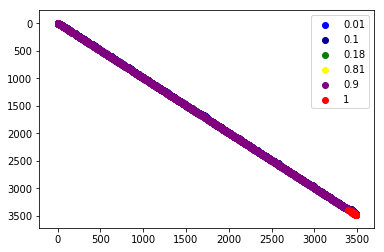

In [107]:
#Plot transition matrix
scatterDf = pd.DataFrame(scatterArr,columns=['i', 'j', 'prob','colors'])

lo = plt.scatter(scatterDf.loc[scatterDf['prob'] == 0.01].loc[:,'j'], scatterDf.loc[scatterDf['prob'] == 0.01].loc[:,'i'], c='blue')
ll = plt.scatter(scatterDf.loc[scatterDf['prob'] == 0.1].loc[:,'j'], scatterDf.loc[scatterDf['prob'] == 0.1].loc[:,'i'], c='darkblue')
l = plt.scatter(scatterDf.loc[scatterDf['prob'] == 0.18].loc[:,'j'], scatterDf.loc[scatterDf['prob'] == 0.18].loc[:,'i'], c='green')
a = plt.scatter(scatterDf.loc[scatterDf['prob'] == 0.81].loc[:,'j'], scatterDf.loc[scatterDf['prob'] == 0.81].loc[:,'i'], c='yellow')
h = plt.scatter(scatterDf.loc[scatterDf['prob'] == 0.9].loc[:,'j'], scatterDf.loc[scatterDf['prob'] == 0.9].loc[:,'i'], c='purple')
hh = plt.scatter(scatterDf.loc[scatterDf['prob'] == 1].loc[:,'j'], scatterDf.loc[scatterDf['prob'] == 1].loc[:,'i'], c='red')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.legend((lo, ll, l, a, h, hh),
           ('0.01', '0.1', '0.18', '0.81', '0.9', '1'),loc=1)
# ax1 = scatterDf.plot.scatter(x='j',y='i',c=scatterDf['colors'])
# ax1.invert_yaxis()

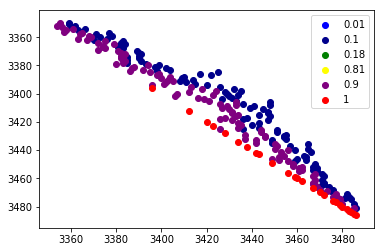

In [108]:
#Plot zoomed in Transition Matrix
scatterDf_trimmed = scatterDf.loc[scatterDf['i'] >= 3350]

lo = plt.scatter(scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.01].loc[:,'j'], scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.01].loc[:,'i'], c='blue')
ll = plt.scatter(scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.1].loc[:,'j'], scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.1].loc[:,'i'], c='darkblue')
l = plt.scatter(scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.18].loc[:,'j'], scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.18].loc[:,'i'], c='green')
a = plt.scatter(scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.81].loc[:,'j'], scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.81].loc[:,'i'], c='yellow')
h = plt.scatter(scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.9].loc[:,'j'], scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 0.9].loc[:,'i'], c='purple')
hh = plt.scatter(scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 1].loc[:,'j'], scatterDf_trimmed.loc[scatterDf_trimmed['prob'] == 1].loc[:,'i'], c='red')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.legend((lo, ll, l, a, h, hh),
           ('0.01', '0.1', '0.18', '0.81', '0.9', '1'),loc=1)